<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: EDA and simple regression model


The purpose of this project is to start cementing the data science workflow, specially going through a detailed EDA on a data set and finally implementing a multilinear regression on the cleaned data.

There are several steps that need to be follow, of which the main ones are:

- 1: Import libraries and Load data


- 2: Go through the EDA process, try to understand the dataset, its different dimensions, limitations, any potential issues and necessary transformation.


- 3: Implement a Linear regresssion on the data, training.

The assessment of the three points above will be done on a three point scale:

1 - Doesn't meet expectations.

2 - Meets expectations.

3 - Exceeds expectations.

More importantly, feedback will be provided.

**0: Import the required libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import metrics

**1: Load the dataset into a DataFrame**

The data needed to for this project comes already pre loaded with sklearn. Your first task will be to import the data and then load the data into a pandas Dataframe.

Docs for this can be found at: http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html

```` 
PRO TIP: An extremly important skill in DS and programming in general is how to efficiently look for information. There's a hierarchy of useful resources in the internet, starting with Stackoverflow, followed by different blogs or even comments on the Github repositories. 

Usually if you encounter and error or a new situation and you don't know how to proceed, it pays to search for your question and see if someone has already encountered (and solved) the same issue. It's no merit to reinvent the wheel, or to try to memorise small implementation details!!

So below you have a link to a typical stackoverflow post, that has an example on how to load the boston housing dataset from sklearn: 

https://stackoverflow.com/questions/38105539/how-to-convert-a-scikit-learn-dataset-to-a-pandas-dataset
````

In [2]:
# Import boston dataset
from sklearn.datasets import load_boston
data = load_boston()

# Import data into a pandas dataframe
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = pd.Series(data.target)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
print(df.shape)

(506, 14)


**2: Exploratory Data Analysis**

EDA is the most important step in your analysis, here's where you become familiar with your data and its quirks. Here's also were you transform your raw data into a format that can be used to train our predictive models.

It's useful to start with a plan of attack, listing the things you want to try out, and then extend the analysis as necessary.

So, your second task is twofold:

- First, make a list of 10 things you want to try out as part of your EDA, and why. For example: Plotting histograms of your features, so you can check their distributions and flag any feature with strong outliers.

- Second, implement your list of tasks with code and comment on the output. Does it make sense? Was it what you expected? How does this result inform your analysis?

- As part of the EDA:

    - make sure to check for missing values in your data. For this exercise, don't try to impute any missing values, just drop the rows, if needed. https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html
    - assign your feature matrix to a variable called X, and your target to a variable called y.
    - make sure to create dummies for any categorical features (if any).
    - end the EDA by creating a train/test split. http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html


<h3>EDA Plan: 10 questions</h3>
<ol>
    <li>Read data dictionary & other documentation to understand data set</li>
    <li>Read about the population we are exploring (Boston housing market)</li>
    <li>Understand data types, create dummy variables for any categorical features</li>
    <li>Check for missing values and drop the rows</li>
    <li>Run descriptive statistics e.g. mean/median/stdv for all features</li>
    <li>Check distribution of features, identify and try to understand root cause for any outliers</li>
    <li>Create correlation heatmap to explore strength of correlations between features and target</li>
    <li>Create scatterplots to better understand any strong correlations e.g. linear, log, exponential?</li>
    <li>Specify the question the model should explore</li>
    <li>Split data into training / test sets</li>
</ol>

In [4]:
# 1 - Read the data dictionary
print(data.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [5]:
# 2 - Read about the population

<table>
    <thead>
        <th>Source</th>
        <th>Notes</th>
    </thead>
    <tr>
        <td><a href="https://www.law.berkeley.edu/files/Hedonic.PDF">Hedonic prices and the demand for clean air</a></td>
        <td>
            <p>1970 owner occupied 1 bedroom family houses across Boston</p>
            <p>Not actual house prices ... census question: $5K to >$50K</p>
            <p>2 structural variables, 8 neighbourhood, 2 accesibility 1 polution</p>
            <p>Housing values often reflect expectations of the future (not only today)</p>
            <p>Demand may be non-linear. Best model fit for Log of house price vs. house price</p>
        </td>
    </tr>
    <tr>
        <td><a href="http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.34.6358&rep=rep1&type=pdf">Combining Instance-Based and Model-Based Learning</a></td>
        <td>
            <p>A regression model was better than default approach, but an instance based was better than regression</p>
            <p>Neural networks were the most acurate method for predicting house prices</p>
        </td>
    </tr>
    <tr>
        <td><a href="http://openjournals.wu.ac.at/region/paper_107/107.html">Revisiting the Boston data set</a></td>
        <td>
            <p>The modelled data set suffers from spatial autocorrelation</p>
            <p>Discrepancies between definitions of zones used in some of the sources</p>
        </td>
    </tr>
    
    
    
</table>

In [6]:
# 3 - Create dummy variables for any categorical variables

# Not needed - only CHAS is a categorical variable (near Charles River or not) and already a dummy 0/1

In [7]:
# 4 - Check for missing values
pd.isnull(df).sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

In [8]:
# 5 - Run descriptive statistics for all features
print(df.describe())
print("Median:")
df.median(axis=0)

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.593761   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.596783   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.647423   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

CRIM         0.25651
ZN           0.00000
INDUS        9.69000
CHAS         0.00000
NOX          0.53800
RM           6.20850
AGE         77.50000
DIS          3.20745
RAD          5.00000
TAX        330.00000
PTRATIO     19.05000
B          391.44000
LSTAT       11.36000
target      21.20000
dtype: float64

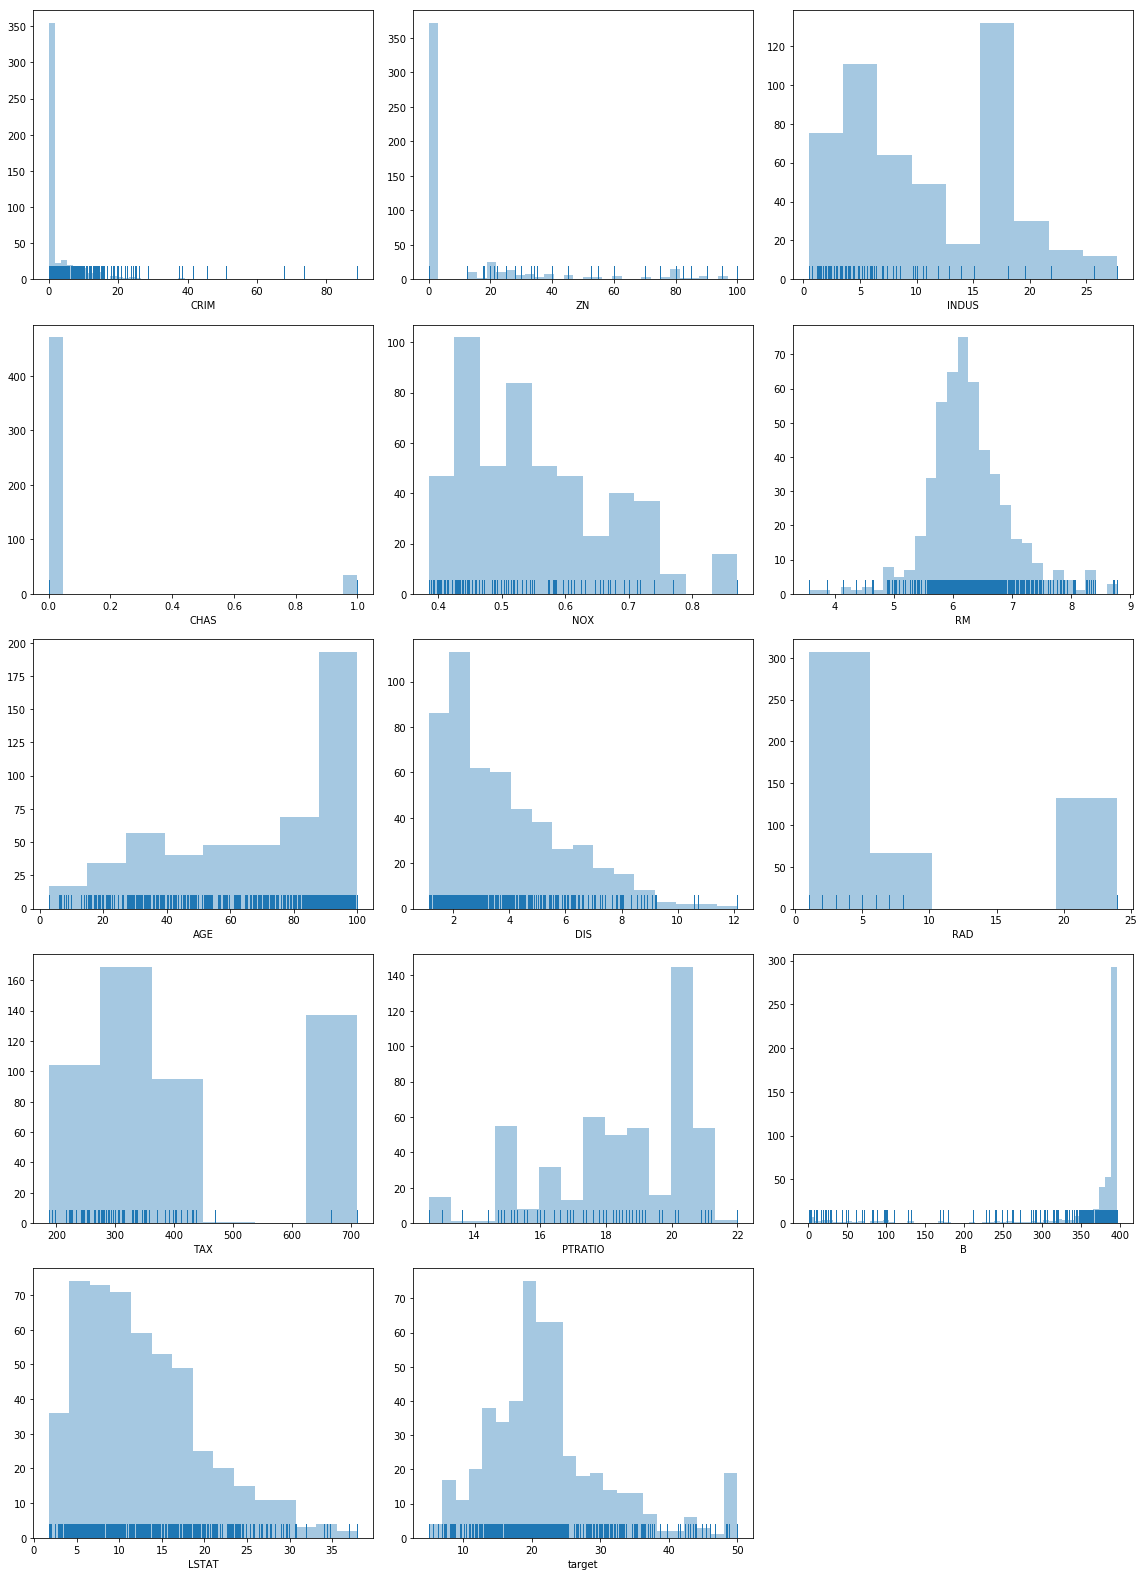

In [9]:
# 6 - Check distribution of features
plt.close()
plt.figure(figsize = (16,22))
for i, col in enumerate(df.columns):
    n=i+1
    plt.subplot(5,3,n)
    sns.distplot(df[col], kde=False, rug=True)
plt.tight_layout()
plt.show()

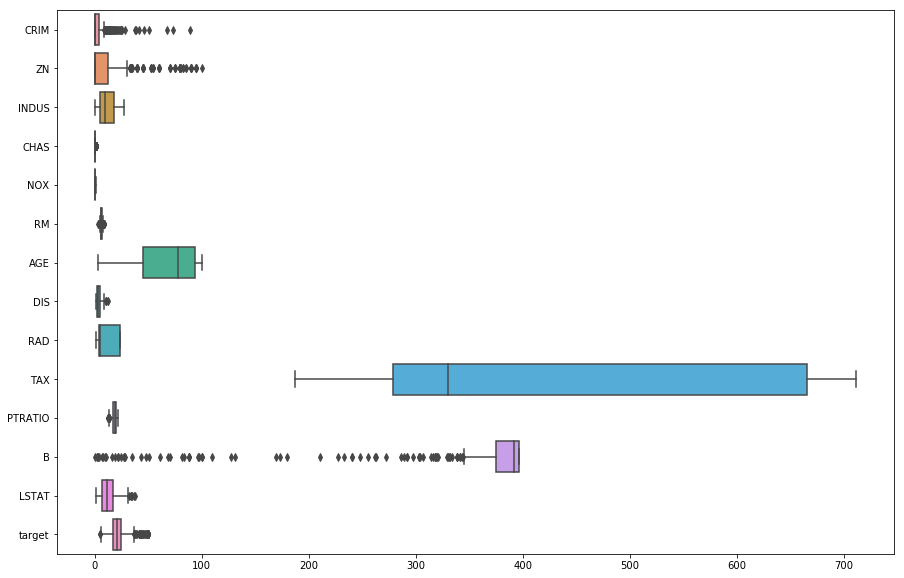

In [59]:
# Create boxplot for all variables
plt.figure(figsize=(15,10))
sns.boxplot(data=df, orient="h")

In [10]:
# 93% homes near the Charles River
df['CHAS'].value_counts(normalize=True)

0.0    0.93083
1.0    0.06917
Name: CHAS, dtype: float64

In [11]:
# 20 Pupil : 1 Teacher most common ratio
df['PTRATIO'].mode()

0    20.2
dtype: float64

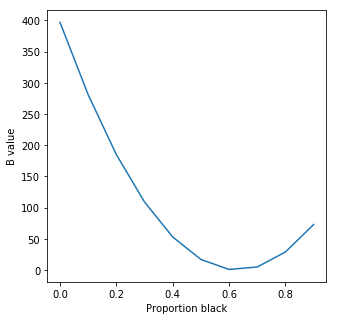

In [12]:
# plot of B values against a range of potential Bk values to better understand what B means
plt.close()
plt.figure(figsize = (5,5))
b_test = []
x_axis = []
for b in np.arange(0.0, 1.0, 0.1):
    B = 1000*(b - 0.63)**2
    b_test.append(B)
    x_axis.append(b)
plt.plot(x_axis, b_test)
plt.xlabel("Proportion black")
plt.ylabel("B value")
plt.show()

### Notes
- Crime rates - most properties are in towns with crime rates <1, but there are a few outliers with a lot of crime
- Residential zoned land - most properties are in towns with no zones for 25K+ plots
- Charles river - 93% properties not near the Charles River
- Nitrous Oxide - data capped at 1ppm?
- Rooms - normally distributed, 6.2 median/avg
- Age - ~70% of properties in neighbourhoods with more than 50% of homes constructed before 1940s
- Distance to commuting centers - median 3miles, 75% within 5 miles, longest 12 miles
- Distance to radial highways - bi-modal distribution, no properties 10-20 miles from highways
- Tax - properties either paying <5% tax or >6%
- Pupil/Teacher ration - negatively skewed; mode 20, median 19, average 18
- Black - most properties have B = 400, implying very low % black residents
- Lower status- max 37%, median 11%, mode ~5%


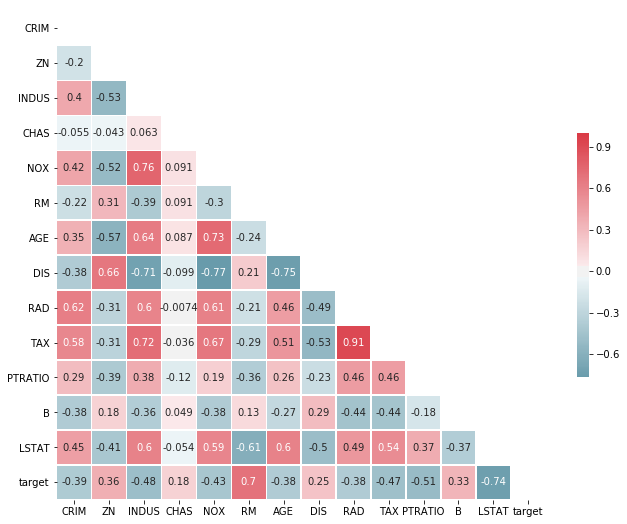

In [13]:
# 7 - Create a correlation heatmap to understand correlation between variables

corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, xticklabels=corr.columns.values,yticklabels=corr.columns.values,mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

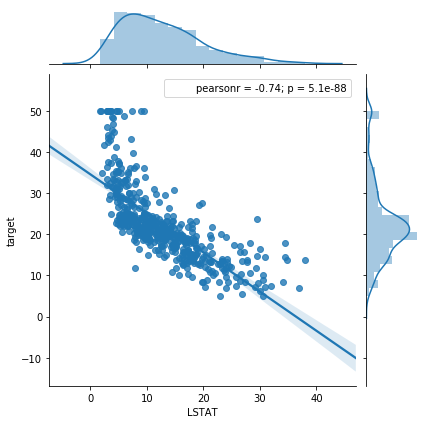

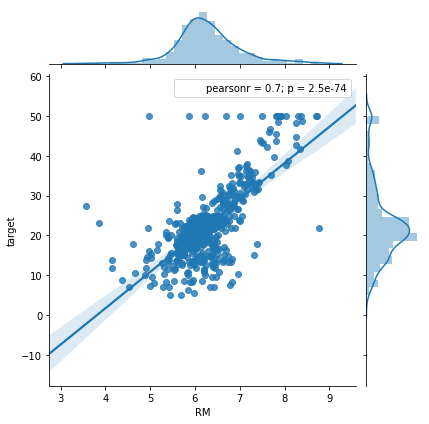

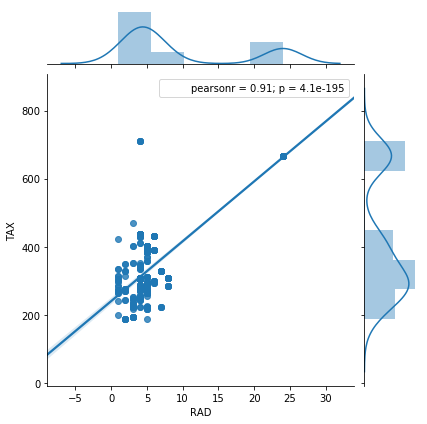

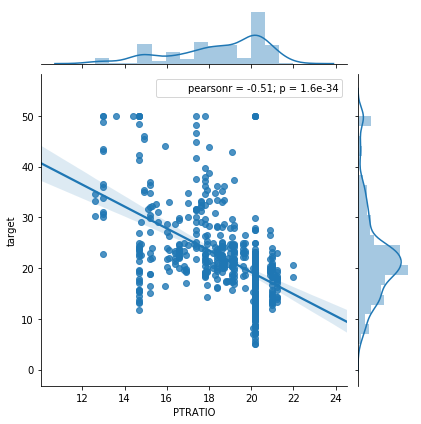

In [28]:
# 8 - Create scatterplots to better understand relationship between key variables

# Status vs. Value
sns.jointplot(df['LSTAT'], df['target'], kind="reg")

# Rooms vs. Value
sns.jointplot(df['RM'], df['target'],kind="reg")

# Dist to highways vs. tax
sns.jointplot(df['RAD'], df['TAX'], kind="reg")

# Pupil/Teachers to Value
sns.jointplot(df['PTRATIO'], df['target'], kind="reg")

plt.show()

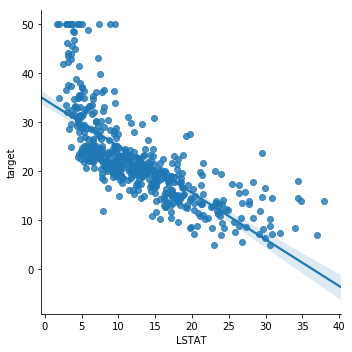

In [54]:
sns.lmplot('LSTAT','target', df)

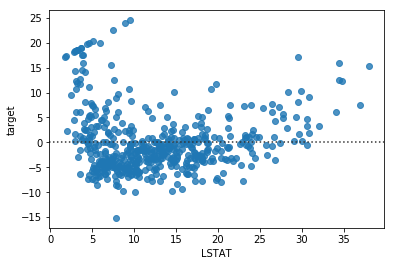

In [25]:
# Residual errors from linear regression of lower status vs. target
sns.residplot('LSTAT','target', df)

In [ ]:
# 9 - Specify the question the model should explore



In [3]:
# 10 - Split the data into test / training data sets
X = df.loc[:,'CRIM':'LSTAT']
y = df.loc[:,'target']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [5]:
print( X_train.shape, y_train.shape)
print( X_test.shape, y_test.shape)

(404, 13) (404,)
(102, 13) (102,)


**3: Modelling**

Since the target in this problem is an average price, this is a regression problem. So we will use a Linear Regression model to create an estimator. http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

What you need to do is: 

- Instantiate your model.


- Use your training data to fit a Linear Regression.


- Once you have the trained model, use it to predict on the test data.


- Calculate the RMSE on the test data to get a proper assessment of the models "out-of-sample" performance.


- **Bonus:** Create a function that encapsulates the modelling logic, so you can use it in a for loop, trying out different combinations of features.

In [186]:
# Function to encapsulate modelling + model evaluation logic
def LinearReg(features, data=X_train, target=y_train, graph=True):
    lr = LinearRegression()
    
    # Create test data set with features passed into function 
    if isinstance(features, list):
        X = data[features]
    elif isinstance(features, str):
        X = data[[features]]     
    else:
        print("Please pass a string or list to the function")
        return

    lr.fit(X, target)
    # Perform 5-fold cross validation
    scores = cross_val_score(lr, X, target, cv=5, scoring="neg_mean_squared_error")
    rmse = np.sqrt(np.mean(-1 * scores))
    print(f"For features: {features}\nMSE: {-1*scores}\nCV RMSE: {rmse}")

    # Make cross validated predictions on the test sets
    predictions = cross_val_predict(lr, X, target, cv=5)

    if graph == True:
        # Plot predictions vs. actuals
        plt.close()
        plt.figure()
        sns.regplot(target, predictions)
        plt.show()
    
    # Return model key + error
    results = {}
    results[str(features)] = rmse
    return results

For features: ['LSTAT']
MSE: [ 46.1018448   31.32685909  33.65507071  25.30537363  39.74208492]
CV RMSE: 5.935170311902433


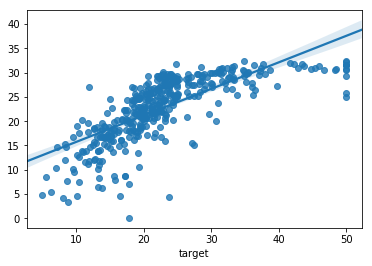

{"['LSTAT']": 5.935170311902433}

In [187]:
features = 'LSTAT'
x = LinearReg(features)
x

For features: CRIM
MSE: [ 113.99201234   71.92124279   68.14240234   47.26038311   61.19414759]
CV RMSE: 8.51481283600722


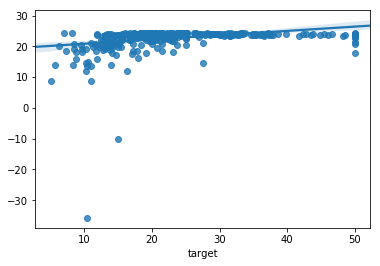

For features: ZN
MSE: [ 76.79613849  71.19588055  74.4722734   42.15343855  64.51077751]
CV RMSE: 8.113303994050895


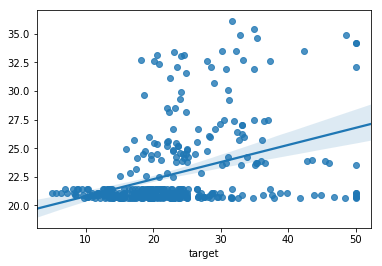

For features: INDUS
MSE: [ 75.5952878   60.50857228  64.96595522  32.70256076  48.07468087]
CV RMSE: 7.50795653867388


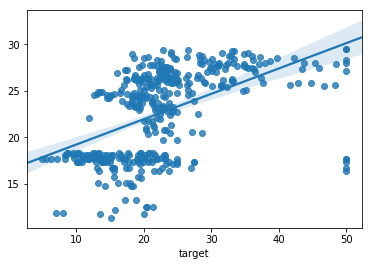

For features: CHAS
MSE: [ 96.97478356  78.54474855  77.41766261  49.57593508  78.85960183]
CV RMSE: 8.733530003854879


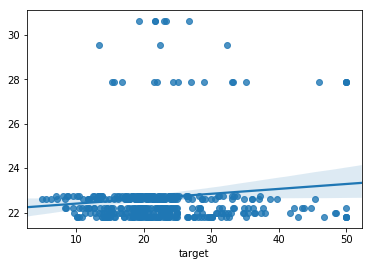

For features: NOX
MSE: [ 81.45263487  64.914575    67.11875491  42.9815605   54.76538448]
CV RMSE: 7.889650306152834


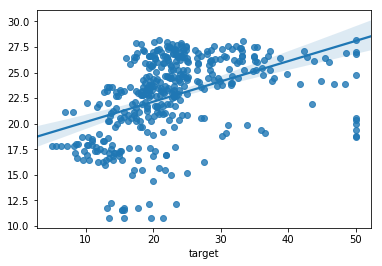

For features: RM
MSE: [ 52.98735206  32.42154921  54.11120986  24.03899807  34.19149588]
CV RMSE: 6.288888694770047


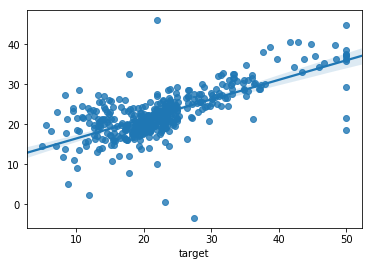

For features: AGE
MSE: [ 78.80666687  71.09289058  73.92481376  41.01812864  56.54961624]
CV RMSE: 8.017382566394456


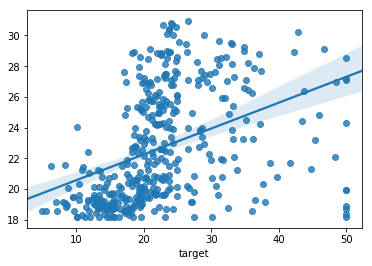

For features: DIS
MSE: [ 87.62566841  79.29245044  78.30143515  49.29771203  67.53186642]
CV RMSE: 8.509396364494965


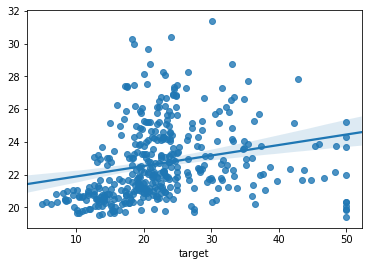

For features: RAD
MSE: [ 86.16705407  67.2173573   75.9840599   46.59499347  57.80518842]
CV RMSE: 8.170295626991257


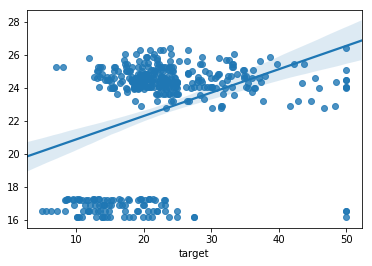

For features: TAX
MSE: [ 81.07453338  59.43903005  71.33258428  36.99169108  50.46881504]
CV RMSE: 7.737010454166774


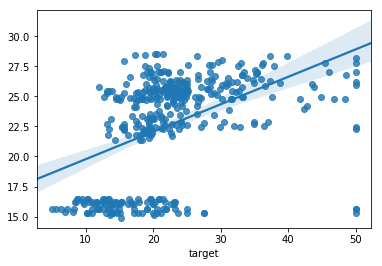

For features: PTRATIO
MSE: [ 69.9534165   62.93753158  68.77287332  33.74618483  52.47061022]
CV RMSE: 7.587893204879988


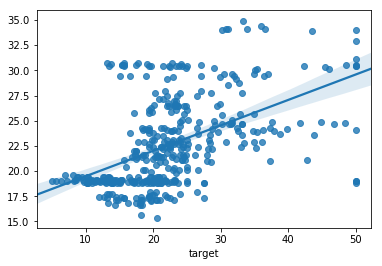

For features: B
MSE: [ 89.89642986  76.28605643  75.74090543  41.22590611  63.00961975]
CV RMSE: 8.32056389401805


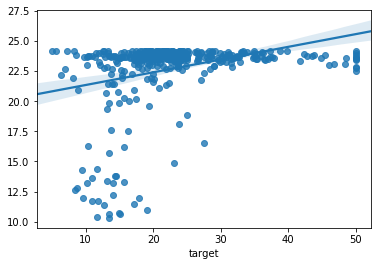

For features: LSTAT
MSE: [ 46.1018448   31.32685909  33.65507071  25.30537363  39.74208492]
CV RMSE: 5.935170311902433


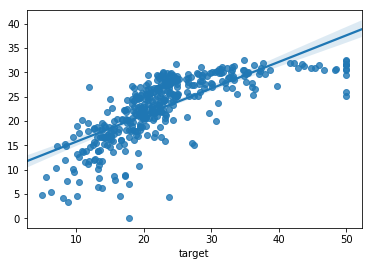

In [188]:
# Run the regression with all features, one at a time
results = {}
for col in df.columns[:13]:
    results.update(LinearReg(col))

In [108]:
# Check which was the 'best' model with lowest 5-fold CV RMSE
best = min(results, key=results.get)

print(best)
print(results[best])

LSTAT
5.9351703119


In [166]:
# get a list of all possible combinations of features
from itertools import combinations 

lst = X_test.columns
combs = []

for i in range(1, len(lst)+1):
    els = [list(x) for x in itertools.combinations(lst, i)]
    combs.extend(els)


In [167]:
# check how many possible combinations in the list
len(combs)

8191

In [174]:
# run the regression for all possible combinations and store the results in a dictionary combo_results
combo_results = {}
for com in combs:
    combo_results.update(LinearReg(com, graph=False))

For features: ['CRIM']
MSE: [ 113.99201234   71.92124279   68.14240234   47.26038311   61.19414759]
CV RMSE: 8.51481283600722
For features: ['ZN']
MSE: [ 76.79613849  71.19588055  74.4722734   42.15343855  64.51077751]
CV RMSE: 8.113303994050895
For features: ['INDUS']
MSE: [ 75.5952878   60.50857228  64.96595522  32.70256076  48.07468087]
CV RMSE: 7.50795653867388
For features: ['CHAS']
MSE: [ 96.97478356  78.54474855  77.41766261  49.57593508  78.85960183]
CV RMSE: 8.733530003854879
For features: ['NOX']
MSE: [ 81.45263487  64.914575    67.11875491  42.9815605   54.76538448]
CV RMSE: 7.889650306152834
For features: ['RM']
MSE: [ 52.98735206  32.42154921  54.11120986  24.03899807  34.19149588]
CV RMSE: 6.288888694770047
For features: ['AGE']
MSE: [ 78.80666687  71.09289058  73.92481376  41.01812864  56.54961624]
CV RMSE: 8.017382566394456
For features: ['DIS']
MSE: [ 87.62566841  79.29245044  78.30143515  49.29771203  67.53186642]
CV RMSE: 8.509396364494965
For features: ['RAD']
MSE: 

For features: ['DIS', 'RAD']
MSE: [ 85.02268873  68.3460817   75.41678861  45.10398319  57.2697377 ]
CV RMSE: 8.138295643840912
For features: ['DIS', 'TAX']
MSE: [ 81.03763724  60.15267506  71.29599777  37.04373485  50.47403209]
CV RMSE: 7.746019326282451
For features: ['DIS', 'PTRATIO']
MSE: [ 67.77861832  62.16691145  67.38956014  30.84599379  50.82539779]
CV RMSE: 7.4700265258784615
For features: ['DIS', 'B']
MSE: [ 86.60617557  74.80504595  73.3946612   39.60804659  60.50249506]
CV RMSE: 8.184331669316855
For features: ['DIS', 'LSTAT']
MSE: [ 43.76131529  29.05493972  31.44192498  25.58689345  43.33099878]
CV RMSE: 5.88516902424102
For features: ['RAD', 'TAX']
MSE: [ 79.12779597  58.63500569  69.11750921  35.32104432  52.09538425]
CV RMSE: 7.671984611957478
For features: ['RAD', 'PTRATIO']
MSE: [ 71.59279204  58.8276392   67.75605969  32.07077034  47.87516322]
CV RMSE: 7.458182412505764
For features: ['RAD', 'B']
MSE: [ 83.96809156  67.93695743  72.9327814   41.12511082  55.8324576

For features: ['CRIM', 'AGE', 'B']
MSE: [ 86.19454118  65.76031951  63.95429962  34.27679792  49.63800797]
CV RMSE: 7.743693772426751
For features: ['CRIM', 'AGE', 'LSTAT']
MSE: [ 44.63413464  30.98808273  33.09369946  27.20757706  41.10590772]
CV RMSE: 5.950284053694318
For features: ['CRIM', 'DIS', 'RAD']
MSE: [ 95.18685959  67.74560915  71.46155898  44.64691267  56.12201174]
CV RMSE: 8.18734330691954
For features: ['CRIM', 'DIS', 'TAX']
MSE: [ 83.78805632  60.11095327  69.47552975  37.64968098  49.85910064]
CV RMSE: 7.75736193505201
For features: ['CRIM', 'DIS', 'PTRATIO']
MSE: [ 80.09026694  59.25306383  62.14420553  29.83177051  46.99770931]
CV RMSE: 7.460791058710012
For features: ['CRIM', 'DIS', 'B']
MSE: [ 96.72705849  70.44269833  65.15727801  39.82438372  57.74436268]
CV RMSE: 8.122755459049122
For features: ['CRIM', 'DIS', 'LSTAT']
MSE: [ 42.71090599  29.30880464  31.50222055  24.79714394  42.29447727]
CV RMSE: 5.8414647544593645
For features: ['CRIM', 'RAD', 'TAX']
MSE: [ 8

For features: ['ZN', 'RAD', 'LSTAT']
MSE: [ 45.62902182  31.64863267  34.85064792  24.65811113  39.34402531]
CV RMSE: 5.935156928934924
For features: ['ZN', 'TAX', 'PTRATIO']
MSE: [ 66.29901773  50.40131245  63.58016258  24.65696242  41.84001657]
CV RMSE: 7.02534656450331
For features: ['ZN', 'TAX', 'B']
MSE: [ 72.47449523  56.41961743  65.52165121  28.30974267  46.94269579]
CV RMSE: 7.343952645975496
For features: ['ZN', 'TAX', 'LSTAT']
MSE: [ 46.51060474  31.58095349  35.66810327  22.71597229  37.595424  ]
CV RMSE: 5.900356900760968
For features: ['ZN', 'PTRATIO', 'B']
MSE: [ 64.56119194  56.60128601  61.34447475  23.62591983  44.56347538]
CV RMSE: 7.080908810537475
For features: ['ZN', 'PTRATIO', 'LSTAT']
MSE: [ 40.8752176   27.52742927  33.46509421  17.78008081  33.20899227]
CV RMSE: 5.529137621182267
For features: ['ZN', 'B', 'LSTAT']
MSE: [ 45.43422065  31.93021342  33.85111079  24.32769523  38.89228502]
CV RMSE: 5.906530709606545
For features: ['INDUS', 'CHAS', 'NOX']
MSE: [ 80.

For features: ['CHAS', 'RM', 'PTRATIO']
MSE: [ 45.5686955   27.67695511  45.19342768  18.24369103  27.21549058]
CV RMSE: 5.725351690570515
For features: ['CHAS', 'RM', 'B']
MSE: [ 53.11652677  28.87333559  47.56935599  15.83968779  30.39646176]
CV RMSE: 5.9295087133138695
For features: ['CHAS', 'RM', 'LSTAT']
MSE: [ 34.24537147  18.91239421  31.72619913  16.48795749  30.33694094]
CV RMSE: 5.132423662284832
For features: ['CHAS', 'AGE', 'DIS']
MSE: [ 82.81592818  64.22851351  67.46021474  35.76772984  58.69481368]
CV RMSE: 7.860880357259193
For features: ['CHAS', 'AGE', 'RAD']
MSE: [ 84.16742875  58.82799677  63.94371447  33.55832862  54.16958143]
CV RMSE: 7.676809884860994
For features: ['CHAS', 'AGE', 'TAX']
MSE: [ 82.03893863  53.90012146  61.27828833  28.98216514  50.73727404]
CV RMSE: 7.442268304767761
For features: ['CHAS', 'AGE', 'PTRATIO']
MSE: [ 66.98884474  54.16204134  61.54007836  23.88251461  46.11421859]
CV RMSE: 7.108975983162225
For features: ['CHAS', 'AGE', 'B']
MSE: [ 

For features: ['RM', 'DIS', 'B']
MSE: [ 52.39440791  31.12712857  49.14497394  16.95374015  28.16735887]
CV RMSE: 5.963012819794394
For features: ['RM', 'DIS', 'LSTAT']
MSE: [ 33.01420117  18.75436569  32.57314126  18.19663342  34.30072067]
CV RMSE: 5.231425469396127
For features: ['RM', 'RAD', 'TAX']
MSE: [ 46.78260925  28.60084457  47.85773401  16.78939166  24.37756523]
CV RMSE: 5.73425051269501
For features: ['RM', 'RAD', 'PTRATIO']
MSE: [ 44.53285588  27.25566006  45.95853071  16.81027344  23.03479744]
CV RMSE: 5.614127136523784
For features: ['RM', 'RAD', 'B']
MSE: [ 48.66280687  29.27062162  48.26958086  16.85700708  25.18979801]
CV RMSE: 5.800858805959231
For features: ['RM', 'RAD', 'LSTAT']
MSE: [ 34.50027809  20.40899382  34.81091749  16.52505049  29.73191702]
CV RMSE: 5.214923909457828
For features: ['RM', 'TAX', 'PTRATIO']
MSE: [ 43.18695512  26.47038713  44.77022642  14.78358755  21.15255472]
CV RMSE: 5.483861977550427
For features: ['RM', 'TAX', 'B']
MSE: [ 47.22171875  28

For features: ['CRIM', 'ZN', 'CHAS', 'TAX']
MSE: [ 79.28209966  51.22708567  59.32830676  28.23605982  51.57119965]
CV RMSE: 7.3436333182601095
For features: ['CRIM', 'ZN', 'CHAS', 'PTRATIO']
MSE: [ 79.79174697  52.81370345  56.93625747  26.16457488  48.60639325]
CV RMSE: 7.270662638524926
For features: ['CRIM', 'ZN', 'CHAS', 'B']
MSE: [ 87.30784664  58.59180778  55.63367978  29.55503785  57.68467696]
CV RMSE: 7.599645373454517
For features: ['CRIM', 'ZN', 'CHAS', 'LSTAT']
MSE: [ 45.47225307  30.32595261  31.15411331  21.67002207  38.43921766]
CV RMSE: 5.780338376103132
For features: ['CRIM', 'ZN', 'NOX', 'RM']
MSE: [ 44.9273259   30.18548884  45.33024966  18.61437102  25.70487709]
CV RMSE: 5.740423547354714
For features: ['CRIM', 'ZN', 'NOX', 'AGE']
MSE: [ 82.64027005  61.19953748  61.77199766  36.78493985  50.60748956]
CV RMSE: 7.6551190011074475
For features: ['CRIM', 'ZN', 'NOX', 'DIS']
MSE: [ 78.30583562  52.31847605  55.3041029   35.32598156  44.35093124]
CV RMSE: 7.2884199572177

For features: ['CRIM', 'INDUS', 'RM', 'RAD']
MSE: [ 44.28771454  30.39668815  46.63182787  17.39274472  24.58046792]
CV RMSE: 5.714708097645613
For features: ['CRIM', 'INDUS', 'RM', 'TAX']
MSE: [ 44.37268644  29.76346973  46.06518919  16.61040547  23.66894768]
CV RMSE: 5.665345506132762
For features: ['CRIM', 'INDUS', 'RM', 'PTRATIO']
MSE: [ 40.431266    27.68879396  42.80116299  14.90717498  21.19618794]
CV RMSE: 5.422630097391431
For features: ['CRIM', 'INDUS', 'RM', 'B']
MSE: [ 44.89696704  30.42198851  44.71990381  15.65226742  24.52774353]
CV RMSE: 5.660722044232239
For features: ['CRIM', 'INDUS', 'RM', 'LSTAT']
MSE: [ 33.7851398   21.48177658  34.53295307  16.79746218  29.77023242]
CV RMSE: 5.222404887594167
For features: ['CRIM', 'INDUS', 'AGE', 'DIS']
MSE: [ 78.66415257  50.80471773  55.93372904  28.29340552  40.00706459]
CV RMSE: 7.123244617927451
For features: ['CRIM', 'INDUS', 'AGE', 'RAD']
MSE: [ 82.27771984  58.76044369  61.65820953  31.10939838  44.96680956]
CV RMSE: 7.46

For features: ['CRIM', 'CHAS', 'PTRATIO', 'LSTAT']
MSE: [ 41.39772683  27.42108827  31.16528548  16.49703044  33.42507292]
CV RMSE: 5.475512833390114
For features: ['CRIM', 'CHAS', 'B', 'LSTAT']
MSE: [ 46.34796638  30.7299742   30.97263531  22.57794297  38.86029062]
CV RMSE: 5.822178449360928
For features: ['CRIM', 'NOX', 'RM', 'AGE']
MSE: [ 45.0324559   30.12900634  45.96673975  17.63698232  24.72369173]
CV RMSE: 5.718196849499888
For features: ['CRIM', 'NOX', 'RM', 'DIS']
MSE: [ 44.45899641  29.38244787  44.97754934  19.14099314  25.03771427]
CV RMSE: 5.709600704671682
For features: ['CRIM', 'NOX', 'RM', 'RAD']
MSE: [ 45.37627971  30.13501434  46.64968009  18.72804823  24.63541412]
CV RMSE: 5.753684671233947
For features: ['CRIM', 'NOX', 'RM', 'TAX']
MSE: [ 45.24555327  29.34751626  46.1965595   17.18591533  23.27597666]
CV RMSE: 5.678935129591164
For features: ['CRIM', 'NOX', 'RM', 'PTRATIO']
MSE: [ 40.31787089  27.01968647  41.21978289  14.76922967  20.4014681 ]
CV RMSE: 5.36149303

For features: ['CRIM', 'AGE', 'PTRATIO', 'B']
MSE: [ 66.61342714  55.59352545  59.35737965  22.38448454  39.73209909]
CV RMSE: 6.981130508264424
For features: ['CRIM', 'AGE', 'PTRATIO', 'LSTAT']
MSE: [ 39.76436904  26.87135472  32.25799615  20.16670658  35.1296692 ]
CV RMSE: 5.5531990003572345
For features: ['CRIM', 'AGE', 'B', 'LSTAT']
MSE: [ 44.73695914  31.26120385  32.86617249  27.36712345  40.88984667]
CV RMSE: 5.951828384762407
For features: ['CRIM', 'DIS', 'RAD', 'TAX']
MSE: [ 88.01238887  58.93600475  65.44797835  34.91724162  51.08337382]
CV RMSE: 7.725244169625605
For features: ['CRIM', 'DIS', 'RAD', 'PTRATIO']
MSE: [ 80.29249107  59.23023015  63.33447147  30.07366292  46.93372178]
CV RMSE: 7.481504893989906
For features: ['CRIM', 'DIS', 'RAD', 'B']
MSE: [ 90.73058027  68.0294154   69.10471237  40.54988894  55.54203641]
CV RMSE: 8.049305975013873
For features: ['CRIM', 'DIS', 'RAD', 'LSTAT']
MSE: [ 42.82799332  29.23577737  32.00196808  24.71006827  42.18856916]
CV RMSE: 5.84

For features: ['ZN', 'INDUS', 'PTRATIO', 'B']
MSE: [ 62.66988085  50.7927585   57.63776392  20.36734468  37.57713727]
CV RMSE: 6.768232933590426
For features: ['ZN', 'INDUS', 'PTRATIO', 'LSTAT']
MSE: [ 42.24754185  27.70645108  34.10924179  17.61027037  34.02276233]
CV RMSE: 5.580255682794236
For features: ['ZN', 'INDUS', 'B', 'LSTAT']
MSE: [ 47.14809148  32.09522757  34.62181636  23.93284407  39.07689937]
CV RMSE: 5.9476865896231095
For features: ['ZN', 'CHAS', 'NOX', 'RM']
MSE: [ 50.70630788  27.43711953  43.55632105  17.40660129  28.35728625]
CV RMSE: 5.78729014309286
For features: ['ZN', 'CHAS', 'NOX', 'AGE']
MSE: [ 80.33054155  56.44883671  58.02429805  33.80326595  57.21852886]
CV RMSE: 7.560760161949108
For features: ['ZN', 'CHAS', 'NOX', 'DIS']
MSE: [ 77.55493749  49.89587739  53.92323785  33.28827601  52.3831411 ]
CV RMSE: 7.308152568763014
For features: ['ZN', 'CHAS', 'NOX', 'RAD']
MSE: [ 79.6435565   53.66602287  58.45521871  33.86848524  55.67146137]
CV RMSE: 7.500729893682

For features: ['ZN', 'NOX', 'RAD', 'LSTAT']
MSE: [ 45.68594743  31.49135961  34.77377056  24.5584129   42.1735011 ]
CV RMSE: 5.978009561798114
For features: ['ZN', 'NOX', 'TAX', 'PTRATIO']
MSE: [ 62.7894192   49.07831135  59.47717429  25.16543854  40.03641553]
CV RMSE: 6.878179394544419
For features: ['ZN', 'NOX', 'TAX', 'B']
MSE: [ 72.18533263  56.05273126  64.87258943  29.56104154  46.58232869]
CV RMSE: 7.338310753069898
For features: ['ZN', 'NOX', 'TAX', 'LSTAT']
MSE: [ 45.57991974  30.85217798  35.44220157  22.05182805  40.45093022]
CV RMSE: 5.905540746907785
For features: ['ZN', 'NOX', 'PTRATIO', 'B']
MSE: [ 60.79031327  50.26177392  57.20794858  23.612216    39.52004082]
CV RMSE: 6.802827244400915
For features: ['ZN', 'NOX', 'PTRATIO', 'LSTAT']
MSE: [ 41.51456444  27.8712904   33.87720874  17.67196802  34.36701123]
CV RMSE: 5.573186571979437
For features: ['ZN', 'NOX', 'B', 'LSTAT']
MSE: [ 45.59190375  31.8000364   33.72436409  24.54138819  41.85633296]
CV RMSE: 5.958423036062491

CV RMSE: 5.905209324284795
For features: ['ZN', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 40.85100925  28.31308198  33.18849555  17.73670895  32.86393643]
CV RMSE: 5.530881162350658
For features: ['INDUS', 'CHAS', 'NOX', 'RM']
MSE: [ 49.59831289  27.36458583  43.63053776  15.64109809  27.37694716]
CV RMSE: 5.720340579363823
For features: ['INDUS', 'CHAS', 'NOX', 'AGE']
MSE: [ 79.74618572  51.95849645  55.84143055  27.4516952   51.46876852]
CV RMSE: 7.300227071083386
For features: ['INDUS', 'CHAS', 'NOX', 'DIS']
MSE: [ 78.30398948  46.56370858  51.38936332  27.65421217  50.77111429]
CV RMSE: 7.13697958307275
For features: ['INDUS', 'CHAS', 'NOX', 'RAD']
MSE: [ 80.38325425  51.52522694  55.7965835   28.23383918  52.04647822]
CV RMSE: 7.32100241883684
For features: ['INDUS', 'CHAS', 'NOX', 'TAX']
MSE: [ 79.89224551  50.71028207  55.19428738  27.26301016  51.47423967]
CV RMSE: 7.273706961309552
For features: ['INDUS', 'CHAS', 'NOX', 'PTRATIO']
MSE: [ 66.4456232   44.850611    52.48368799  21.3965554

For features: ['INDUS', 'NOX', 'B', 'LSTAT']
MSE: [ 47.2876344   31.80144686  34.34454964  24.13365434  39.82617776]
CV RMSE: 5.95639929829526
For features: ['INDUS', 'RM', 'AGE', 'DIS']
MSE: [ 44.7335987   27.09969188  46.49941225  14.55818377  25.78120108]
CV RMSE: 5.63333094514003
For features: ['INDUS', 'RM', 'AGE', 'RAD']
MSE: [ 46.67407614  28.92988652  47.11968281  15.71131946  24.07364323]
CV RMSE: 5.701028120646209
For features: ['INDUS', 'RM', 'AGE', 'TAX']
MSE: [ 46.29175271  28.39315811  46.27435791  14.78300599  22.99011817]
CV RMSE: 5.6344013505132775
For features: ['INDUS', 'RM', 'AGE', 'PTRATIO']
MSE: [ 42.48224717  26.58159969  43.90243173  13.65198593  21.57706099]
CV RMSE: 5.444177173810101
For features: ['INDUS', 'RM', 'AGE', 'B']
MSE: [ 48.26553725  29.36881623  45.80877666  13.33455091  24.15156919]
CV RMSE: 5.673257445994346
For features: ['INDUS', 'RM', 'AGE', 'LSTAT']
MSE: [ 35.22782761  20.56388879  34.14439749  18.27302963  31.2445684 ]
CV RMSE: 5.28116865695

For features: ['CHAS', 'NOX', 'RM', 'PTRATIO']
MSE: [ 43.82351025  24.93000786  39.39558501  13.88528091  22.45425721]
CV RMSE: 5.375660726583692
For features: ['CHAS', 'NOX', 'RM', 'B']
MSE: [ 50.85736432  26.77738397  43.36253649  14.69520444  26.88405087]
CV RMSE: 5.702219569387486
For features: ['CHAS', 'NOX', 'RM', 'LSTAT']
MSE: [ 36.5142848   19.44450502  31.78159822  15.96061888  30.38579927]
CV RMSE: 5.178548178679894
For features: ['CHAS', 'NOX', 'AGE', 'DIS']
MSE: [ 82.27507105  52.92267248  57.74425458  35.18049903  53.91513189]
CV RMSE: 7.510494378235187
For features: ['CHAS', 'NOX', 'AGE', 'RAD']
MSE: [ 83.18903234  55.87609277  60.35305035  34.51820227  55.30210158]
CV RMSE: 7.605767276256185
For features: ['CHAS', 'NOX', 'AGE', 'TAX']
MSE: [ 81.49029457  52.82397327  59.94185848  30.37816357  52.1173832 ]
CV RMSE: 7.439780548992504
For features: ['CHAS', 'NOX', 'AGE', 'PTRATIO']
MSE: [ 65.59894999  47.23542033  54.35133517  24.18002793  45.02982557]
CV RMSE: 6.8759807879

For features: ['CHAS', 'DIS', 'TAX', 'LSTAT']
MSE: [ 45.0299672   27.40578077  30.31531427  20.28202185  39.29350423]
CV RMSE: 5.697834471429992
For features: ['CHAS', 'DIS', 'PTRATIO', 'B']
MSE: [ 69.62026218  58.64985878  59.179058    22.67227164  50.33170696]
CV RMSE: 7.217383979833769
For features: ['CHAS', 'DIS', 'PTRATIO', 'LSTAT']
MSE: [ 39.22539138  24.96053253  29.13519388  17.23617747  35.37791361]
CV RMSE: 5.4025032877799655
For features: ['CHAS', 'DIS', 'B', 'LSTAT']
MSE: [ 44.63828102  28.73473341  28.96225673  23.50215888  41.5984638 ]
CV RMSE: 5.7868107596056
For features: ['CHAS', 'RAD', 'TAX', 'PTRATIO']
MSE: [ 68.50404137  49.48083185  60.0683688   23.57359664  49.04728594]
CV RMSE: 7.080594955361595
For features: ['CHAS', 'RAD', 'TAX', 'B']
MSE: [ 81.84633042  55.59200191  62.01740517  28.77142989  57.10956762]
CV RMSE: 7.554293282772808
For features: ['CHAS', 'RAD', 'TAX', 'LSTAT']
MSE: [ 47.21827537  28.98899157  30.6676607   21.66807917  36.64025228]
CV RMSE: 5.74

For features: ['NOX', 'RAD', 'TAX', 'PTRATIO']
MSE: [ 59.09873539  47.64664662  55.77044731  22.46772256  41.0616587 ]
CV RMSE: 6.723766958708943
For features: ['NOX', 'RAD', 'TAX', 'B']
MSE: [ 75.64185841  57.37169169  63.85947503  31.65811287  48.26078606]
CV RMSE: 7.440321552953288
For features: ['NOX', 'RAD', 'TAX', 'LSTAT']
MSE: [ 46.15051318  30.43133798  33.57155598  23.56999511  38.21673267]
CV RMSE: 5.8641305393593575
For features: ['NOX', 'RAD', 'PTRATIO', 'B']
MSE: [ 59.74464108  50.55937491  55.99947688  23.18741888  39.94281506]
CV RMSE: 6.77397559500205
For features: ['NOX', 'RAD', 'PTRATIO', 'LSTAT']
MSE: [ 40.63055646  27.22752555  32.87068815  19.14078353  33.53990197]
CV RMSE: 5.539123678962414
For features: ['NOX', 'RAD', 'B', 'LSTAT']
MSE: [ 46.68555023  31.93514509  34.38238781  25.77437234  41.24988613]
CV RMSE: 6.000455675976342
For features: ['NOX', 'TAX', 'PTRATIO', 'B']
MSE: [ 61.62966198  50.32455999  57.94112082  23.77347243  39.17347233]
CV RMSE: 6.82410855

For features: ['AGE', 'RAD', 'PTRATIO', 'B']
MSE: [ 63.31883229  56.73712506  61.43656132  21.85853246  40.16248068]
CV RMSE: 6.978732432321734
For features: ['AGE', 'RAD', 'PTRATIO', 'LSTAT']
MSE: [ 39.55426902  26.18118366  31.84662213  21.3895392   35.64975709]
CV RMSE: 5.560959828944643
For features: ['AGE', 'RAD', 'B', 'LSTAT']
MSE: [ 45.54594478  31.00414949  33.49812292  27.7881431   41.19425211]
CV RMSE: 5.983821728686969
For features: ['AGE', 'TAX', 'PTRATIO', 'B']
MSE: [ 64.16420964  53.74093926  61.16172948  21.1259753   38.16528585]
CV RMSE: 6.904464346111417
For features: ['AGE', 'TAX', 'PTRATIO', 'LSTAT']
MSE: [ 40.59210335  26.54026482  32.85799846  19.96256091  35.0568551 ]
CV RMSE: 5.56794006129459
For features: ['AGE', 'TAX', 'B', 'LSTAT']
MSE: [ 45.87436311  30.44168209  34.22710381  25.53948114  39.40266291]
CV RMSE: 5.924277053889132
For features: ['AGE', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 39.87470814  27.20200548  31.88208393  20.37493836  34.90524233]
CV RMSE: 5.554

For features: ['CRIM', 'ZN', 'INDUS', 'PTRATIO', 'B']
MSE: [ 64.18417074  50.5389563   56.30292463  20.91902266  37.59219954]
CV RMSE: 6.775504023674536
For features: ['CRIM', 'ZN', 'INDUS', 'PTRATIO', 'LSTAT']
MSE: [ 42.46389645  28.0828375   34.10715609  17.57513645  33.96996703]
CV RMSE: 5.589257437450268
For features: ['CRIM', 'ZN', 'INDUS', 'B', 'LSTAT']
MSE: [ 46.73946621  32.4240713   34.68807765  23.72224398  38.83374925]
CV RMSE: 5.939825054478332
For features: ['CRIM', 'ZN', 'CHAS', 'NOX', 'RM']
MSE: [ 46.24863085  27.44807805  42.15740117  17.33475132  26.78241081]
CV RMSE: 5.656346386126719
For features: ['CRIM', 'ZN', 'CHAS', 'NOX', 'AGE']
MSE: [ 84.67655436  54.90651666  54.40172359  32.84162604  54.78482695]
CV RMSE: 7.504815088958192
For features: ['CRIM', 'ZN', 'CHAS', 'NOX', 'DIS']
MSE: [ 80.35137933  46.9360959   49.14475585  32.50656569  48.5131712 ]
CV RMSE: 7.175680705715054
For features: ['CRIM', 'ZN', 'CHAS', 'NOX', 'RAD']
MSE: [ 84.34412162  53.64123925  55.370

For features: ['CRIM', 'ZN', 'NOX', 'TAX', 'B']
MSE: [ 72.89651405  56.20820671  63.78087987  30.66413264  46.66061208]
CV RMSE: 7.3513311085864865
For features: ['CRIM', 'ZN', 'NOX', 'TAX', 'LSTAT']
MSE: [ 46.2891552   31.12343082  35.41375098  22.18225134  40.39552667]
CV RMSE: 5.922906634504848
For features: ['CRIM', 'ZN', 'NOX', 'PTRATIO', 'B']
MSE: [ 61.91989568  50.12627514  56.03961514  24.1460048   39.46603922]
CV RMSE: 6.807317092372052
For features: ['CRIM', 'ZN', 'NOX', 'PTRATIO', 'LSTAT']
MSE: [ 41.80778585  28.16049827  33.89098789  17.63165054  34.32125587]
CV RMSE: 5.582332459096039
For features: ['CRIM', 'ZN', 'NOX', 'B', 'LSTAT']
MSE: [ 44.84139918  32.13662046  33.84775508  24.10817811  41.45697867]
CV RMSE: 5.9395442838020704
For features: ['CRIM', 'ZN', 'RM', 'AGE', 'DIS']
MSE: [ 42.76474287  28.00160767  45.95191092  16.24953163  25.0867871 ]
CV RMSE: 5.622358582948212
For features: ['CRIM', 'ZN', 'RM', 'AGE', 'RAD']
MSE: [ 44.36625421  29.20502237  46.54052371  17

CV RMSE: 7.33243423309257
For features: ['CRIM', 'INDUS', 'CHAS', 'NOX', 'TAX']
MSE: [ 81.62074168  51.06338439  53.55533644  27.57170654  50.7642576 ]
CV RMSE: 7.274275588061364
For features: ['CRIM', 'INDUS', 'CHAS', 'NOX', 'PTRATIO']
MSE: [ 67.85190566  45.08394194  51.43816502  21.44071899  42.09340137]
CV RMSE: 6.751416636202964
For features: ['CRIM', 'INDUS', 'CHAS', 'NOX', 'B']
MSE: [ 81.00102512  52.1992985   52.21191626  26.49520736  50.92001934]
CV RMSE: 7.250206432617593
For features: ['CRIM', 'INDUS', 'CHAS', 'NOX', 'LSTAT']
MSE: [ 48.64352542  30.02609667  31.50239009  21.13551671  38.28150521]
CV RMSE: 5.82389962332738
For features: ['CRIM', 'INDUS', 'CHAS', 'RM', 'AGE']
MSE: [ 45.8661463   27.230564    42.50667779  14.75135781  25.29054523]
CV RMSE: 5.579342096166062
For features: ['CRIM', 'INDUS', 'CHAS', 'RM', 'DIS']
MSE: [ 45.21408811  27.39381027  42.88491236  15.55744815  26.4862669 ]
CV RMSE: 5.613136837553402
For features: ['CRIM', 'INDUS', 'CHAS', 'RM', 'RAD']
MS

For features: ['CRIM', 'INDUS', 'RM', 'AGE', 'RAD']
MSE: [ 44.39466405  29.66298522  46.07984029  16.31016368  23.83944497]
CV RMSE: 5.661927202009968
For features: ['CRIM', 'INDUS', 'RM', 'AGE', 'TAX']
MSE: [ 44.74143902  28.99787083  45.62932412  15.50174467  22.77262162]
CV RMSE: 5.615033397169711
For features: ['CRIM', 'INDUS', 'RM', 'AGE', 'PTRATIO']
MSE: [ 40.24221359  27.09328416  42.61513888  13.83314948  20.57782928]
CV RMSE: 5.373297225653114
For features: ['CRIM', 'INDUS', 'RM', 'AGE', 'B']
MSE: [ 45.12683784  29.67461657  44.19543189  14.589055    23.61431161]
CV RMSE: 5.607142817973079
For features: ['CRIM', 'INDUS', 'RM', 'AGE', 'LSTAT']
MSE: [ 33.66730582  21.3227251   34.40325277  17.95797122  30.39822297]
CV RMSE: 5.24879944125223
For features: ['CRIM', 'INDUS', 'RM', 'DIS', 'RAD']
MSE: [ 42.98737245  29.40176085  46.00455743  17.04098801  24.59782413]
CV RMSE: 5.657428795379048
For features: ['CRIM', 'INDUS', 'RM', 'DIS', 'TAX']
MSE: [ 42.93802884  28.91989836  45.429

For features: ['CRIM', 'CHAS', 'NOX', 'RM', 'B']
MSE: [ 47.34161176  27.32729828  41.72268525  15.7693323   26.45729766]
CV RMSE: 5.632374725628595
For features: ['CRIM', 'CHAS', 'NOX', 'RM', 'LSTAT']
MSE: [ 35.11138773  20.09057334  32.27641132  15.60024009  29.64318016]
CV RMSE: 5.152121750051129
For features: ['CRIM', 'CHAS', 'NOX', 'AGE', 'DIS']
MSE: [ 85.94147388  50.83396595  53.7451693   34.75048234  51.15143927]
CV RMSE: 7.435355146136023
For features: ['CRIM', 'CHAS', 'NOX', 'AGE', 'RAD']
MSE: [ 87.72684289  55.93478803  57.73292865  34.36578503  54.89509933]
CV RMSE: 7.624374648864843
For features: ['CRIM', 'CHAS', 'NOX', 'AGE', 'TAX']
MSE: [ 82.39841872  53.1676886   58.83468796  30.97987106  51.87980957]
CV RMSE: 7.446616357936563
For features: ['CRIM', 'CHAS', 'NOX', 'AGE', 'PTRATIO']
MSE: [ 67.41966797  47.22957702  53.08443069  24.23671219  44.46348454]
CV RMSE: 6.876537972123992
For features: ['CRIM', 'CHAS', 'NOX', 'AGE', 'B']
MSE: [ 84.88527121  56.58154235  55.288833

For features: ['CRIM', 'CHAS', 'DIS', 'TAX', 'B']
MSE: [ 85.13594212  57.19179346  62.9694832   31.46083099  55.78752554]
CV RMSE: 7.64912511746907
For features: ['CRIM', 'CHAS', 'DIS', 'TAX', 'LSTAT']
MSE: [ 45.63713755  27.62665406  30.30910756  20.43464497  39.29383341]
CV RMSE: 5.714916929484769
For features: ['CRIM', 'CHAS', 'DIS', 'PTRATIO', 'B']
MSE: [ 74.87645293  57.17700342  56.06932221  23.60206957  49.36918993]
CV RMSE: 7.226258202577222
For features: ['CRIM', 'CHAS', 'DIS', 'PTRATIO', 'LSTAT']
MSE: [ 38.76572311  25.28981798  29.15289123  17.02190976  35.07500719]
CV RMSE: 5.3908320187590055
For features: ['CRIM', 'CHAS', 'DIS', 'B', 'LSTAT']
MSE: [ 43.75405473  28.89682844  29.18611257  22.9460323   41.1246324 ]
CV RMSE: 5.7603413168176685
For features: ['CRIM', 'CHAS', 'RAD', 'TAX', 'PTRATIO']
MSE: [ 75.45774778  49.54904904  56.56505322  22.78251025  48.10627242]
CV RMSE: 7.1057812056438525
For features: ['CRIM', 'CHAS', 'RAD', 'TAX', 'B']
MSE: [ 86.77542233  55.5028341

For features: ['CRIM', 'NOX', 'RAD', 'TAX', 'PTRATIO']
MSE: [ 65.63899189  47.47103471  52.46954597  21.94033403  40.39868305]
CV RMSE: 6.751571515685544
For features: ['CRIM', 'NOX', 'RAD', 'TAX', 'B']
MSE: [ 81.25909162  57.10801669  60.78291647  31.83139668  48.24980599]
CV RMSE: 7.4730345569820456
For features: ['CRIM', 'NOX', 'RAD', 'TAX', 'LSTAT']
MSE: [ 45.50336611  30.79029917  33.25868094  23.68071626  37.7748981 ]
CV RMSE: 5.848212728300055
For features: ['CRIM', 'NOX', 'RAD', 'PTRATIO', 'B']
MSE: [ 64.72415591  50.30154343  52.8681236   23.26185042  40.26623908]
CV RMSE: 6.803262635479474
For features: ['CRIM', 'NOX', 'RAD', 'PTRATIO', 'LSTAT']
MSE: [ 39.79220608  27.66374625  32.3649896   19.1866929   32.98073218]
CV RMSE: 5.513408510332261
For features: ['CRIM', 'NOX', 'RAD', 'B', 'LSTAT']
MSE: [ 46.04890443  32.23403522  34.1789542   25.95172777  40.84627207]
CV RMSE: 5.987652189235487
For features: ['CRIM', 'NOX', 'TAX', 'PTRATIO', 'B']
MSE: [ 61.90341606  50.52527305  5

For features: ['CRIM', 'AGE', 'TAX', 'PTRATIO', 'B']
MSE: [ 64.88698141  53.98360991  60.76241072  21.78417454  38.40673108]
CV RMSE: 6.925661089864776
For features: ['CRIM', 'AGE', 'TAX', 'PTRATIO', 'LSTAT']
MSE: [ 41.55034477  26.80607734  32.80996606  20.11186797  35.07309791]
CV RMSE: 5.5919827260905235
For features: ['CRIM', 'AGE', 'TAX', 'B', 'LSTAT']
MSE: [ 46.99056159  30.60836708  34.24894247  25.71003202  39.41978909]
CV RMSE: 5.949414967095969
For features: ['CRIM', 'AGE', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 39.96500008  27.41725667  31.94869514  20.31812885  34.83534831]
CV RMSE: 5.5584967221743025
For features: ['CRIM', 'DIS', 'RAD', 'TAX', 'PTRATIO']
MSE: [ 73.75666689  51.67607888  58.46771027  24.35403136  43.82865657]
CV RMSE: 7.100466801166327
For features: ['CRIM', 'DIS', 'RAD', 'TAX', 'B']
MSE: [ 84.67844099  59.45258853  63.75362556  32.08213557  50.24221678]
CV RMSE: 7.618517013560819
For features: ['CRIM', 'DIS', 'RAD', 'TAX', 'LSTAT']
MSE: [ 41.95188468  27.69078641

For features: ['ZN', 'INDUS', 'NOX', 'RM', 'B']
MSE: [ 48.38198804  29.57727206  45.88497685  14.3827317   25.04487633]
CV RMSE: 5.714400143292393
For features: ['ZN', 'INDUS', 'NOX', 'RM', 'LSTAT']
MSE: [ 35.58215033  20.76422313  34.15054283  17.09933875  32.0756131 ]
CV RMSE: 5.285297874998004
For features: ['ZN', 'INDUS', 'NOX', 'AGE', 'DIS']
MSE: [ 65.62543788  48.79440138  56.95627465  25.23631821  39.32857293]
CV RMSE: 6.86936685677588
For features: ['ZN', 'INDUS', 'NOX', 'AGE', 'RAD']
MSE: [ 73.11049599  57.94985701  64.38164598  30.87923313  46.86929093]
CV RMSE: 7.391759236442468
For features: ['ZN', 'INDUS', 'NOX', 'AGE', 'TAX']
MSE: [ 72.46564155  55.80970815  63.29720192  28.51000803  45.55755259]
CV RMSE: 7.288897203856731
For features: ['ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO']
MSE: [ 62.30764151  48.98194156  58.49493404  23.56738328  38.5630973 ]
CV RMSE: 6.810506555248699
For features: ['ZN', 'INDUS', 'NOX', 'AGE', 'B']
MSE: [ 72.46643849  59.16934698  62.23574751  27.8

For features: ['ZN', 'INDUS', 'DIS', 'TAX', 'LSTAT']
MSE: [ 39.79433622  25.40058162  30.91082606  17.41447167  36.12729302]
CV RMSE: 5.4707862066144575
For features: ['ZN', 'INDUS', 'DIS', 'PTRATIO', 'B']
MSE: [ 61.09873588  45.47299742  55.20325896  19.7420544   33.58596642]
CV RMSE: 6.559009270887547
For features: ['ZN', 'INDUS', 'DIS', 'PTRATIO', 'LSTAT']
MSE: [ 38.49422797  22.266003    30.0858148   16.0017881   32.67949869]
CV RMSE: 5.282562494899193
For features: ['ZN', 'INDUS', 'DIS', 'B', 'LSTAT']
MSE: [ 40.11361506  26.22031975  29.92829328  19.21037556  36.9786974 ]
CV RMSE: 5.52179863901372
For features: ['ZN', 'INDUS', 'RAD', 'TAX', 'PTRATIO']
MSE: [ 61.92444997  48.07571001  57.54989073  21.13292716  41.21382392]
CV RMSE: 6.780808237796468
For features: ['ZN', 'INDUS', 'RAD', 'TAX', 'B']
MSE: [ 70.32298239  55.14577389  60.16692238  24.61800479  46.621566  ]
CV RMSE: 7.167639073561063
For features: ['ZN', 'INDUS', 'RAD', 'TAX', 'LSTAT']
MSE: [ 45.67090613  30.49671114  33

For features: ['ZN', 'CHAS', 'RM', 'PTRATIO', 'LSTAT']
MSE: [ 31.66080167  17.67446519  29.88918169  12.99260429  25.84429324]
CV RMSE: 4.859245745644479
For features: ['ZN', 'CHAS', 'RM', 'B', 'LSTAT']
MSE: [ 35.31399016  19.05833995  31.15039957  15.495324    29.00347052]
CV RMSE: 5.099441620484441
For features: ['ZN', 'CHAS', 'AGE', 'DIS', 'RAD']
MSE: [ 75.10216434  53.75510195  62.87508083  30.08904395  47.55365087]
CV RMSE: 7.339959699421596
For features: ['ZN', 'CHAS', 'AGE', 'DIS', 'TAX']
MSE: [ 71.46589665  46.90435335  60.83253135  24.42002477  42.04194237]
CV RMSE: 7.009489974199036
For features: ['ZN', 'CHAS', 'AGE', 'DIS', 'PTRATIO']
MSE: [ 64.65134288  51.67353645  62.1321209   23.99787477  44.18079881]
CV RMSE: 7.023327897753851
For features: ['ZN', 'CHAS', 'AGE', 'DIS', 'B']
MSE: [ 74.14321813  58.78975079  62.20935127  24.45556193  50.02426102]
CV RMSE: 7.343325447442361
For features: ['ZN', 'CHAS', 'AGE', 'DIS', 'LSTAT']
MSE: [ 40.39518672  27.11411881  28.90915116  21

For features: ['ZN', 'NOX', 'RM', 'PTRATIO', 'LSTAT']
MSE: [ 32.44627044  19.02599969  31.8778803   13.12724999  26.19191808]
CV RMSE: 4.953167037409603
For features: ['ZN', 'NOX', 'RM', 'B', 'LSTAT']
MSE: [ 35.76569754  20.51689249  33.50810581  16.79579726  31.48771373]
CV RMSE: 5.254982527660971
For features: ['ZN', 'NOX', 'AGE', 'DIS', 'RAD']
MSE: [ 68.20212597  53.26632951  62.88423141  33.8908961   42.3702216 ]
CV RMSE: 7.219609471106085
For features: ['ZN', 'NOX', 'AGE', 'DIS', 'TAX']
MSE: [ 65.31665643  48.21527378  62.25339162  28.16304446  37.85374926]
CV RMSE: 6.9541658815304235
For features: ['ZN', 'NOX', 'AGE', 'DIS', 'PTRATIO']
MSE: [ 59.13434552  42.46188292  55.33320479  25.94232306  34.28659517]
CV RMSE: 6.5902708815316355
For features: ['ZN', 'NOX', 'AGE', 'DIS', 'B']
MSE: [ 68.40355221  55.02248895  62.8257353   29.05461558  42.06355522]
CV RMSE: 7.174537577722633
For features: ['ZN', 'NOX', 'AGE', 'DIS', 'LSTAT']
MSE: [ 40.31349711  26.80744699  29.53555248  22.3909

For features: ['ZN', 'RM', 'DIS', 'TAX', 'B']
MSE: [ 44.60705994  25.81708964  45.77934788  13.63615545  22.51783   ]
CV RMSE: 5.52009932725413
For features: ['ZN', 'RM', 'DIS', 'TAX', 'LSTAT']
MSE: [ 30.66257087  17.37397869  32.20471599  13.40120799  29.95602383]
CV RMSE: 4.971890935258353
For features: ['ZN', 'RM', 'DIS', 'PTRATIO', 'B']
MSE: [ 44.5466611   27.49424119  42.82336362  13.57928397  22.67680064]
CV RMSE: 5.4976422314516045
For features: ['ZN', 'RM', 'DIS', 'PTRATIO', 'LSTAT']
MSE: [ 29.59755206  16.07817389  29.81005908  14.15718782  29.26782743]
CV RMSE: 4.876695608364547
For features: ['ZN', 'RM', 'DIS', 'B', 'LSTAT']
MSE: [ 31.89793299  17.96184222  31.08469935  16.33967928  32.89564084]
CV RMSE: 5.102544358844643
For features: ['ZN', 'RM', 'RAD', 'TAX', 'PTRATIO']
MSE: [ 42.54138888  25.79807801  43.65161081  14.09621659  22.0824919 ]
CV RMSE: 5.443708041394707
For features: ['ZN', 'RM', 'RAD', 'TAX', 'B']
MSE: [ 46.30870328  27.7036761   45.12652473  13.59912187  2

For features: ['INDUS', 'CHAS', 'NOX', 'AGE', 'LSTAT']
MSE: [ 47.96777745  28.49211924  30.41051394  23.73374592  38.53301194]
CV RMSE: 5.81613563275673
For features: ['INDUS', 'CHAS', 'NOX', 'DIS', 'RAD']
MSE: [ 78.33749263  46.20421091  51.69401524  27.88783632  50.23745031]
CV RMSE: 7.132475102260575
For features: ['INDUS', 'CHAS', 'NOX', 'DIS', 'TAX']
MSE: [ 77.62654263  45.80268614  51.40599614  27.3174821   49.93477206]
CV RMSE: 7.100527854666772
For features: ['INDUS', 'CHAS', 'NOX', 'DIS', 'PTRATIO']
MSE: [ 64.5641268   38.33731004  48.11882247  22.38777072  38.9761003 ]
CV RMSE: 6.517424803329206
For features: ['INDUS', 'CHAS', 'NOX', 'DIS', 'B']
MSE: [ 77.36039572  46.87949617  51.23160752  25.55055321  49.6035223 ]
CV RMSE: 7.079909249711448
For features: ['INDUS', 'CHAS', 'NOX', 'DIS', 'LSTAT']
MSE: [ 46.50015659  25.41559563  27.95380425  19.30093195  36.34319567]
CV RMSE: 5.576982770218452
For features: ['INDUS', 'CHAS', 'NOX', 'RAD', 'TAX']
MSE: [ 79.17116763  50.4728147

For features: ['INDUS', 'CHAS', 'RAD', 'TAX', 'B']
MSE: [ 78.61330271  51.80623563  54.08045309  23.89344568  52.04465394]
CV RMSE: 7.217175223662724
For features: ['INDUS', 'CHAS', 'RAD', 'TAX', 'LSTAT']
MSE: [ 48.26781806  29.00250959  30.59694136  21.57181994  36.66119231]
CV RMSE: 5.7636842601281
For features: ['INDUS', 'CHAS', 'RAD', 'PTRATIO', 'B']
MSE: [ 66.43603628  48.00328971  52.48183295  18.27466303  41.40487531]
CV RMSE: 6.732023429639912
For features: ['INDUS', 'CHAS', 'RAD', 'PTRATIO', 'LSTAT']
MSE: [ 42.5723668   26.17631839  30.75451447  17.73547315  33.04559323]
CV RMSE: 5.482413082411655
For features: ['INDUS', 'CHAS', 'RAD', 'B', 'LSTAT']
MSE: [ 49.23481438  29.98969668  31.33800342  22.37641215  37.65452414]
CV RMSE: 5.841120624935879
For features: ['INDUS', 'CHAS', 'TAX', 'PTRATIO', 'B']
MSE: [ 67.49614375  47.77745533  53.05349433  18.49379226  41.2959737 ]
CV RMSE: 6.754507522677289
For features: ['INDUS', 'CHAS', 'TAX', 'PTRATIO', 'LSTAT']
MSE: [ 43.68546406  2

For features: ['INDUS', 'NOX', 'RAD', 'TAX', 'LSTAT']
MSE: [ 46.47443435  30.48240231  33.5476584   23.5069917   38.13060049]
CV RMSE: 5.867573386821837
For features: ['INDUS', 'NOX', 'RAD', 'PTRATIO', 'B']
MSE: [ 60.10987828  49.24335774  55.27605084  20.62404606  37.40731442]
CV RMSE: 6.673239803007955
For features: ['INDUS', 'NOX', 'RAD', 'PTRATIO', 'LSTAT']
MSE: [ 41.18766932  27.15155889  33.18636969  19.03519378  33.47523995]
CV RMSE: 5.550423977264818
For features: ['INDUS', 'NOX', 'RAD', 'B', 'LSTAT']
MSE: [ 47.28737877  31.81248522  34.66055324  24.79137528  39.87784165]
CV RMSE: 5.973769901315235
For features: ['INDUS', 'NOX', 'TAX', 'PTRATIO', 'B']
MSE: [ 61.89807368  49.64023882  56.68997792  21.52560518  37.13608602]
CV RMSE: 6.736319197113526
For features: ['INDUS', 'NOX', 'TAX', 'PTRATIO', 'LSTAT']
MSE: [ 42.17468037  27.84479036  34.26750849  17.98179262  34.22898159]
CV RMSE: 5.594600136231335
For features: ['INDUS', 'NOX', 'TAX', 'B', 'LSTAT']
MSE: [ 47.22771862  31.5

For features: ['INDUS', 'DIS', 'RAD', 'TAX', 'LSTAT']
MSE: [ 43.52520198  26.96396643  30.46774595  21.57250043  36.73440009]
CV RMSE: 5.643825207875785
For features: ['INDUS', 'DIS', 'RAD', 'PTRATIO', 'B']
MSE: [ 62.83307756  48.81937968  55.82989123  20.87658271  34.92299832]
CV RMSE: 6.682543370745733
For features: ['INDUS', 'DIS', 'RAD', 'PTRATIO', 'LSTAT']
MSE: [ 39.47641423  23.02916814  30.29020575  17.94152558  32.35479632]
CV RMSE: 5.349618865451326
For features: ['INDUS', 'DIS', 'RAD', 'B', 'LSTAT']
MSE: [ 44.29731837  27.65941785  31.02529525  22.33985643  38.07129143]
CV RMSE: 5.716523057625351
For features: ['INDUS', 'DIS', 'TAX', 'PTRATIO', 'B']
MSE: [ 63.43777116  48.28020822  55.95934151  21.03212701  34.78590412]
CV RMSE: 6.685736339750346
For features: ['INDUS', 'DIS', 'TAX', 'PTRATIO', 'LSTAT']
MSE: [ 40.00813285  23.50802623  30.71517814  16.9199905   32.58194747]
CV RMSE: 5.36159071921965
For features: ['INDUS', 'DIS', 'TAX', 'B', 'LSTAT']
MSE: [ 44.1550485   27.52

For features: ['CHAS', 'NOX', 'RAD', 'PTRATIO', 'B']
MSE: [ 63.0945209   47.22226196  51.43606362  21.66237626  44.84038437]
CV RMSE: 6.7565613607551605
For features: ['CHAS', 'NOX', 'RAD', 'PTRATIO', 'LSTAT']
MSE: [ 41.62176217  26.4445173   30.30710383  17.85573366  32.94666771]
CV RMSE: 5.462156802286576
For features: ['CHAS', 'NOX', 'RAD', 'B', 'LSTAT']
MSE: [ 48.06670082  30.45682984  31.24948108  23.36406754  39.90416993]
CV RMSE: 5.882877683670133
For features: ['CHAS', 'NOX', 'TAX', 'PTRATIO', 'B']
MSE: [ 65.20535345  47.18042087  53.57089752  22.23453886  44.15604453]
CV RMSE: 6.816850522394364
For features: ['CHAS', 'NOX', 'TAX', 'PTRATIO', 'LSTAT']
MSE: [ 42.87267717  27.1566202   31.58598892  16.75886923  33.59561674]
CV RMSE: 5.513071235977285
For features: ['CHAS', 'NOX', 'TAX', 'B', 'LSTAT']
MSE: [ 48.17166455  30.10343918  32.07314177  21.27378131  38.92554588]
CV RMSE: 5.8403351392746155
For features: ['CHAS', 'NOX', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 42.52774414  27.6223

For features: ['CHAS', 'DIS', 'RAD', 'PTRATIO', 'LSTAT']
MSE: [ 39.29585191  24.9225576   29.08863252  17.95977726  35.44997603]
CV RMSE: 5.416951085453562
For features: ['CHAS', 'DIS', 'RAD', 'B', 'LSTAT']
MSE: [ 44.83657261  28.65791482  29.6769658   22.91381805  41.34007431]
CV RMSE: 5.786628475788208
For features: ['CHAS', 'DIS', 'TAX', 'PTRATIO', 'B']
MSE: [ 70.48426052  53.48719651  60.01267743  21.97809402  46.30432985]
CV RMSE: 7.103049462590423
For features: ['CHAS', 'DIS', 'TAX', 'PTRATIO', 'LSTAT']
MSE: [ 40.16939003  24.68097335  29.91638106  16.303256    34.50158804]
CV RMSE: 5.395768499166077
For features: ['CHAS', 'DIS', 'TAX', 'B', 'LSTAT']
MSE: [ 44.97925413  27.62771617  30.26865552  20.56951735  39.22139167]
CV RMSE: 5.703797592029536
For features: ['CHAS', 'DIS', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 39.12098524  25.55252558  28.61045985  17.4165363   34.8176856 ]
CV RMSE: 5.39477881975337
For features: ['CHAS', 'RAD', 'TAX', 'PTRATIO', 'B']
MSE: [ 65.83497275  50.8588980

For features: ['NOX', 'AGE', 'TAX', 'B', 'LSTAT']
MSE: [ 45.90590765  30.45333608  34.24601304  26.03142315  39.96398745]
CV RMSE: 5.943074412766674
For features: ['NOX', 'AGE', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 40.05813929  26.53623051  31.74760537  20.54369184  33.76528702]
CV RMSE: 5.525413179576394
For features: ['NOX', 'DIS', 'RAD', 'TAX', 'PTRATIO']
MSE: [ 57.09173342  42.88609959  52.85150243  24.63192905  38.04713504]
CV RMSE: 6.565186966728682
For features: ['NOX', 'DIS', 'RAD', 'TAX', 'B']
MSE: [ 74.22762637  54.48738734  62.89826404  33.56169029  47.10344641]
CV RMSE: 7.379409386425598
For features: ['NOX', 'DIS', 'RAD', 'TAX', 'LSTAT']
MSE: [ 43.160144    27.23646226  30.90995189  22.30664039  36.89194967]
CV RMSE: 5.665777055460376
For features: ['NOX', 'DIS', 'RAD', 'PTRATIO', 'B']
MSE: [ 58.42656612  45.3559287   53.20991361  25.3941805   37.01825471]
CV RMSE: 6.624271184564206
For features: ['NOX', 'DIS', 'RAD', 'PTRATIO', 'LSTAT']
MSE: [ 37.93948963  22.54054604  28.7849

For features: ['AGE', 'DIS', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 38.40000044  25.83871     30.90750287  18.80168157  35.14295403]
CV RMSE: 5.46060159502886
For features: ['AGE', 'RAD', 'TAX', 'PTRATIO', 'B']
MSE: [ 60.41587937  51.52713823  57.24949242  18.43037452  38.5777567 ]
CV RMSE: 6.726078221882762
For features: ['AGE', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']
MSE: [ 38.63005459  24.98053088  30.72193456  20.67132353  32.7069157 ]
CV RMSE: 5.435269252857968
For features: ['AGE', 'RAD', 'TAX', 'B', 'LSTAT']
MSE: [ 45.19696915  29.667136    32.43351683  26.17115823  37.5250463 ]
CV RMSE: 5.847971041608645
For features: ['AGE', 'RAD', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 39.16758709  26.9082974   31.10894683  22.13948441  34.95973082]
CV RMSE: 5.554890575929723
For features: ['AGE', 'TAX', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 40.40566156  27.15467236  32.61976181  20.3984794   34.8543355 ]
CV RMSE: 5.57553424571049
For features: ['DIS', 'RAD', 'TAX', 'PTRATIO', 'B']
MSE: [ 62.54275107  52.91169272  58.

For features: ['CRIM', 'ZN', 'INDUS', 'NOX', 'DIS', 'B']
MSE: [ 68.56533885  47.22235469  51.72914584  25.12777621  38.3238149 ]
CV RMSE: 6.796593712906992
For features: ['CRIM', 'ZN', 'INDUS', 'NOX', 'DIS', 'LSTAT']
MSE: [ 39.29826294  26.07560473  29.36330873  18.24163843  35.56720022]
CV RMSE: 5.450614920156241
For features: ['CRIM', 'ZN', 'INDUS', 'NOX', 'RAD', 'TAX']
MSE: [ 78.16949187  54.63371804  58.33360088  27.19592121  47.18187154]
CV RMSE: 7.2871750843953595
For features: ['CRIM', 'ZN', 'INDUS', 'NOX', 'RAD', 'PTRATIO']
MSE: [ 67.80633364  48.73461097  54.0320129   22.93043584  38.49577877]
CV RMSE: 6.811742392673811
For features: ['CRIM', 'ZN', 'INDUS', 'NOX', 'RAD', 'B']
MSE: [ 77.63791038  58.036015    59.64220344  28.67541291  46.07905381]
CV RMSE: 7.349429849122109
For features: ['CRIM', 'ZN', 'INDUS', 'NOX', 'RAD', 'LSTAT']
MSE: [ 45.90227918  31.74316256  34.64076444  24.06302935  40.66123513]
CV RMSE: 5.949965893288936
For features: ['CRIM', 'ZN', 'INDUS', 'NOX', 'T

For features: ['CRIM', 'ZN', 'INDUS', 'TAX', 'PTRATIO', 'B']
MSE: [ 64.12186856  50.74991792  56.73632776  20.96219272  37.58933022]
CV RMSE: 6.784683296687284
For features: ['CRIM', 'ZN', 'INDUS', 'TAX', 'PTRATIO', 'LSTAT']
MSE: [ 42.84267171  28.08218836  34.21117859  18.11687925  34.0055323 ]
CV RMSE: 5.608180635757237
For features: ['CRIM', 'ZN', 'INDUS', 'TAX', 'B', 'LSTAT']
MSE: [ 47.70130935  32.08221288  35.62257671  23.04347772  38.36328765]
CV RMSE: 5.946643831581779
For features: ['CRIM', 'ZN', 'INDUS', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 42.60350083  28.58784477  33.87592601  17.67131432  33.76047494]
CV RMSE: 5.594623506165807
For features: ['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'AGE']
MSE: [ 46.17113336  27.27730307  42.60371726  16.35348268  25.93968831]
CV RMSE: 5.627527426538733
For features: ['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS']
MSE: [ 44.28231782  24.97008119  40.18032736  16.91086477  25.33163264]
CV RMSE: 5.5077259150963975
For features: ['CRIM', 'ZN', 'CHAS', 'NOX',

For features: ['CRIM', 'ZN', 'CHAS', 'RM', 'B', 'LSTAT']
MSE: [ 34.15938382  19.85254842  31.51478152  15.1473804   28.29040214]
CV RMSE: 5.078671013158662
For features: ['CRIM', 'ZN', 'CHAS', 'AGE', 'DIS', 'RAD']
MSE: [ 82.54160714  53.811651    59.59566726  29.14217986  46.10997538]
CV RMSE: 7.364795728879674
For features: ['CRIM', 'ZN', 'CHAS', 'AGE', 'DIS', 'TAX']
MSE: [ 73.52273832  47.27643755  59.08751159  24.52039732  41.11510283]
CV RMSE: 7.007455852334175
For features: ['CRIM', 'ZN', 'CHAS', 'AGE', 'DIS', 'PTRATIO']
MSE: [ 76.25770511  49.23788873  57.44548668  22.81735516  40.59002308]
CV RMSE: 7.019237262906084
For features: ['CRIM', 'ZN', 'CHAS', 'AGE', 'DIS', 'B']
MSE: [ 82.26736206  55.77294651  55.79488096  24.44136172  47.12309892]
CV RMSE: 7.285597438282369
For features: ['CRIM', 'ZN', 'CHAS', 'AGE', 'DIS', 'LSTAT']
MSE: [ 39.78089261  27.2877695   28.86767828  20.49711062  39.887778  ]
CV RMSE: 5.591443981868407
For features: ['CRIM', 'ZN', 'CHAS', 'AGE', 'RAD', 'TAX

For features: ['CRIM', 'ZN', 'NOX', 'RM', 'PTRATIO', 'B']
MSE: [ 41.36138059  26.84059131  40.19716565  13.13615091  19.86791749]
CV RMSE: 5.31795460578666
For features: ['CRIM', 'ZN', 'NOX', 'RM', 'PTRATIO', 'LSTAT']
MSE: [ 32.65396817  19.55665605  32.13684561  13.09754153  25.93138749]
CV RMSE: 4.96742184327832
For features: ['CRIM', 'ZN', 'NOX', 'RM', 'B', 'LSTAT']
MSE: [ 34.62354667  21.18551422  33.63759407  16.51865596  30.84000405]
CV RMSE: 5.230780342548092
For features: ['CRIM', 'ZN', 'NOX', 'AGE', 'DIS', 'RAD']
MSE: [ 77.21201905  52.47965136  58.43230283  33.08944308  40.92187437]
CV RMSE: 7.240653156942022
For features: ['CRIM', 'ZN', 'NOX', 'AGE', 'DIS', 'TAX']
MSE: [ 67.16039407  48.10055729  59.97968364  28.98454094  37.12641544]
CV RMSE: 6.947684382284899
For features: ['CRIM', 'ZN', 'NOX', 'AGE', 'DIS', 'PTRATIO']
MSE: [ 61.57808794  41.53207641  52.61226582  26.21483713  32.90757132]
CV RMSE: 6.555071908465308
For features: ['CRIM', 'ZN', 'NOX', 'AGE', 'DIS', 'B']
MS

For features: ['CRIM', 'ZN', 'RM', 'DIS', 'RAD', 'TAX']
MSE: [ 41.18985211  26.27925863  45.01198805  15.87107117  23.807755  ]
CV RMSE: 5.516519282301739
For features: ['CRIM', 'ZN', 'RM', 'DIS', 'RAD', 'PTRATIO']
MSE: [ 41.13219031  26.99714358  44.00184669  17.23229194  22.89650692]
CV RMSE: 5.5183327091548655
For features: ['CRIM', 'ZN', 'RM', 'DIS', 'RAD', 'B']
MSE: [ 43.66214514  27.80029357  45.22649288  16.94926701  25.45472126]
CV RMSE: 5.640796395340553
For features: ['CRIM', 'ZN', 'RM', 'DIS', 'RAD', 'LSTAT']
MSE: [ 29.65999929  18.29448313  32.24239172  15.50959553  32.01648104]
CV RMSE: 5.054165622722237
For features: ['CRIM', 'ZN', 'RM', 'DIS', 'TAX', 'PTRATIO']
MSE: [ 40.61852005  25.29390397  43.68531087  15.4381131   20.8128089 ]
CV RMSE: 5.400900978395095
For features: ['CRIM', 'ZN', 'RM', 'DIS', 'TAX', 'B']
MSE: [ 42.87630956  26.19256333  44.67001484  14.85035838  22.78284956]
CV RMSE: 5.502219473455227
For features: ['CRIM', 'ZN', 'RM', 'DIS', 'TAX', 'LSTAT']
MSE: 

For features: ['CRIM', 'ZN', 'RAD', 'TAX', 'B', 'LSTAT']
MSE: [ 45.08772902  31.32625295  33.35001174  23.07857069  35.44066764]
CV RMSE: 5.801434857640255
For features: ['CRIM', 'ZN', 'RAD', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 39.04173651  28.06338259  31.62363492  20.07510224  33.03101011]
CV RMSE: 5.510623673731296
For features: ['CRIM', 'ZN', 'TAX', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 42.44946647  28.55172765  33.91967722  18.43709043  33.34258689]
CV RMSE: 5.598223801591976
For features: ['CRIM', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE']
MSE: [ 46.0525888   27.17919944  42.41956577  15.01160349  25.28021863]
CV RMSE: 5.58467861449786
For features: ['CRIM', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS']
MSE: [ 44.69750273  25.87797675  40.82121378  15.19115439  25.97059027]
CV RMSE: 5.523738551416449
For features: ['CRIM', 'INDUS', 'CHAS', 'NOX', 'RM', 'RAD']
MSE: [ 46.42627179  27.49625336  42.80137545  15.8512103   25.84084909]
CV RMSE: 5.628782461268736
For features: ['CRIM', 'INDUS', 'CHAS', 'NOX', '

For features: ['CRIM', 'INDUS', 'CHAS', 'AGE', 'DIS', 'RAD']
MSE: [ 82.32033418  45.11764351  50.130685    24.23401655  43.3335377 ]
CV RMSE: 7.001945685776359
For features: ['CRIM', 'INDUS', 'CHAS', 'AGE', 'DIS', 'TAX']
MSE: [ 79.67587666  44.46001938  50.14976415  24.01402509  43.04043976]
CV RMSE: 6.947519342002287
For features: ['CRIM', 'INDUS', 'CHAS', 'AGE', 'DIS', 'PTRATIO']
MSE: [ 69.84161464  40.42680155  50.50154407  19.61423464  35.00672192]
CV RMSE: 6.56339724257685
For features: ['CRIM', 'INDUS', 'CHAS', 'AGE', 'DIS', 'B']
MSE: [ 78.64562744  45.5882498   48.8427541   22.43474463  42.89796031]
CV RMSE: 6.90520580812976
For features: ['CRIM', 'INDUS', 'CHAS', 'AGE', 'DIS', 'LSTAT']
MSE: [ 45.80431396  26.22462798  28.59366642  19.48684721  36.70451694]
CV RMSE: 5.600249503738691
For features: ['CRIM', 'INDUS', 'CHAS', 'AGE', 'RAD', 'TAX']
MSE: [ 83.25508879  50.88343521  52.42418949  24.76809389  50.46071409]
CV RMSE: 7.235903834020277
For features: ['CRIM', 'INDUS', 'CHAS'

For features: ['CRIM', 'INDUS', 'NOX', 'RM', 'PTRATIO', 'LSTAT']
MSE: [ 32.50445682  19.37622521  32.14022495  13.38912954  26.38384118]
CV RMSE: 4.975819082271865
For features: ['CRIM', 'INDUS', 'NOX', 'RM', 'B', 'LSTAT']
MSE: [ 35.13635542  21.51702729  34.01783379  16.5496691   30.29973893]
CV RMSE: 5.2444375204716
For features: ['CRIM', 'INDUS', 'NOX', 'AGE', 'DIS', 'RAD']
MSE: [ 79.09136034  49.6178219   55.01113918  29.39602837  40.47380873]
CV RMSE: 7.121659336471605
For features: ['CRIM', 'INDUS', 'NOX', 'AGE', 'DIS', 'TAX']
MSE: [ 74.65952437  48.82536269  55.42567788  29.13659138  39.83713838]
CV RMSE: 7.041083648019079
For features: ['CRIM', 'INDUS', 'NOX', 'AGE', 'DIS', 'PTRATIO']
MSE: [ 61.69200905  40.18511088  51.68514434  23.41306052  31.6441024 ]
CV RMSE: 6.459402870087075
For features: ['CRIM', 'INDUS', 'NOX', 'AGE', 'DIS', 'B']
MSE: [ 73.84716458  49.94402609  54.14799762  27.78230451  39.52729242]
CV RMSE: 7.003553172939147
For features: ['CRIM', 'INDUS', 'NOX', 'AG

CV RMSE: 4.836671998569514
For features: ['CRIM', 'INDUS', 'RM', 'DIS', 'B', 'LSTAT']
MSE: [ 31.99913618  19.57593602  32.15030989  15.48244399  30.11632575]
CV RMSE: 5.085747768383138
For features: ['CRIM', 'INDUS', 'RM', 'RAD', 'TAX', 'PTRATIO']
MSE: [ 39.77556511  27.27527043  41.96733369  14.13818239  21.31237518]
CV RMSE: 5.375290258170698
For features: ['CRIM', 'INDUS', 'RM', 'RAD', 'TAX', 'B']
MSE: [ 44.77658509  29.65940709  44.49377963  14.84099726  23.64529353]
CV RMSE: 5.610990333096501
For features: ['CRIM', 'INDUS', 'RM', 'RAD', 'TAX', 'LSTAT']
MSE: [ 34.40069977  21.01883764  34.00418026  16.19956716  28.07893974]
CV RMSE: 5.171116408703035
For features: ['CRIM', 'INDUS', 'RM', 'RAD', 'PTRATIO', 'B']
MSE: [ 40.70820546  27.79445316  41.02050938  12.92276102  20.91440106]
CV RMSE: 5.354630334147533
For features: ['CRIM', 'INDUS', 'RM', 'RAD', 'PTRATIO', 'LSTAT']
MSE: [ 31.30851526  19.11047946  31.89666869  14.29666178  26.51336161]
CV RMSE: 4.962372150396011
For features:

For features: ['CRIM', 'CHAS', 'NOX', 'RM', 'DIS', 'B']
MSE: [ 46.25249963  26.11950135  41.24852065  16.01165992  26.37248521]
CV RMSE: 5.585779565316701
For features: ['CRIM', 'CHAS', 'NOX', 'RM', 'DIS', 'LSTAT']
MSE: [ 33.20737909  18.38389041  30.61851339  14.91575182  29.53563518]
CV RMSE: 5.033113745780553
For features: ['CRIM', 'CHAS', 'NOX', 'RM', 'RAD', 'TAX']
MSE: [ 45.97338329  27.13530567  42.62934431  15.64403034  25.70052302]
CV RMSE: 5.605043918372856
For features: ['CRIM', 'CHAS', 'NOX', 'RM', 'RAD', 'PTRATIO']
MSE: [ 41.23854532  25.51335568  38.60606781  14.1459839   22.49221076]
CV RMSE: 5.329093046075692
For features: ['CRIM', 'CHAS', 'NOX', 'RM', 'RAD', 'B']
MSE: [ 47.84673973  27.17469536  42.41623161  15.76939045  26.16993086]
CV RMSE: 5.6458301075307995
For features: ['CRIM', 'CHAS', 'NOX', 'RM', 'RAD', 'LSTAT']
MSE: [ 36.41840273  20.05541316  32.58751763  15.58384562  29.57745996]
CV RMSE: 5.181170506876903
For features: ['CRIM', 'CHAS', 'NOX', 'RM', 'TAX', 'P

For features: ['CRIM', 'CHAS', 'RM', 'AGE', 'PTRATIO', 'LSTAT']
MSE: [ 31.30843044  18.46562287  30.51760343  13.79543412  26.44709746]
CV RMSE: 4.909871450987584
For features: ['CRIM', 'CHAS', 'RM', 'AGE', 'B', 'LSTAT']
MSE: [ 35.23459427  20.06950067  31.99846778  16.32596277  29.55202967]
CV RMSE: 5.161018410559208
For features: ['CRIM', 'CHAS', 'RM', 'DIS', 'RAD', 'TAX']
MSE: [ 45.57526993  27.38007489  44.65237594  16.49151866  26.05570982]
CV RMSE: 5.659592728310735
For features: ['CRIM', 'CHAS', 'RM', 'DIS', 'RAD', 'PTRATIO']
MSE: [ 42.78448638  27.29370537  42.77104624  16.2924686   23.87984146]
CV RMSE: 5.532116196564504
For features: ['CRIM', 'CHAS', 'RM', 'DIS', 'RAD', 'B']
MSE: [ 48.07035902  28.27517491  44.53994451  16.5684312   27.09573593]
CV RMSE: 5.736717625599341
For features: ['CRIM', 'CHAS', 'RM', 'DIS', 'RAD', 'LSTAT']
MSE: [ 33.55466266  18.75256814  31.86881677  15.57106311  31.36392534]
CV RMSE: 5.120762365432363
For features: ['CRIM', 'CHAS', 'RM', 'DIS', 'TAX

For features: ['CRIM', 'NOX', 'RM', 'AGE', 'RAD', 'PTRATIO']
MSE: [ 40.01510885  27.06574135  41.60940822  14.4886075   20.64959186]
CV RMSE: 5.363365693065741
For features: ['CRIM', 'NOX', 'RM', 'AGE', 'RAD', 'B']
MSE: [ 46.13533261  29.18789013  45.23265883  15.47909465  23.59954794]
CV RMSE: 5.65038979457971
For features: ['CRIM', 'NOX', 'RM', 'AGE', 'RAD', 'LSTAT']
MSE: [ 34.95531688  21.14946599  34.83197127  18.33980556  31.01835866]
CV RMSE: 5.29707312294349
For features: ['CRIM', 'NOX', 'RM', 'AGE', 'TAX', 'PTRATIO']
MSE: [ 41.09915303  26.61642088  42.33750886  13.97031399  19.80345593]
CV RMSE: 5.363335765787363
For features: ['CRIM', 'NOX', 'RM', 'AGE', 'TAX', 'B']
MSE: [ 46.4324771   28.60171788  44.8158748   14.30830743  22.25294353]
CV RMSE: 5.593054992396851
For features: ['CRIM', 'NOX', 'RM', 'AGE', 'TAX', 'LSTAT']
MSE: [ 36.10663603  20.9302469   34.82925586  16.90202528  29.95316941]
CV RMSE: 5.267282667326203
For features: ['CRIM', 'NOX', 'RM', 'AGE', 'PTRATIO', 'B']

For features: ['CRIM', 'RM', 'AGE', 'DIS', 'RAD', 'TAX']
MSE: [ 41.36970342  26.43926836  44.84275178  14.68943744  21.84790131]
CV RMSE: 5.462399881265782
For features: ['CRIM', 'RM', 'AGE', 'DIS', 'RAD', 'PTRATIO']
MSE: [ 38.99744025  25.29143113  43.39320707  14.14797721  20.31824007]
CV RMSE: 5.331947031115728
For features: ['CRIM', 'RM', 'AGE', 'DIS', 'RAD', 'B']
MSE: [ 43.49219143  27.00470027  44.80574254  14.5153848   23.05522242]
CV RMSE: 5.529434717293016
For features: ['CRIM', 'RM', 'AGE', 'DIS', 'RAD', 'LSTAT']
MSE: [ 32.19404564  19.44559692  34.33739092  15.89303241  31.59985065]
CV RMSE: 5.166622040343051
For features: ['CRIM', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO']
MSE: [ 39.05116613  24.30043237  42.91881909  13.17499727  18.83013648]
CV RMSE: 5.258812629072563
For features: ['CRIM', 'RM', 'AGE', 'DIS', 'TAX', 'B']
MSE: [ 43.31398578  26.08690036  44.09330877  13.4205426   21.25047505]
CV RMSE: 5.4436240238614415
For features: ['CRIM', 'RM', 'AGE', 'DIS', 'TAX', 'LSTAT'

For features: ['ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'B']
MSE: [ 49.11762811  26.4567721   42.25360391  13.43217837  26.31386395]
CV RMSE: 5.613805241304847
For features: ['ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'LSTAT']
MSE: [ 36.62379114  19.34227799  31.95702894  15.56429188  30.22537041]
CV RMSE: 5.171320148014773
For features: ['ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'DIS']
MSE: [ 70.60044828  42.13970676  50.01351546  22.61882229  42.09460837]
CV RMSE: 6.744881039042888
For features: ['ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'RAD']
MSE: [ 78.02283677  50.90127477  55.95712339  26.96410946  50.81404799]
CV RMSE: 7.2478878631247765
For features: ['ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'TAX']
MSE: [ 77.10046047  49.69957792  55.5913776   25.42021335  49.81919351]
CV RMSE: 7.17817278762195
For features: ['ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'PTRATIO']
MSE: [ 66.45850517  44.94828135  52.98247665  21.44066702  42.67602833]
CV RMSE: 6.760265653321131
For features: ['ZN', 'INDUS', 'CHAS', 'NOX', 'AGE'

For features: ['ZN', 'INDUS', 'CHAS', 'AGE', 'RAD', 'LSTAT']
MSE: [ 46.3372007   27.68469876  29.85911878  24.36977754  39.31290723]
CV RMSE: 5.789018966950548
For features: ['ZN', 'INDUS', 'CHAS', 'AGE', 'TAX', 'PTRATIO']
MSE: [ 68.17801401  45.86536968  54.62025426  19.818735    41.53306567]
CV RMSE: 6.782557609363904
For features: ['ZN', 'INDUS', 'CHAS', 'AGE', 'TAX', 'B']
MSE: [ 76.33276094  50.30643241  54.22313046  23.05423822  48.96331428]
CV RMSE: 7.111678793561513
For features: ['ZN', 'INDUS', 'CHAS', 'AGE', 'TAX', 'LSTAT']
MSE: [ 46.22033653  27.53082019  30.23927138  22.94569784  38.92845645]
CV RMSE: 5.759593429869415
For features: ['ZN', 'INDUS', 'CHAS', 'AGE', 'PTRATIO', 'B']
MSE: [ 66.61051999  47.25695546  52.81081895  17.78321095  40.63599066]
CV RMSE: 6.709657159728605
For features: ['ZN', 'INDUS', 'CHAS', 'AGE', 'PTRATIO', 'LSTAT']
MSE: [ 42.15500586  25.43218814  30.05045135  18.85943092  34.59552353]
CV RMSE: 5.497137433389102
For features: ['ZN', 'INDUS', 'CHAS', 

For features: ['ZN', 'INDUS', 'NOX', 'AGE', 'B', 'LSTAT']
MSE: [ 44.70819962  29.60343795  32.57324321  26.71622756  40.8393284 ]
CV RMSE: 5.906613864698116
For features: ['ZN', 'INDUS', 'NOX', 'DIS', 'RAD', 'TAX']
MSE: [ 64.50683523  46.16109433  56.06343189  24.48200799  40.54845537]
CV RMSE: 6.808257116363833
For features: ['ZN', 'INDUS', 'NOX', 'DIS', 'RAD', 'PTRATIO']
MSE: [ 59.26926682  39.59774559  51.37779282  22.81099396  32.95285678]
CV RMSE: 6.4188574678828925
For features: ['ZN', 'INDUS', 'NOX', 'DIS', 'RAD', 'B']
MSE: [ 65.71930971  48.41683027  56.63256684  24.89715546  39.04756191]
CV RMSE: 6.851473187446381
For features: ['ZN', 'INDUS', 'NOX', 'DIS', 'RAD', 'LSTAT']
MSE: [ 40.66202256  25.84781097  30.0006906   18.67558916  36.44062081]
CV RMSE: 5.506845450894233
For features: ['ZN', 'INDUS', 'NOX', 'DIS', 'TAX', 'PTRATIO']
MSE: [ 59.68938825  39.30626704  52.14726885  22.96634324  32.40409595]
CV RMSE: 6.426715542689773
For features: ['ZN', 'INDUS', 'NOX', 'DIS', 'TAX'

For features: ['ZN', 'INDUS', 'AGE', 'DIS', 'TAX', 'PTRATIO']
MSE: [ 60.53537319  41.78315413  56.38703953  20.36940912  31.64940794]
CV RMSE: 6.491908562374927
For features: ['ZN', 'INDUS', 'AGE', 'DIS', 'TAX', 'B']
MSE: [ 63.54898078  47.66827695  57.16105016  20.69221495  35.46404915]
CV RMSE: 6.701262149523149
For features: ['ZN', 'INDUS', 'AGE', 'DIS', 'TAX', 'LSTAT']
MSE: [ 39.80385701  25.57185834  31.07015367  18.30708395  36.45124905]
CV RMSE: 5.499167246364154
For features: ['ZN', 'INDUS', 'AGE', 'DIS', 'PTRATIO', 'B']
MSE: [ 59.22834556  43.45383502  54.62615547  18.10159546  30.21976394]
CV RMSE: 6.412950888009182
For features: ['ZN', 'INDUS', 'AGE', 'DIS', 'PTRATIO', 'LSTAT']
MSE: [ 38.51902678  22.3751603   30.41209764  16.79213578  32.95775142]
CV RMSE: 5.3114248919881275
For features: ['ZN', 'INDUS', 'AGE', 'DIS', 'B', 'LSTAT']
MSE: [ 40.15901286  26.45548792  30.12918111  20.18978182  37.24723174]
CV RMSE: 5.553029721680941
For features: ['ZN', 'INDUS', 'AGE', 'RAD', '

For features: ['ZN', 'CHAS', 'NOX', 'AGE', 'RAD', 'PTRATIO']
MSE: [ 65.06776717  47.15384215  53.73160996  24.23290092  45.96182801]
CV RMSE: 6.872378747076182
For features: ['ZN', 'CHAS', 'NOX', 'AGE', 'RAD', 'B']
MSE: [ 78.18741535  55.23632575  57.90857675  29.95352475  53.88678193]
CV RMSE: 7.418525790600845
For features: ['ZN', 'CHAS', 'NOX', 'AGE', 'RAD', 'LSTAT']
MSE: [ 45.41237146  28.16913422  29.81935519  25.70427728  40.74447615]
CV RMSE: 5.828372230662674
For features: ['ZN', 'CHAS', 'NOX', 'AGE', 'TAX', 'PTRATIO']
MSE: [ 66.64545866  46.21922378  55.31539622  23.38354927  44.2933073 ]
CV RMSE: 6.868142910815985
For features: ['ZN', 'CHAS', 'NOX', 'AGE', 'TAX', 'B']
MSE: [ 76.66467788  52.17764492  58.03827277  26.37870329  50.76151097]
CV RMSE: 7.26664723007739
For features: ['ZN', 'CHAS', 'NOX', 'AGE', 'TAX', 'LSTAT']
MSE: [ 45.37794323  27.71384619  30.75546209  23.45431813  39.64638503]
CV RMSE: 5.7783726891609986
For features: ['ZN', 'CHAS', 'NOX', 'AGE', 'PTRATIO', 'B

For features: ['ZN', 'CHAS', 'RM', 'RAD', 'TAX', 'B']
MSE: [ 47.24418832  25.49850782  42.42208926  13.05050648  25.46924031]
CV RMSE: 5.544087520885557
For features: ['ZN', 'CHAS', 'RM', 'RAD', 'TAX', 'LSTAT']
MSE: [ 35.40089124  19.10058722  31.71490055  14.35488424  27.44154955]
CV RMSE: 5.059897485260547
For features: ['ZN', 'CHAS', 'RM', 'RAD', 'PTRATIO', 'B']
MSE: [ 44.85636139  25.82173419  41.2902172   12.91038238  23.07148618]
CV RMSE: 5.439672441370764
For features: ['ZN', 'CHAS', 'RM', 'RAD', 'PTRATIO', 'LSTAT']
MSE: [ 32.07049732  17.82926241  30.25877106  13.4188379   26.23675886]
CV RMSE: 4.895183909667574
For features: ['ZN', 'CHAS', 'RM', 'RAD', 'B', 'LSTAT']
MSE: [ 35.49739325  19.37335438  31.98292859  14.97578959  28.56918717]
CV RMSE: 5.106831757195593
For features: ['ZN', 'CHAS', 'RM', 'TAX', 'PTRATIO', 'B']
MSE: [ 44.05764675  25.06975694  40.86920691  11.88303171  21.85295153]
CV RMSE: 5.361578011148154
For features: ['ZN', 'CHAS', 'RM', 'TAX', 'PTRATIO', 'LSTAT'

For features: ['ZN', 'NOX', 'RM', 'AGE', 'PTRATIO', 'LSTAT']
MSE: [ 32.07069146  18.69858544  31.50172062  14.82939071  26.55155794]
CV RMSE: 4.972965838839576
For features: ['ZN', 'NOX', 'RM', 'AGE', 'B', 'LSTAT']
MSE: [ 35.56570554  20.30615704  33.34884684  18.47866475  31.84877368]
CV RMSE: 5.282956517816725
For features: ['ZN', 'NOX', 'RM', 'DIS', 'RAD', 'TAX']
MSE: [ 43.80980641  25.58285999  44.53971048  14.74700672  22.61097658]
CV RMSE: 5.50073377261507
For features: ['ZN', 'NOX', 'RM', 'DIS', 'RAD', 'PTRATIO']
MSE: [ 41.93906401  23.97306979  40.54931807  14.73924342  19.66489185]
CV RMSE: 5.307835474626581
For features: ['ZN', 'NOX', 'RM', 'DIS', 'RAD', 'B']
MSE: [ 45.75614709  26.01007815  44.89630346  15.23179149  23.03330394]
CV RMSE: 5.566464302128727
For features: ['ZN', 'NOX', 'RM', 'DIS', 'RAD', 'LSTAT']
MSE: [ 31.89911866  18.07805508  31.63840042  14.42134357  30.9124771 ]
CV RMSE: 5.038837064875695
For features: ['ZN', 'NOX', 'RM', 'DIS', 'TAX', 'PTRATIO']
MSE: [ 4

CV RMSE: 5.531594033241118
For features: ['ZN', 'NOX', 'TAX', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 41.49774672  28.4100344   33.96770153  18.40145158  34.14786519]
CV RMSE: 5.593295976681321
For features: ['ZN', 'RM', 'AGE', 'DIS', 'RAD', 'TAX']
MSE: [ 42.05083091  24.72137287  45.1957651   13.15959989  21.7501016 ]
CV RMSE: 5.419920116695713
For features: ['ZN', 'RM', 'AGE', 'DIS', 'RAD', 'PTRATIO']
MSE: [ 41.5359302   24.2321402   44.53633714  13.85827165  20.85639651]
CV RMSE: 5.3855190225792
For features: ['ZN', 'RM', 'AGE', 'DIS', 'RAD', 'B']
MSE: [ 43.95906794  25.76812163  45.31037958  12.96897863  22.51930148]
CV RMSE: 5.486817825850353
For features: ['ZN', 'RM', 'AGE', 'DIS', 'RAD', 'LSTAT']
MSE: [ 31.2109759   18.182976    33.29074687  14.82987538  32.22033412]
CV RMSE: 5.093817984076733
For features: ['ZN', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO']
MSE: [ 40.44303697  23.10141113  43.57742469  12.44728468  18.99046321]
CV RMSE: 5.2642116347774754
For features: ['ZN', 'RM', 'AGE', 'DI

For features: ['INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS']
MSE: [ 47.18933507  23.47937693  41.89125675  12.79912058  25.24001716]
CV RMSE: 5.4881528128753025
For features: ['INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'RAD']
MSE: [ 48.29093186  26.10936261  43.68994178  14.33491403  24.91548562]
CV RMSE: 5.609645905074451
For features: ['INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'TAX']
MSE: [ 47.79523123  25.82771938  43.10053387  13.67718124  24.32299114]
CV RMSE: 5.562798879338347
For features: ['INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'PTRATIO']
MSE: [ 43.71463825  24.53053567  39.96504348  13.00900637  21.89926117]
CV RMSE: 5.350111866775321
For features: ['INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'B']
MSE: [ 49.23552721  26.28709003  42.26843994  12.37593446  25.20120254]
CV RMSE: 5.574373402956186
For features: ['INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'LSTAT']
MSE: [ 36.64062055  19.3372732   31.99413559  16.6025966   30.02995714]
CV RMSE: 5.188537040298494
For features: ['INDUS', 'CHAS', 'NOX', 'RM', 'D

For features: ['INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'B']
MSE: [ 46.81740281  23.69357292  41.57657903  10.39508363  23.91985405]
CV RMSE: 5.411145765034337
For features: ['INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'LSTAT']
MSE: [ 34.90599033  17.46853245  31.38628862  14.03828618  29.75535519]
CV RMSE: 5.050830679651826
For features: ['INDUS', 'CHAS', 'RM', 'AGE', 'RAD', 'TAX']
MSE: [ 47.6316737   25.83138685  42.949696    13.52129711  24.63959773]
CV RMSE: 5.560101643032534
For features: ['INDUS', 'CHAS', 'RM', 'AGE', 'RAD', 'PTRATIO']
MSE: [ 44.11145345  24.6250743   41.29864242  12.54410194  21.9212726 ]
CV RMSE: 5.37588215484295
For features: ['INDUS', 'CHAS', 'RM', 'AGE', 'RAD', 'B']
MSE: [ 48.38927856  26.09779491  42.37138853  12.41142992  24.32140562]
CV RMSE: 5.542405570401654
For features: ['INDUS', 'CHAS', 'RM', 'AGE', 'RAD', 'LSTAT']
MSE: [ 36.37068064  19.46304274  32.53459468  15.90684321  29.63812548]
CV RMSE: 5.175196358786467
For features: ['INDUS', 'CHAS', 'RM', 'AGE', 'TAX

For features: ['INDUS', 'CHAS', 'RAD', 'TAX', 'PTRATIO', 'B']
MSE: [ 65.03117864  46.98644695  51.3619543   17.31635746  42.96533438]
CV RMSE: 6.688217576005711
For features: ['INDUS', 'CHAS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']
MSE: [ 41.28312063  25.44832595  29.8876784   17.41940563  32.2084962 ]
CV RMSE: 5.408271938735416
For features: ['INDUS', 'CHAS', 'RAD', 'TAX', 'B', 'LSTAT']
MSE: [ 48.24561006  29.21434647  30.44942422  21.89442643  36.52818762]
CV RMSE: 5.767703092339406
For features: ['INDUS', 'CHAS', 'RAD', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 42.22421528  26.75488606  30.14050638  18.23964031  32.59768532]
CV RMSE: 5.476439232795052
For features: ['INDUS', 'CHAS', 'TAX', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 43.53151976  27.49872066  31.37831338  16.90095174  33.23302469]
CV RMSE: 5.523450555964115
For features: ['INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD']
MSE: [ 44.12770696  25.67117425  44.98327997  14.14608984  23.19775871]
CV RMSE: 5.515904453987218
For features: ['INDUS', 'NOX', '

For features: ['INDUS', 'NOX', 'DIS', 'RAD', 'TAX', 'PTRATIO']
MSE: [ 58.19149599  41.14481261  50.9914466   22.73048785  35.75843862]
CV RMSE: 6.462455905787983
For features: ['INDUS', 'NOX', 'DIS', 'RAD', 'TAX', 'B']
MSE: [ 71.88516788  52.38218939  57.72313656  28.48644466  44.01667306]
CV RMSE: 7.134334048171183
For features: ['INDUS', 'NOX', 'DIS', 'RAD', 'TAX', 'LSTAT']
MSE: [ 43.69367076  26.8629766   30.24908166  21.45789814  36.18143081]
CV RMSE: 5.629299387590307
For features: ['INDUS', 'NOX', 'DIS', 'RAD', 'PTRATIO', 'B']
MSE: [ 58.22967957  41.90107297  50.91606891  21.41595577  33.06332169]
CV RMSE: 6.4113352574275195
For features: ['INDUS', 'NOX', 'DIS', 'RAD', 'PTRATIO', 'LSTAT']
MSE: [ 38.75884211  21.7969585   28.84620407  17.06143102  29.47322052]
CV RMSE: 5.214147220921238
For features: ['INDUS', 'NOX', 'DIS', 'RAD', 'B', 'LSTAT']
MSE: [ 44.5552712   27.37808996  30.71117524  22.20241587  37.44985539]
CV RMSE: 5.697311781018807
For features: ['INDUS', 'NOX', 'DIS', '

For features: ['INDUS', 'AGE', 'RAD', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 39.98869374  26.23375636  31.19594789  22.15450126  33.56305857]
CV RMSE: 5.534183911126478
For features: ['INDUS', 'AGE', 'TAX', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 40.9481982   26.84817405  32.4314103   20.7307914   34.26543261]
CV RMSE: 5.571786187093515
For features: ['INDUS', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B']
MSE: [ 61.33910403  47.81242459  54.1897062   19.73315392  36.46653776]
CV RMSE: 6.62632517298698
For features: ['INDUS', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']
MSE: [ 38.25828237  22.75797889  29.40574558  17.70059563  31.16970366]
CV RMSE: 5.278111520685063
For features: ['INDUS', 'DIS', 'RAD', 'TAX', 'B', 'LSTAT']
MSE: [ 43.46885005  27.24533511  30.27183179  21.94031934  36.51560869]
CV RMSE: 5.646980520184899
For features: ['INDUS', 'DIS', 'RAD', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 39.0945808   23.68672673  29.64803529  18.50559207  31.68127171]
CV RMSE: 5.3407154314301115
For features: ['INDUS', 'DIS', '

CV RMSE: 6.58729287017613
For features: ['CHAS', 'NOX', 'DIS', 'RAD', 'TAX', 'B']
MSE: [ 78.34810566  49.43590857  56.72373784  30.54250888  54.64380099]
CV RMSE: 7.344304758644103
For features: ['CHAS', 'NOX', 'DIS', 'RAD', 'TAX', 'LSTAT']
MSE: [ 44.5900954   25.94671763  28.44917555  20.61932237  36.47402034]
CV RMSE: 5.5871160949496055
For features: ['CHAS', 'NOX', 'DIS', 'RAD', 'PTRATIO', 'B']
MSE: [ 61.57557674  42.55958284  49.46943247  23.82655855  42.14259389]
CV RMSE: 6.626820421290527
For features: ['CHAS', 'NOX', 'DIS', 'RAD', 'PTRATIO', 'LSTAT']
MSE: [ 38.88211741  22.01366714  26.82153208  16.68546056  30.37763958]
CV RMSE: 5.191924821813018
For features: ['CHAS', 'NOX', 'DIS', 'RAD', 'B', 'LSTAT']
MSE: [ 45.74679498  27.25654969  28.60406678  22.24636106  38.99136818]
CV RMSE: 5.706928082516487
For features: ['CHAS', 'NOX', 'DIS', 'TAX', 'PTRATIO', 'B']
MSE: [ 63.15234416  42.57877139  51.45627146  24.87771194  41.84174444]
CV RMSE: 6.691888274420029
For features: ['CHAS'

For features: ['CHAS', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']
MSE: [ 39.51441333  24.60632493  29.03410202  19.4941135   33.02652422]
CV RMSE: 5.397693544315018
For features: ['CHAS', 'AGE', 'RAD', 'TAX', 'B', 'LSTAT']
MSE: [ 46.27974741  28.35247005  29.82111316  24.00400347  37.83556915]
CV RMSE: 5.767025285723513
For features: ['CHAS', 'AGE', 'RAD', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 40.01862112  26.7024818   29.26174797  20.67146694  34.88674081]
CV RMSE: 5.505289431854123
For features: ['CHAS', 'AGE', 'TAX', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 41.50024845  26.85455669  30.58992328  18.91201831  34.8116903 ]
CV RMSE: 5.525729581254203
For features: ['CHAS', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B']
MSE: [ 65.79522681  51.19632594  56.81631655  19.70709926  47.34649406]
CV RMSE: 6.940626234359487
For features: ['CHAS', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']
MSE: [ 38.04305435  23.14816196  28.49502512  17.34283999  32.3145104 ]
CV RMSE: 5.279083098641635
For features: ['CHAS', 'DIS', 'RAD',

For features: ['NOX', 'AGE', 'DIS', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 38.2154596   23.40769029  29.75623355  18.08445604  31.62629862]
CV RMSE: 5.312064346272141
For features: ['NOX', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'B']
MSE: [ 57.95826187  48.41880412  54.51551367  19.51911784  38.90717382]
CV RMSE: 6.622973219506268
For features: ['NOX', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']
MSE: [ 38.35003292  24.43248424  29.8604422   21.48104401  31.29834244]
CV RMSE: 5.393001869171927
For features: ['NOX', 'AGE', 'RAD', 'TAX', 'B', 'LSTAT']
MSE: [ 45.29577226  29.66561268  32.43350922  26.45503014  38.04483104]
CV RMSE: 5.86335663846557
For features: ['NOX', 'AGE', 'RAD', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 38.89796335  25.51163841  29.9850706   23.1756102   32.55513604]
CV RMSE: 5.479514916573744
For features: ['NOX', 'AGE', 'TAX', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 40.09389151  26.51963834  32.01823974  21.72652749  33.84100967]
CV RMSE: 5.553364867250398
For features: ['NOX', 'DIS', 'RAD', 'TAX', 'P

For features: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'LSTAT']
MSE: [ 45.87221831  28.03305869  29.80744963  23.99936988  39.30705601]
CV RMSE: 5.779604701358462
For features: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'DIS', 'RAD']
MSE: [ 76.6034228   41.78458692  45.77312313  24.11141039  42.97337829]
CV RMSE: 6.800675283161708
For features: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'DIS', 'TAX']
MSE: [ 72.35830842  40.94855752  47.43781336  23.94211213  41.99421781]
CV RMSE: 6.7332163077833815
For features: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'DIS', 'PTRATIO']
MSE: [ 64.38461989  35.58517936  45.06081357  21.88837889  35.58002304]
CV RMSE: 6.3639455489834855
For features: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'DIS', 'B']
MSE: [ 71.62973587  41.8226262   45.75011995  22.8174387   42.22168502]
CV RMSE: 6.69688891570514
For features: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'DIS', 'LSTAT']
MSE: [ 41.64315125  24.26804513  26.78724523  16.58807178  34.12417071]
CV RMSE: 5.3555706344416

For features: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'DIS', 'TAX', 'B']
MSE: [ 72.38566163  44.20489325  49.85575713  20.82485561  42.16632297]
CV RMSE: 6.774031157224822
For features: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'DIS', 'TAX', 'LSTAT']
MSE: [ 41.23496012  24.35591814  28.02476748  16.13123272  34.71803248]
CV RMSE: 5.375219268792464
For features: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'DIS', 'PTRATIO', 'B']
MSE: [ 67.33767055  41.50744651  48.4095651   18.58551946  36.78570413]
CV RMSE: 6.5211334252779
For features: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'DIS', 'PTRATIO', 'LSTAT']
MSE: [ 39.32894886  22.07342512  27.86920965  14.59403628  31.52498605]
CV RMSE: 5.203664208277871
For features: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'DIS', 'B', 'LSTAT']
MSE: [ 41.13201689  24.85424705  27.19055854  16.8963832   34.99451348]
CV RMSE: 5.386422173549466
For features: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'RAD', 'TAX', 'PTRATIO']
MSE: [ 70.99207948  44.99527558  50.25371379  18.98888597  44.19785801]
CV RMSE: 6.7738882901

For features: ['CRIM', 'ZN', 'INDUS', 'NOX', 'DIS', 'TAX', 'PTRATIO']
MSE: [ 61.95901627  39.05720678  49.54212327  23.6615044   31.74475467]
CV RMSE: 6.41817116317992
For features: ['CRIM', 'ZN', 'INDUS', 'NOX', 'DIS', 'TAX', 'B']
MSE: [ 66.7825443   46.42498956  53.54107233  24.88395518  37.65707765]
CV RMSE: 6.771848182335359
For features: ['CRIM', 'ZN', 'INDUS', 'NOX', 'DIS', 'TAX', 'LSTAT']
MSE: [ 39.18327456  25.75223695  30.31350768  17.63475854  35.23363912]
CV RMSE: 5.4427459402071925
For features: ['CRIM', 'ZN', 'INDUS', 'NOX', 'DIS', 'PTRATIO', 'B']
MSE: [ 59.346357    39.34302736  49.21213137  22.15556116  31.10747616]
CV RMSE: 6.342941794517949
For features: ['CRIM', 'ZN', 'INDUS', 'NOX', 'DIS', 'PTRATIO', 'LSTAT']
MSE: [ 37.79674253  21.97840888  29.06003894  15.28991695  30.23391574]
CV RMSE: 5.183802138195223
For features: ['CRIM', 'ZN', 'INDUS', 'NOX', 'DIS', 'B', 'LSTAT']
MSE: [ 39.18429273  26.20368733  29.23881672  18.35718449  35.44019337]
CV RMSE: 5.44837911022997

For features: ['CRIM', 'ZN', 'INDUS', 'AGE', 'DIS', 'PTRATIO', 'B']
MSE: [ 62.10689691  42.82768557  52.12691022  18.54343253  29.84870928]
CV RMSE: 6.410204903209383
For features: ['CRIM', 'ZN', 'INDUS', 'AGE', 'DIS', 'PTRATIO', 'LSTAT']
MSE: [ 37.81049745  22.89240178  30.11923566  16.47970515  32.59521578]
CV RMSE: 5.289556802259172
For features: ['CRIM', 'ZN', 'INDUS', 'AGE', 'DIS', 'B', 'LSTAT']
MSE: [ 39.09506187  26.70270219  29.70344596  19.51401228  36.60113536]
CV RMSE: 5.506657019530916
For features: ['CRIM', 'ZN', 'INDUS', 'AGE', 'RAD', 'TAX', 'PTRATIO']
MSE: [ 68.57815388  48.48266933  54.69867377  19.97248663  39.77772631]
CV RMSE: 6.8045530333745115
For features: ['CRIM', 'ZN', 'INDUS', 'AGE', 'RAD', 'TAX', 'B']
MSE: [ 75.90890802  55.36700688  57.3615428   24.59917987  46.6292185 ]
CV RMSE: 7.209242069182519
For features: ['CRIM', 'ZN', 'INDUS', 'AGE', 'RAD', 'TAX', 'LSTAT']
MSE: [ 42.42518415  28.17020609  31.44512509  25.45935042  38.39757022]
CV RMSE: 5.7601638166756

For features: ['CRIM', 'ZN', 'CHAS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT']
MSE: [ 41.60594826  25.57636524  29.43638322  19.5490417   34.21853158]
CV RMSE: 5.48427333381274
For features: ['CRIM', 'ZN', 'CHAS', 'NOX', 'AGE', 'B', 'LSTAT']
MSE: [ 44.70926671  28.60539591  29.34002004  25.09904651  40.47782471]
CV RMSE: 5.8005440068462555
For features: ['CRIM', 'ZN', 'CHAS', 'NOX', 'DIS', 'RAD', 'TAX']
MSE: [ 75.62651915  41.95046613  50.94983979  25.18981069  45.64662935]
CV RMSE: 6.919006649911982
For features: ['CRIM', 'ZN', 'CHAS', 'NOX', 'DIS', 'RAD', 'PTRATIO']
MSE: [ 69.32198423  38.86886863  45.15633742  25.26263399  39.58291713]
CV RMSE: 6.605947947105026
For features: ['CRIM', 'ZN', 'CHAS', 'NOX', 'DIS', 'RAD', 'B']
MSE: [ 78.42932518  46.51275889  50.87459527  30.64874609  48.26936402]
CV RMSE: 7.137713771820908
For features: ['CRIM', 'ZN', 'CHAS', 'NOX', 'DIS', 'RAD', 'LSTAT']
MSE: [ 40.52363826  25.6127896   27.26095288  18.87392985  36.3462868 ]
CV RMSE: 5.451928051289774
For fe

For features: ['CRIM', 'ZN', 'CHAS', 'AGE', 'DIS', 'RAD', 'PTRATIO']
MSE: [ 75.45007386  49.11459221  57.88561096  23.26009191  40.34797999]
CV RMSE: 7.015102977474615
For features: ['CRIM', 'ZN', 'CHAS', 'AGE', 'DIS', 'RAD', 'B']
MSE: [ 78.49328864  54.2522081   57.49049242  25.74589252  45.69158181]
CV RMSE: 7.234272091938371
For features: ['CRIM', 'ZN', 'CHAS', 'AGE', 'DIS', 'RAD', 'LSTAT']
MSE: [ 39.73887717  27.13082682  29.1859374   20.25473159  39.69510759]
CV RMSE: 5.585794134427895
For features: ['CRIM', 'ZN', 'CHAS', 'AGE', 'DIS', 'TAX', 'PTRATIO']
MSE: [ 68.26137484  44.23000552  58.08911898  21.31616096  36.89428625]
CV RMSE: 6.76447997354709
For features: ['CRIM', 'ZN', 'CHAS', 'AGE', 'DIS', 'TAX', 'B']
MSE: [ 71.1866515   48.16622469  58.05128777  22.51631719  40.77696384]
CV RMSE: 6.938262678622545
For features: ['CRIM', 'ZN', 'CHAS', 'AGE', 'DIS', 'TAX', 'LSTAT']
MSE: [ 40.61961442  25.62251386  30.08370917  17.64867642  37.12926785]
CV RMSE: 5.497340843011222
For featu

For features: ['CRIM', 'ZN', 'NOX', 'RM', 'RAD', 'PTRATIO', 'B']
MSE: [ 40.26591268  27.0186705   39.52405068  13.01733437  20.43305367]
CV RMSE: 5.296395413827283
For features: ['CRIM', 'ZN', 'NOX', 'RM', 'RAD', 'PTRATIO', 'LSTAT']
MSE: [ 31.52302914  19.56090321  31.50314502  14.01563396  25.5416085 ]
CV RMSE: 4.942556420197225
For features: ['CRIM', 'ZN', 'NOX', 'RM', 'RAD', 'B', 'LSTAT']
MSE: [ 35.52117727  21.14914346  34.15634942  16.59700198  30.80195729]
CV RMSE: 5.257863243422208
For features: ['CRIM', 'ZN', 'NOX', 'RM', 'TAX', 'PTRATIO', 'B']
MSE: [ 42.0656954   26.76296722  40.83208983  13.07024605  19.80651904]
CV RMSE: 5.339241847886186
For features: ['CRIM', 'ZN', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT']
MSE: [ 33.78606428  19.53624785  32.44806831  13.26201374  25.90603963]
CV RMSE: 4.998768524508142
For features: ['CRIM', 'ZN', 'NOX', 'RM', 'TAX', 'B', 'LSTAT']
MSE: [ 36.73913582  20.89782152  34.29732736  15.2592282   29.80036999]
CV RMSE: 5.234384068615894
For features

For features: ['CRIM', 'ZN', 'RM', 'AGE', 'DIS', 'PTRATIO', 'LSTAT']
MSE: [ 28.00957267  16.94248629  31.23119773  13.41205734  27.97430882]
CV RMSE: 4.849115854514841
For features: ['CRIM', 'ZN', 'RM', 'AGE', 'DIS', 'B', 'LSTAT']
MSE: [ 29.66672102  19.14890402  32.04070774  15.31697288  31.23177249]
CV RMSE: 5.047872386337252
For features: ['CRIM', 'ZN', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO']
MSE: [ 39.57725333  26.6569477   41.80244318  13.00685549  20.64033674]
CV RMSE: 5.323229028307741
For features: ['CRIM', 'ZN', 'RM', 'AGE', 'RAD', 'TAX', 'B']
MSE: [ 44.58317342  28.5285019   43.45246813  13.60120126  23.12749135]
CV RMSE: 5.537017898721195
For features: ['CRIM', 'ZN', 'RM', 'AGE', 'RAD', 'TAX', 'LSTAT']
MSE: [ 33.75930459  20.58260357  33.33571773  17.54122369  28.89841374]
CV RMSE: 5.1791362856696335
For features: ['CRIM', 'ZN', 'RM', 'AGE', 'RAD', 'PTRATIO', 'B']
MSE: [ 41.06096065  27.41331203  41.21385196  12.2022391   20.56978231]
CV RMSE: 5.337792540878558
For features: [

For features: ['CRIM', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'TAX']
MSE: [ 46.46507038  26.51140261  42.60776514  14.26405453  24.13067569]
CV RMSE: 5.54939579297713
For features: ['CRIM', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'PTRATIO']
MSE: [ 41.80097384  25.07929922  39.36412355  13.31004389  21.38821705]
CV RMSE: 5.309287288357432
For features: ['CRIM', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'B']
MSE: [ 46.70469979  26.93604341  41.11169716  13.38093017  24.81578889]
CV RMSE: 5.530807525674078
For features: ['CRIM', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'LSTAT']
MSE: [ 35.50614479  20.02397642  32.35235498  16.37754333  29.49335329]
CV RMSE: 5.172105428401705
For features: ['CRIM', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD']
MSE: [ 44.72198135  25.77015781  41.17636127  15.24903525  25.87578525]
CV RMSE: 5.527989163130029
For features: ['CRIM', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'TAX']
MSE: [ 44.5925419   25.59333149  41.15299329  14.99697492  25.37237038]
CV RMSE: 5.508324826580444
F

For features: ['CRIM', 'INDUS', 'CHAS', 'NOX', 'RAD', 'B', 'LSTAT']
MSE: [ 48.50994725  30.2344863   31.29450363  22.36417498  38.08792728]
CV RMSE: 5.839367079498726
For features: ['CRIM', 'INDUS', 'CHAS', 'NOX', 'TAX', 'PTRATIO', 'B']
MSE: [ 66.28039343  46.1799275   50.67802707  20.32654091  41.84160858]
CV RMSE: 6.712771372416876
For features: ['CRIM', 'INDUS', 'CHAS', 'NOX', 'TAX', 'PTRATIO', 'LSTAT']
MSE: [ 44.21140362  27.28651051  31.54527118  16.73902034  33.4107554 ]
CV RMSE: 5.535213836084873
For features: ['CRIM', 'INDUS', 'CHAS', 'NOX', 'TAX', 'B', 'LSTAT']
MSE: [ 49.50605318  30.1195667   31.80977061  20.83676708  38.10102368]
CV RMSE: 5.8373483921754605
For features: ['CRIM', 'INDUS', 'CHAS', 'NOX', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 44.10322639  27.69051525  31.40445431  16.19213869  33.32377016]
CV RMSE: 5.526555976521912
For features: ['CRIM', 'INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'RAD']
MSE: [ 43.63127868  23.92522265  41.4879631   12.94862646  23.46876137]
CV RMSE: 5.39

CV RMSE: 7.1418376640987145
For features: ['CRIM', 'INDUS', 'CHAS', 'DIS', 'RAD', 'TAX', 'LSTAT']
MSE: [ 44.38919418  25.82054947  27.6486536   19.78970096  35.80864233]
CV RMSE: 5.5399772660941995
For features: ['CRIM', 'INDUS', 'CHAS', 'DIS', 'RAD', 'PTRATIO', 'B']
MSE: [ 70.9267709   45.45729307  48.52073211  18.88949612  39.29052523]
CV RMSE: 6.679593062695716
For features: ['CRIM', 'INDUS', 'CHAS', 'DIS', 'RAD', 'PTRATIO', 'LSTAT']
MSE: [ 39.86555086  22.83335607  27.79754143  16.73919744  31.16279104]
CV RMSE: 5.261148863793225
For features: ['CRIM', 'INDUS', 'CHAS', 'DIS', 'RAD', 'B', 'LSTAT']
MSE: [ 45.17815474  26.32899617  28.13190684  20.23398841  36.5727066 ]
CV RMSE: 5.593670579540753
For features: ['CRIM', 'INDUS', 'CHAS', 'DIS', 'TAX', 'PTRATIO', 'B']
MSE: [ 69.2140498   45.21598167  50.11755675  19.58410002  38.99659222]
CV RMSE: 6.680243714970104
For features: ['CRIM', 'INDUS', 'CHAS', 'DIS', 'TAX', 'PTRATIO', 'LSTAT']
MSE: [ 41.12054573  23.28061817  28.5291047   15.8

For features: ['CRIM', 'INDUS', 'NOX', 'AGE', 'RAD', 'PTRATIO', 'B']
MSE: [ 64.94346434  49.35160011  52.91519649  21.06962128  38.02618217]
CV RMSE: 6.727645418499644
For features: ['CRIM', 'INDUS', 'NOX', 'AGE', 'RAD', 'PTRATIO', 'LSTAT']
MSE: [ 38.64598416  25.35063164  30.12466149  22.75568945  32.30302143]
CV RMSE: 5.462233758683118
For features: ['CRIM', 'INDUS', 'NOX', 'AGE', 'RAD', 'B', 'LSTAT']
MSE: [ 45.66129971  30.78049667  33.17466113  27.85336774  39.21106115]
CV RMSE: 5.944424049592051
For features: ['CRIM', 'INDUS', 'NOX', 'AGE', 'TAX', 'PTRATIO', 'B']
MSE: [ 62.87862043  50.17086718  56.39030575  22.43138856  37.30087923]
CV RMSE: 6.770111685283445
For features: ['CRIM', 'INDUS', 'NOX', 'AGE', 'TAX', 'PTRATIO', 'LSTAT']
MSE: [ 41.47470985  26.26767109  32.13161915  21.62422489  33.82435329]
CV RMSE: 5.573555028397915
For features: ['CRIM', 'INDUS', 'NOX', 'AGE', 'TAX', 'B', 'LSTAT']
MSE: [ 46.91790323  30.60472777  33.91855201  25.9346642   39.18827789]
CV RMSE: 5.9424

For features: ['CRIM', 'INDUS', 'RM', 'DIS', 'TAX', 'B', 'LSTAT']
MSE: [ 33.53565704  19.38035871  32.52433562  14.80537731  29.49462381]
CV RMSE: 5.093924861869372
For features: ['CRIM', 'INDUS', 'RM', 'DIS', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 30.46329696  17.47649362  29.93336457  12.82936517  26.05663424]
CV RMSE: 4.832373217238776
For features: ['CRIM', 'INDUS', 'RM', 'RAD', 'TAX', 'PTRATIO', 'B']
MSE: [ 39.94156781  27.30692114  40.14579926  12.23908004  20.70157383]
CV RMSE: 5.297828651013465
For features: ['CRIM', 'INDUS', 'RM', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']
MSE: [ 30.43654878  18.72865063  30.9846748   13.86378032  25.20063763]
CV RMSE: 4.8829149521131106
For features: ['CRIM', 'INDUS', 'RM', 'RAD', 'TAX', 'B', 'LSTAT']
MSE: [ 35.2334378   21.09463752  33.6004052   16.12548353  27.70220051]
CV RMSE: 5.172159405245966
For features: ['CRIM', 'INDUS', 'RM', 'RAD', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 31.86219948  19.42775883  31.05562565  14.20190452  25.841196  ]
CV RMSE: 4.947498044

CV RMSE: 5.0361492452634975
For features: ['CRIM', 'CHAS', 'NOX', 'RM', 'DIS', 'PTRATIO', 'B']
MSE: [ 40.7684117   23.02005966  36.85127549  13.32653092  20.61405634]
CV RMSE: 5.188069662391145
For features: ['CRIM', 'CHAS', 'NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT']
MSE: [ 31.26299084  16.11518654  28.03970107  11.822024    24.34005907]
CV RMSE: 4.723980557071351
For features: ['CRIM', 'CHAS', 'NOX', 'RM', 'DIS', 'B', 'LSTAT']
MSE: [ 34.00266857  18.27741791  30.30287029  14.76799621  29.2781214 ]
CV RMSE: 5.03247601856321
For features: ['CRIM', 'CHAS', 'NOX', 'RM', 'RAD', 'TAX', 'PTRATIO']
MSE: [ 40.37690689  25.13673861  38.2116416   13.06894112  22.50136594]
CV RMSE: 5.278173815765376
For features: ['CRIM', 'CHAS', 'NOX', 'RM', 'RAD', 'TAX', 'B']
MSE: [ 46.68115207  26.82472271  41.67933803  14.2794385   25.58568321]
CV RMSE: 5.568668324306195
For features: ['CRIM', 'CHAS', 'NOX', 'RM', 'RAD', 'TAX', 'LSTAT']
MSE: [ 35.84999126  19.79069085  31.96572294  14.88467932  28.22930953]
CV R

For features: ['CRIM', 'CHAS', 'RM', 'AGE', 'DIS', 'RAD', 'PTRATIO']
MSE: [ 40.59499328  24.1861966   41.63410865  13.24420939  20.82154694]
CV RMSE: 5.300585908447021
For features: ['CRIM', 'CHAS', 'RM', 'AGE', 'DIS', 'RAD', 'B']
MSE: [ 45.34211073  25.15342514  42.38280575  13.18630518  23.62191185]
CV RMSE: 5.471499952428902
For features: ['CRIM', 'CHAS', 'RM', 'AGE', 'DIS', 'RAD', 'LSTAT']
MSE: [ 33.78557028  18.68446007  32.66878694  14.54814234  30.54993086]
CV RMSE: 5.103663203992141
For features: ['CRIM', 'CHAS', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO']
MSE: [ 40.7083636   23.19756429  41.23862171  12.38879827  19.5879063 ]
CV RMSE: 5.236816860806427
For features: ['CRIM', 'CHAS', 'RM', 'AGE', 'DIS', 'TAX', 'B']
MSE: [ 45.12832838  24.30753412  41.80192678  12.31325821  22.15185309]
CV RMSE: 5.398201563016245
For features: ['CRIM', 'CHAS', 'RM', 'AGE', 'DIS', 'TAX', 'LSTAT']
MSE: [ 34.56383709  18.29155968  32.38682534  13.35712328  29.02458822]
CV RMSE: 5.052206124336452
For feat

For features: ['CRIM', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'LSTAT']
MSE: [ 32.51645917  19.41871923  33.58267065  15.93862284  30.39684726]
CV RMSE: 5.13523746589953
For features: ['CRIM', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO']
MSE: [ 38.10675174  23.14335565  40.57303801  13.51530115  17.8936302 ]
CV RMSE: 5.162016597211091
For features: ['CRIM', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'B']
MSE: [ 43.09194156  25.68877527  43.59464395  13.82633792  21.09104712]
CV RMSE: 5.427573045542028
For features: ['CRIM', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'LSTAT']
MSE: [ 33.38216727  19.14699198  33.70454712  14.71652321  29.28128366]
CV RMSE: 5.1035578421112096
For features: ['CRIM', 'NOX', 'RM', 'AGE', 'DIS', 'PTRATIO', 'B']
MSE: [ 38.44393019  23.0595329   38.9848107   12.247253    17.47211974]
CV RMSE: 5.103090172232189
For features: ['CRIM', 'NOX', 'RM', 'AGE', 'DIS', 'PTRATIO', 'LSTAT']
MSE: [ 30.13121529  16.67533511  30.24955416  12.6931293   24.76953506]
CV RMSE: 4.785786641930294
For feat

For features: ['CRIM', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'LSTAT']
MSE: [ 30.85360675  17.27953182  32.05372561  12.61412191  26.71562757]
CV RMSE: 4.889102446498708
For features: ['CRIM', 'RM', 'AGE', 'DIS', 'TAX', 'B', 'LSTAT']
MSE: [ 34.24921744  19.29596326  33.74074549  14.37560736  29.46332145]
CV RMSE: 5.121032220028096
For features: ['CRIM', 'RM', 'AGE', 'DIS', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 29.8679488   17.78669433  30.84052795  12.9559889   26.59801193]
CV RMSE: 4.858995202878553
For features: ['CRIM', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'B']
MSE: [ 39.98777886  26.75267594  39.88789435  11.12708228  19.70729322]
CV RMSE: 5.243333379716273
For features: ['CRIM', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']
MSE: [ 30.36702342  18.67679301  30.91344273  15.1280763   25.3866669 ]
CV RMSE: 4.908604738022078
For features: ['CRIM', 'RM', 'AGE', 'RAD', 'TAX', 'B', 'LSTAT']
MSE: [ 35.39414756  21.10542676  33.5214193   17.2186136   28.11957614]
CV RMSE: 5.203060318085964
For 

CV RMSE: 5.788069860344268
For features: ['ZN', 'INDUS', 'CHAS', 'NOX', 'DIS', 'RAD', 'TAX']
MSE: [ 69.32125379  40.86576811  49.92282446  22.73417416  44.7163454 ]
CV RMSE: 6.746263646222512
For features: ['ZN', 'INDUS', 'CHAS', 'NOX', 'DIS', 'RAD', 'PTRATIO']
MSE: [ 62.86587363  35.85532612  46.63764572  21.31206723  36.92594738]
CV RMSE: 6.381173247513241
For features: ['ZN', 'INDUS', 'CHAS', 'NOX', 'DIS', 'RAD', 'B']
MSE: [ 70.32681274  42.45609456  49.76139607  22.54597186  43.16285227]
CV RMSE: 6.756524661434187
For features: ['ZN', 'INDUS', 'CHAS', 'NOX', 'DIS', 'RAD', 'LSTAT']
MSE: [ 42.81981202  23.99008168  27.15094412  17.04589137  34.71104136]
CV RMSE: 5.3984770177865675
For features: ['ZN', 'INDUS', 'CHAS', 'NOX', 'DIS', 'TAX', 'PTRATIO']
MSE: [ 63.4380091   35.77637683  47.57237144  21.54165216  36.38576737]
CV RMSE: 6.398658873501231
For features: ['ZN', 'INDUS', 'CHAS', 'NOX', 'DIS', 'TAX', 'B']
MSE: [ 69.33156599  41.53110536  50.29593363  21.84065893  42.2867238 ]
CV 

For features: ['ZN', 'INDUS', 'CHAS', 'AGE', 'DIS', 'TAX', 'B']
MSE: [ 68.50903227  42.89036422  51.43962105  18.56089471  38.57685855]
CV RMSE: 6.632899378194684
For features: ['ZN', 'INDUS', 'CHAS', 'AGE', 'DIS', 'TAX', 'LSTAT']
MSE: [ 42.03734952  24.16651739  28.44496156  16.83712843  35.287297  ]
CV RMSE: 5.417993243121095
For features: ['ZN', 'INDUS', 'CHAS', 'AGE', 'DIS', 'PTRATIO', 'B']
MSE: [ 63.24739821  40.15078281  50.40441524  16.46464179  33.24247204]
CV RMSE: 6.379807365318107
For features: ['ZN', 'INDUS', 'CHAS', 'AGE', 'DIS', 'PTRATIO', 'LSTAT']
MSE: [ 40.06101159  21.73877972  28.40963103  15.55923722  32.08283207]
CV RMSE: 5.250742645369097
For features: ['ZN', 'INDUS', 'CHAS', 'AGE', 'DIS', 'B', 'LSTAT']
MSE: [ 42.25900236  24.76826123  27.63577455  18.27748315  35.74931675]
CV RMSE: 5.453252938201837
For features: ['ZN', 'INDUS', 'CHAS', 'AGE', 'RAD', 'TAX', 'PTRATIO']
MSE: [ 65.8170928   45.0644395   53.27717049  18.83647883  43.77481115]
CV RMSE: 6.73453773874305

For features: ['ZN', 'INDUS', 'NOX', 'RM', 'DIS', 'TAX', 'B']
MSE: [ 43.51728846  25.41675703  43.68390576  12.73074292  21.73329466]
CV RMSE: 5.423688575681408
For features: ['ZN', 'INDUS', 'NOX', 'RM', 'DIS', 'TAX', 'LSTAT']
MSE: [ 31.37454582  17.7195873   31.61890888  12.93672525  28.95003601]
CV RMSE: 4.951763388301223
For features: ['ZN', 'INDUS', 'NOX', 'RM', 'DIS', 'PTRATIO', 'B']
MSE: [ 40.90387452  23.08744966  39.54016984  11.83252117  18.12862141]
CV RMSE: 5.1670617685904885
For features: ['ZN', 'INDUS', 'NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT']
MSE: [ 30.62973206  15.56513635  29.05450004  11.99976642  25.12684845]
CV RMSE: 4.740801268148663
For features: ['ZN', 'INDUS', 'NOX', 'RM', 'DIS', 'B', 'LSTAT']
MSE: [ 32.52708491  18.08622328  31.00032859  14.00941066  29.63285574]
CV RMSE: 5.0051154468206
For features: ['ZN', 'INDUS', 'NOX', 'RM', 'RAD', 'TAX', 'PTRATIO']
MSE: [ 41.78252134  26.41357884  41.73824784  13.32000405  20.74484478]
CV RMSE: 5.366548180391614
For feature

For features: ['ZN', 'INDUS', 'RM', 'AGE', 'DIS', 'RAD', 'TAX']
MSE: [ 41.76560736  24.69801898  44.32092837  12.57626385  22.00846444]
CV RMSE: 5.3920178599355575
For features: ['ZN', 'INDUS', 'RM', 'AGE', 'DIS', 'RAD', 'PTRATIO']
MSE: [ 40.68469013  23.1613103   43.00540657  12.45272019  19.82639483]
CV RMSE: 5.275045440760288
For features: ['ZN', 'INDUS', 'RM', 'AGE', 'DIS', 'RAD', 'B']
MSE: [ 42.79308267  25.17690608  43.73000576  11.37022767  21.76487587]
CV RMSE: 5.38210178372267
For features: ['ZN', 'INDUS', 'RM', 'AGE', 'DIS', 'RAD', 'LSTAT']
MSE: [ 31.73012859  18.08474785  32.74749504  13.97757751  30.71333428]
CV RMSE: 5.044864383992414
For features: ['ZN', 'INDUS', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO']
MSE: [ 40.11141701  22.78467295  42.57340954  11.87995187  19.02507944]
CV RMSE: 5.222538287313388
For features: ['ZN', 'INDUS', 'RM', 'AGE', 'DIS', 'TAX', 'B']
MSE: [ 42.04551213  24.63787831  43.37087051  10.72053668  20.64942527]
CV RMSE: 5.3183497984693195
For features: [

CV RMSE: 5.577057128398132
For features: ['ZN', 'INDUS', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B']
MSE: [ 59.06442878  43.76254419  53.63636546  17.8089847   35.09380656]
CV RMSE: 6.4709524752725445
For features: ['ZN', 'INDUS', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']
MSE: [ 36.60960777  21.42550173  29.24195791  16.18843318  31.0476065 ]
CV RMSE: 5.186773700501629
For features: ['ZN', 'INDUS', 'DIS', 'RAD', 'TAX', 'B', 'LSTAT']
MSE: [ 38.54053195  25.1523144   29.96438626  18.02072717  34.75463219]
CV RMSE: 5.411701986672363
For features: ['ZN', 'INDUS', 'DIS', 'RAD', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 37.90426868  22.69151431  29.32435639  17.37921844  31.82959543]
CV RMSE: 5.275015701690115
For features: ['ZN', 'INDUS', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 38.27059644  22.91154241  30.05153567  15.95529208  32.08040957]
CV RMSE: 5.277677068058527
For features: ['ZN', 'INDUS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 39.54699671  26.70163589  31.35196774  19.00251141  31.89265

For features: ['ZN', 'CHAS', 'NOX', 'AGE', 'RAD', 'TAX', 'PTRATIO']
MSE: [ 62.79948409  44.29990331  52.35100192  20.75126736  45.96397548]
CV RMSE: 6.725557704117513
For features: ['ZN', 'CHAS', 'NOX', 'AGE', 'RAD', 'TAX', 'B']
MSE: [ 74.5332191   50.88249428  55.58483721  23.79544152  52.49361015]
CV RMSE: 7.173417627047703
For features: ['ZN', 'CHAS', 'NOX', 'AGE', 'RAD', 'TAX', 'LSTAT']
MSE: [ 44.33413335  26.52490422  29.20655158  23.75843297  38.49530834]
CV RMSE: 5.6977070906211225
For features: ['ZN', 'CHAS', 'NOX', 'AGE', 'RAD', 'PTRATIO', 'B']
MSE: [ 63.24434535  47.61325249  52.04862404  21.33002668  44.59025374]
CV RMSE: 6.765005577389185
For features: ['ZN', 'CHAS', 'NOX', 'AGE', 'RAD', 'PTRATIO', 'LSTAT']
MSE: [ 39.90333161  24.56385049  28.1027483   21.45729359  33.26042867]
CV RMSE: 5.427479206070623
For features: ['ZN', 'CHAS', 'NOX', 'AGE', 'RAD', 'B', 'LSTAT']
MSE: [ 45.31581249  28.38540066  29.61948213  26.00462432  40.63429005]
CV RMSE: 5.830259164816783
For featu

For features: ['ZN', 'CHAS', 'RM', 'DIS', 'TAX', 'PTRATIO', 'B']
MSE: [ 43.58429644  24.09494184  41.49104573  12.08545712  21.38235064]
CV RMSE: 5.341125195574752
For features: ['ZN', 'CHAS', 'RM', 'DIS', 'TAX', 'PTRATIO', 'LSTAT']
MSE: [ 30.56819747  15.63687413  29.45557749  11.87637758  26.81673394]
CV RMSE: 4.782337516574297
For features: ['ZN', 'CHAS', 'RM', 'DIS', 'TAX', 'B', 'LSTAT']
MSE: [ 31.96336964  16.73897577  30.29492188  12.59506688  28.6919623 ]
CV RMSE: 4.9047792295452135
For features: ['ZN', 'CHAS', 'RM', 'DIS', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 30.41215367  16.31091289  27.96654113  12.98459421  27.38201929]
CV RMSE: 4.797003672746734
For features: ['ZN', 'CHAS', 'RM', 'RAD', 'TAX', 'PTRATIO', 'B']
MSE: [ 43.33293243  24.80271197  40.00123389  11.37508428  22.53706391]
CV RMSE: 5.330084923887358
For features: ['ZN', 'CHAS', 'RM', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']
MSE: [ 32.02575448  17.60749986  29.76360476  12.89680891  24.76872293]
CV RMSE: 4.838644251163461
For fea

For features: ['ZN', 'NOX', 'RM', 'DIS', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 30.24212586  15.66487475  28.79899557  12.02281788  24.77661403]
CV RMSE: 4.722402526251333
For features: ['ZN', 'NOX', 'RM', 'RAD', 'TAX', 'PTRATIO', 'B']
MSE: [ 41.70759973  26.06739544  40.33486783  11.20664371  19.64294398]
CV RMSE: 5.271801413165472
For features: ['ZN', 'NOX', 'RM', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']
MSE: [ 31.91227439  18.76994773  31.28710992  13.33022838  25.06729857]
CV RMSE: 4.906462248788581
For features: ['ZN', 'NOX', 'RM', 'RAD', 'TAX', 'B', 'LSTAT']
MSE: [ 34.88148112  20.35186241  33.50980449  15.24590763  29.35851362]
CV RMSE: 5.164253465350526
For features: ['ZN', 'NOX', 'RM', 'RAD', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 32.49184483  19.08870723  31.114       13.63963502  25.30672711]
CV RMSE: 4.932360777385729
For features: ['ZN', 'NOX', 'RM', 'TAX', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 32.56832067  19.31639089  31.97963402  12.85263539  25.56255405]
CV RMSE: 4.945291397360966
For features: 

For features: ['INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX']
MSE: [ 47.74793002  25.8452695   43.0689898   13.64565833  24.65953737]
CV RMSE: 5.567178549697318
For features: ['INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'RAD', 'PTRATIO']
MSE: [ 43.79650256  24.51141146  40.2666555   12.97888243  21.95730878]
CV RMSE: 5.3574389539626806
For features: ['INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'RAD', 'B']
MSE: [ 48.44503978  26.11826206  42.50139497  12.57094329  24.32961262]
CV RMSE: 5.549148632406193
For features: ['INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'RAD', 'LSTAT']
MSE: [ 36.51069488  19.47914885  32.63088387  16.12361057  29.81545165]
CV RMSE: 5.187673656195216
For features: ['INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'TAX', 'PTRATIO']
MSE: [ 43.611883    24.34196018  40.40722452  12.54439226  21.28947279]
CV RMSE: 5.332821630915313
For features: ['INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'TAX', 'B']
MSE: [ 47.93272677  25.88029897  42.12684959  12.08561194  23.69165608]
CV RMSE: 5.508486967559077
For

For features: ['INDUS', 'CHAS', 'NOX', 'DIS', 'RAD', 'TAX', 'PTRATIO']
MSE: [ 62.12429856  37.85515619  46.91713462  21.18777363  40.47038624]
CV RMSE: 6.45840149314027
For features: ['INDUS', 'CHAS', 'NOX', 'DIS', 'RAD', 'TAX', 'B']
MSE: [ 76.30877582  46.39610913  50.76259206  25.12304667  50.2708218 ]
CV RMSE: 7.054946427581487
For features: ['INDUS', 'CHAS', 'NOX', 'DIS', 'RAD', 'TAX', 'LSTAT']
MSE: [ 45.57264601  25.23053733  27.58613144  19.53177939  35.5484895 ]
CV RMSE: 5.540209087548771
For features: ['INDUS', 'CHAS', 'NOX', 'DIS', 'RAD', 'PTRATIO', 'B']
MSE: [ 61.66518859  38.52687948  46.57882764  19.75996312  38.00140137]
CV RMSE: 6.39581519745588
For features: ['INDUS', 'CHAS', 'NOX', 'DIS', 'RAD', 'PTRATIO', 'LSTAT']
MSE: [ 40.05326303  20.98483196  26.70694     15.92050976  29.05603123]
CV RMSE: 5.152117544781884
For features: ['INDUS', 'CHAS', 'NOX', 'DIS', 'RAD', 'B', 'LSTAT']
MSE: [ 46.42391795  25.59141177  27.86677586  19.92864253  36.22635025]
CV RMSE: 5.5863601451

For features: ['INDUS', 'CHAS', 'RM', 'TAX', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 33.29317565  18.39508069  30.24506944  12.24651697  25.3485985 ]
CV RMSE: 4.889344357988879
For features: ['INDUS', 'CHAS', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO']
MSE: [ 65.39504386  40.342244    51.92680539  19.29199065  37.49610501]
CV RMSE: 6.549079155369738
For features: ['INDUS', 'CHAS', 'AGE', 'DIS', 'RAD', 'TAX', 'B']
MSE: [ 75.01007418  45.4577863   50.92468914  21.81089553  44.06138756]
CV RMSE: 6.888611365364154
For features: ['INDUS', 'CHAS', 'AGE', 'DIS', 'RAD', 'TAX', 'LSTAT']
MSE: [ 45.65252939  25.66939694  28.30249832  19.95006976  36.17120241]
CV RMSE: 5.581141403429743
For features: ['INDUS', 'CHAS', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'B']
MSE: [ 64.87999483  42.05598972  50.60535688  17.1663848   34.5960744 ]
CV RMSE: 6.469989190460558
For features: ['INDUS', 'CHAS', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'LSTAT']
MSE: [ 41.05626476  22.58780871  28.77887161  17.15268343  31.76099319]
CV RMSE: 5.31670

For features: ['INDUS', 'NOX', 'RM', 'DIS', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 30.64525889  16.26803026  29.31456188  12.06890789  24.38045438]
CV RMSE: 4.747151004410513
For features: ['INDUS', 'NOX', 'RM', 'RAD', 'TAX', 'PTRATIO', 'B']
MSE: [ 41.6586815   25.93988035  40.33069935  11.36959376  19.51481121]
CV RMSE: 5.269035322953269
For features: ['INDUS', 'NOX', 'RM', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']
MSE: [ 31.53394054  18.38499742  31.04003034  13.44855113  25.28939592]
CV RMSE: 4.892788884627177
For features: ['INDUS', 'NOX', 'RM', 'RAD', 'TAX', 'B', 'LSTAT']
MSE: [ 35.11528958  20.49996205  33.69445338  15.79234857  29.12754876]
CV RMSE: 5.181304900171877
For features: ['INDUS', 'NOX', 'RM', 'RAD', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 32.60833786  18.8916759   31.21224067  13.73393829  25.83942156]
CV RMSE: 4.945414326029639
For features: ['INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 32.5444202   19.09959929  31.9650959   12.91292643  25.94164001]
CV RMSE: 4.949013676318

For features: ['CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'LSTAT']
MSE: [ 34.50744009  17.68508982  31.59360254  13.22764289  28.50425592]
CV RMSE: 5.01034991321829
For features: ['CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'PTRATIO', 'B']
MSE: [ 41.52652399  21.30906846  37.99250802  10.73064967  18.74134308]
CV RMSE: 5.104901433197509
For features: ['CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'PTRATIO', 'LSTAT']
MSE: [ 31.5177564   15.61498436  28.44413195  11.91578802  24.52062546]
CV RMSE: 4.733144540100221
For features: ['CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'B', 'LSTAT']
MSE: [ 35.63056761  17.72089463  30.9228029   14.56214587  29.412643  ]
CV RMSE: 5.0645642263900825
For features: ['CHAS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO']
MSE: [ 42.95310215  24.2557365   39.78300527  12.26990278  21.96792129]
CV RMSE: 5.314690357697446
For features: ['CHAS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX', 'B']
MSE: [ 47.97424806  25.76794081  42.11630456  12.10379995  23.79153994]
CV RMSE: 5.509152989886829
For featur

For features: ['CHAS', 'RM', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'LSTAT']
MSE: [ 31.20947095  16.64839203  30.51970218  12.72919748  27.47898857]
CV RMSE: 4.870025692046063
For features: ['CHAS', 'RM', 'AGE', 'DIS', 'RAD', 'B', 'LSTAT']
MSE: [ 34.65365847  18.29620422  32.11667428  13.99452662  30.29860747]
CV RMSE: 5.0864461280424935
For features: ['CHAS', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B']
MSE: [ 42.05302478  22.91588267  40.24858867   9.99532546  18.85886233]
CV RMSE: 5.178256152518957
For features: ['CHAS', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'LSTAT']
MSE: [ 31.41627581  16.47361838  30.659097    11.63456073  26.31721995]
CV RMSE: 4.827023345011356
For features: ['CHAS', 'RM', 'AGE', 'DIS', 'TAX', 'B', 'LSTAT']
MSE: [ 34.4695573   17.99936068  31.88001618  12.94798728  28.75002272]
CV RMSE: 5.02089522227448
For features: ['CHAS', 'RM', 'AGE', 'DIS', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 31.37192093  16.98628266  29.52196159  12.31152094  26.46998461]
CV RMSE: 4.830355488432598
For 

For features: ['RM', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 30.60655806  17.2757075   31.07792552  13.41704974  27.01644916]
CV RMSE: 4.886587561515578
For features: ['RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 30.62959074  17.22241906  31.51244139  12.21231855  26.16648973]
CV RMSE: 4.852695322323191
For features: ['RM', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 31.50725051  18.46659981  30.562717    14.83670234  24.98541726]
CV RMSE: 4.906295688706788
For features: ['RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 29.55078321  16.82548783  29.34134363  13.53800221  25.35990065]
CV RMSE: 4.787807797383434
For features: ['AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 36.89716648  24.20646534  29.79439309  19.25264372  31.62412976]
CV RMSE: 5.324937528197735
For features: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS']
MSE: [ 42.44854903  23.1195081   39.39312008  12.83234834  22.89034759]
CV RMSE: 5.3044108653516

For features: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'TAX', 'PTRATIO', 'B']
MSE: [ 66.15452785  46.00210717  50.75154586  20.22464838  41.79293474]
CV RMSE: 6.707097196388487
For features: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'TAX', 'PTRATIO', 'LSTAT']
MSE: [ 44.30033192  27.30838686  31.54331849  16.75759919  33.59572209]
CV RMSE: 5.5408547815474956
For features: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'TAX', 'B', 'LSTAT']
MSE: [ 48.48471605  29.89925783  31.93216743  20.18760438  38.64065927]
CV RMSE: 5.816260051757376
For features: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 44.27914425  27.69107879  31.40349357  16.19943125  33.54889035]
CV RMSE: 5.533932385017558
For features: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'RAD']
MSE: [ 42.13921919  23.38145519  40.73562154  12.66946347  22.71051057]
CV RMSE: 5.322335389042154
For features: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'TAX']
MSE: [ 41.66292396  22.9500779   40.66477617  12.1

CV RMSE: 5.420959932398696
For features: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'RAD', 'TAX', 'PTRATIO']
MSE: [ 70.55935188  45.33262363  50.60677019  18.35459171  43.34564837]
CV RMSE: 6.7557232888303185
For features: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'RAD', 'TAX', 'B']
MSE: [ 78.1676979   49.92389591  50.76529553  21.87133365  51.19550964]
CV RMSE: 7.09822136363496
For features: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'RAD', 'TAX', 'LSTAT']
MSE: [ 44.08399526  26.77935311  28.72472768  23.59879462  38.17085067]
CV RMSE: 5.68080489608132
For features: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'RAD', 'PTRATIO', 'B']
MSE: [ 69.1678389   47.68977129  49.99273656  17.50586115  41.03121949]
CV RMSE: 6.713976875093843
For features: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'RAD', 'PTRATIO', 'LSTAT']
MSE: [ 40.5608001   25.23094498  29.00524535  20.51992812  33.85421838]
CV RMSE: 5.462071711843187
For features: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'RAD', 'B', 'LSTAT']
MSE: [ 45.63079911  28.

For features: ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'RAD', 'TAX', 'PTRATIO']
MSE: [ 39.09838199  26.90640415  40.30384302  13.69068372  20.66805063]
CV RMSE: 5.304099612617988
For features: ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'RAD', 'TAX', 'B']
MSE: [ 44.28788206  28.69392656  43.64737529  14.47640888  23.88322954]
CV RMSE: 5.567563602255468
For features: ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'RAD', 'TAX', 'LSTAT']
MSE: [ 33.88854982  20.65826138  33.76428159  15.87040266  29.59500341]
CV RMSE: 5.172552539315548
For features: ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'RAD', 'PTRATIO', 'B']
MSE: [ 40.16165087  27.16793083  39.64246142  12.80774243  20.28174349]
CV RMSE: 5.292665283977588
For features: ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'RAD', 'PTRATIO', 'LSTAT']
MSE: [ 31.59372446  19.56387341  31.56206331  14.09078767  25.8700709 ]
CV RMSE: 4.953393175605908
For features: ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'RAD', 'B', 'LSTAT']
MSE: [ 35.59166546  21.3645929   34.25423679  16.53630548  30

For features: ['CRIM', 'ZN', 'INDUS', 'RM', 'AGE', 'DIS', 'RAD', 'LSTAT']
MSE: [ 30.03601825  18.72000941  32.49554207  14.23808066  29.99065282]
CV RMSE: 5.009596854145814
For features: ['CRIM', 'ZN', 'INDUS', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO']
MSE: [ 38.01223301  23.2639159   41.54551083  12.30333545  18.64120904]
CV RMSE: 5.172353511286938
For features: ['CRIM', 'ZN', 'INDUS', 'RM', 'AGE', 'DIS', 'TAX', 'B']
MSE: [ 39.98432785  25.10303666  42.197169    11.62458115  20.75794009]
CV RMSE: 5.285206802772414
For features: ['CRIM', 'ZN', 'INDUS', 'RM', 'AGE', 'DIS', 'TAX', 'LSTAT']
MSE: [ 30.52888342  18.33491125  32.63872101  13.22327338  28.96570202]
CV RMSE: 4.973760973102092
For features: ['CRIM', 'ZN', 'INDUS', 'RM', 'AGE', 'DIS', 'PTRATIO', 'B']
MSE: [ 38.13822973  23.66593406  39.67160377  10.7873692   18.25101843]
CV RMSE: 5.109092976017544
For features: ['CRIM', 'ZN', 'INDUS', 'RM', 'AGE', 'DIS', 'PTRATIO', 'LSTAT']
MSE: [ 29.09455841  16.63780265  30.99486385  12.60489123  

For features: ['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'AGE', 'RAD', 'PTRATIO']
MSE: [ 41.37177134  25.59468805  39.30471119  13.62135633  21.95551122]
CV RMSE: 5.326312761104755
For features: ['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'AGE', 'RAD', 'B']
MSE: [ 47.32489838  26.61958181  41.8579424   14.39062027  25.16046349]
CV RMSE: 5.57410990843092
For features: ['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'AGE', 'RAD', 'LSTAT']
MSE: [ 35.90748318  19.70962169  32.29624272  17.30158719  30.31765451]
CV RMSE: 5.206392019252213
For features: ['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'AGE', 'TAX', 'PTRATIO']
MSE: [ 42.56077007  25.17150351  39.99984552  13.24598017  21.15477216]
CV RMSE: 5.331657742779374
For features: ['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'AGE', 'TAX', 'B']
MSE: [ 47.49836381  26.12038213  41.62561814  13.38282571  23.94550794]
CV RMSE: 5.523996700410717
For features: ['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'AGE', 'TAX', 'LSTAT']
MSE: [ 36.85811964  19.45019459  32.3266683   15.95544274  29.45917459]


For features: ['CRIM', 'ZN', 'CHAS', 'NOX', 'DIS', 'RAD', 'B', 'LSTAT']
MSE: [ 40.38070185  25.64080974  27.0717751   19.17638682  36.21519412]
CV RMSE: 5.449492960557053
For features: ['CRIM', 'ZN', 'CHAS', 'NOX', 'DIS', 'TAX', 'PTRATIO', 'B']
MSE: [ 62.48384945  38.64489931  49.77074649  24.55162202  38.21865694]
CV RMSE: 6.537121296187075
For features: ['CRIM', 'ZN', 'CHAS', 'NOX', 'DIS', 'TAX', 'PTRATIO', 'LSTAT']
MSE: [ 38.69561852  21.72633845  27.72003153  15.32537373  30.59288132]
CV RMSE: 5.1780352172807715
For features: ['CRIM', 'ZN', 'CHAS', 'NOX', 'DIS', 'TAX', 'B', 'LSTAT']
MSE: [ 40.95734652  24.90544769  28.79053066  17.32641319  35.25349376]
CV RMSE: 5.426476422457049
For features: ['CRIM', 'ZN', 'CHAS', 'NOX', 'DIS', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 38.27035439  21.90042011  27.02921214  15.2722419   30.49840556]
CV RMSE: 5.1569493714234875
For features: ['CRIM', 'ZN', 'CHAS', 'NOX', 'RAD', 'TAX', 'PTRATIO', 'B']
MSE: [ 64.61070684  44.29202468  47.70165379  18.27154433

For features: ['CRIM', 'ZN', 'CHAS', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'B']
MSE: [ 70.50874673  49.77598459  54.84259918  19.67483997  39.44711017]
CV RMSE: 6.8446954738130925
For features: ['CRIM', 'ZN', 'CHAS', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'LSTAT']
MSE: [ 37.18494028  24.14337153  28.86332617  17.71791362  35.01474499]
CV RMSE: 5.346481021923298
For features: ['CRIM', 'ZN', 'CHAS', 'AGE', 'DIS', 'RAD', 'B', 'LSTAT']
MSE: [ 39.61153456  27.44283249  28.79300367  20.65015981  39.39189623]
CV RMSE: 5.583716088124799
For features: ['CRIM', 'ZN', 'CHAS', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B']
MSE: [ 65.48846296  45.43393787  56.52885269  19.10165645  36.29890832]
CV RMSE: 6.67610392796454
For features: ['CRIM', 'ZN', 'CHAS', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'LSTAT']
MSE: [ 38.84833646  23.47258701  29.94397151  15.77467734  33.99296789]
CV RMSE: 5.329775609005359
For features: ['CRIM', 'ZN', 'CHAS', 'AGE', 'DIS', 'TAX', 'B', 'LSTAT']
MSE: [ 40.65891887  25.90548229  29.98419177  17.87002945

For features: ['CRIM', 'ZN', 'NOX', 'RM', 'TAX', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 34.68190844  19.71747053  31.97467455  13.13581396  25.52861409]
CV RMSE: 5.000769572059567
For features: ['CRIM', 'ZN', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO']
MSE: [ 63.53160726  38.42882705  49.77699521  20.64198567  32.28656125]
CV RMSE: 6.3979055391065485
For features: ['CRIM', 'ZN', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'B']
MSE: [ 69.36413927  47.13661248  55.62921224  22.62339887  37.01276564]
CV RMSE: 6.808320328704928
For features: ['CRIM', 'ZN', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'LSTAT']
MSE: [ 36.95081417  25.20183121  29.64777601  19.24982796  34.11339381]
CV RMSE: 5.388202727554419
For features: ['CRIM', 'ZN', 'NOX', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'B']
MSE: [ 63.56349928  41.65359124  49.91937044  22.83244677  32.74341955]
CV RMSE: 6.491722841995365
For features: ['CRIM', 'ZN', 'NOX', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'LSTAT']
MSE: [ 35.67532775  21.39683939  27.27156425  18.78394765  30.0

For features: ['CRIM', 'ZN', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 37.15671915  25.39703439  29.39072693  21.61451303  32.49115047]
CV RMSE: 5.404630310847145
For features: ['CRIM', 'ZN', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 34.21417949  22.36870999  28.46610319  16.94657172  30.47458021]
CV RMSE: 5.147235075394663
For features: ['CRIM', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD']
MSE: [ 43.69360439  23.56632447  40.71059224  13.1753355   23.63237758]
CV RMSE: 5.3810451435704065
For features: ['CRIM', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX']
MSE: [ 43.47772468  23.40449242  40.6509567   12.9310122   23.0992247 ]
CV RMSE: 5.358421609119815
For features: ['CRIM', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'PTRATIO']
MSE: [ 39.65056028  21.26757328  37.57950609  12.10738924  19.19734549]
CV RMSE: 5.09514228228181
For features: ['CRIM', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'B']
MSE: [ 43.93420712  23.52436892  39.43574793  11.73744669

For features: ['CRIM', 'INDUS', 'CHAS', 'NOX', 'AGE', 'RAD', 'TAX', 'B']
MSE: [ 81.36092381  51.74932439  51.56893201  23.77300054  50.91711697]
CV RMSE: 7.202350973278924
For features: ['CRIM', 'INDUS', 'CHAS', 'NOX', 'AGE', 'RAD', 'TAX', 'LSTAT']
MSE: [ 46.51765894  28.1959652   29.40625475  24.13669117  37.3220706 ]
CV RMSE: 5.75462667180212
For features: ['CRIM', 'INDUS', 'CHAS', 'NOX', 'AGE', 'RAD', 'PTRATIO', 'B']
MSE: [ 66.98040325  45.70965427  48.11524735  19.20364571  42.84634286]
CV RMSE: 6.676155981424384
For features: ['CRIM', 'INDUS', 'CHAS', 'NOX', 'AGE', 'RAD', 'PTRATIO', 'LSTAT']
MSE: [ 39.78416406  24.62763887  27.91696416  21.30386698  32.14028553]
CV RMSE: 5.399498487883036
For features: ['CRIM', 'INDUS', 'CHAS', 'NOX', 'AGE', 'RAD', 'B', 'LSTAT']
MSE: [ 47.3837099   29.03368045  30.21899092  25.14527671  38.22454429]
CV RMSE: 5.831058261830867
For features: ['CRIM', 'INDUS', 'CHAS', 'NOX', 'AGE', 'TAX', 'PTRATIO', 'B']
MSE: [ 66.5497173   46.4875634   51.23500363  

For features: ['CRIM', 'INDUS', 'CHAS', 'RM', 'DIS', 'TAX', 'PTRATIO', 'B']
MSE: [ 41.77899614  25.16561868  39.10788648  12.08285969  21.46506226]
CV RMSE: 5.2839459355565355
For features: ['CRIM', 'INDUS', 'CHAS', 'RM', 'DIS', 'TAX', 'PTRATIO', 'LSTAT']
MSE: [ 31.65551861  16.68650479  29.31412088  12.18390016  25.88409775]
CV RMSE: 4.8109072364422065
For features: ['CRIM', 'INDUS', 'CHAS', 'RM', 'DIS', 'TAX', 'B', 'LSTAT']
MSE: [ 34.77665745  18.33156308  30.68398038  13.61470854  28.70150634]
CV RMSE: 5.022119389113088
For features: ['CRIM', 'INDUS', 'CHAS', 'RM', 'DIS', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 31.55770596  16.97192047  28.63409956  12.00716038  25.51909513]
CV RMSE: 4.789362828096692
For features: ['CRIM', 'INDUS', 'CHAS', 'RM', 'RAD', 'TAX', 'PTRATIO', 'B']
MSE: [ 41.27018144  25.96757881  38.39642534  11.64347628  22.55858825]
CV RMSE: 5.288407134761438
For features: ['CRIM', 'INDUS', 'CHAS', 'RM', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']
MSE: [ 31.57546859  18.13822574  29.620

For features: ['CRIM', 'INDUS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'LSTAT']
MSE: [ 31.85326165  19.30479514  31.99981346  15.08720787  28.4942262 ]
CV RMSE: 5.034665913796938
For features: ['CRIM', 'INDUS', 'NOX', 'RM', 'DIS', 'RAD', 'PTRATIO', 'B']
MSE: [ 37.87821508  24.05485716  37.58154431  12.76082436  18.90159463]
CV RMSE: 5.122051064506045
For features: ['CRIM', 'INDUS', 'NOX', 'RM', 'DIS', 'RAD', 'PTRATIO', 'LSTAT']
MSE: [ 28.97301764  16.38625677  28.67934033  12.93503268  23.89169004]
CV RMSE: 4.708828675017884
For features: ['CRIM', 'INDUS', 'NOX', 'RM', 'DIS', 'RAD', 'B', 'LSTAT']
MSE: [ 32.86904345  19.41366517  32.14656637  15.33847283  29.38309494]
CV RMSE: 5.082338886127085
For features: ['CRIM', 'INDUS', 'NOX', 'RM', 'DIS', 'TAX', 'PTRATIO', 'B']
MSE: [ 39.07131172  24.18820586  38.80767419  13.2646285   18.71000735]
CV RMSE: 5.177679550211495
For features: ['CRIM', 'INDUS', 'NOX', 'RM', 'DIS', 'TAX', 'PTRATIO', 'LSTAT']
MSE: [ 30.67056206  16.61946301  29.68317494  12.

For features: ['CRIM', 'INDUS', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B']
MSE: [ 39.13045586  26.52618871  39.87728692  12.4406749   20.29654604]
CV RMSE: 5.258728980123583
For features: ['CRIM', 'INDUS', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']
MSE: [ 28.64192882  16.96879884  29.61600489  13.54953619  25.41986618]
CV RMSE: 4.779040383291317
For features: ['CRIM', 'INDUS', 'RM', 'DIS', 'RAD', 'TAX', 'B', 'LSTAT']
MSE: [ 32.2969868   19.37883132  31.90384645  15.29815771  28.81514482]
CV RMSE: 5.053572342419111
For features: ['CRIM', 'INDUS', 'RM', 'DIS', 'RAD', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 29.66160996  17.41750553  29.49954341  13.76005593  25.85495322]
CV RMSE: 4.820656968516074
For features: ['CRIM', 'INDUS', 'RM', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 31.28403584  17.47029709  30.19612521  12.88665675  26.02157633]
CV RMSE: 4.855073454183433
For features: ['CRIM', 'INDUS', 'RM', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 30.94804576  19.01205259  30.20450235  1

For features: ['CRIM', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'LSTAT']
MSE: [ 43.77058407  26.24626214  28.41359765  21.57252707  36.13685749]
CV RMSE: 5.588198787022249
For features: ['CRIM', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'B']
MSE: [ 64.88807499  41.1758838   47.30094241  22.40062996  39.31609265]
CV RMSE: 6.558683157546158
For features: ['CRIM', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'LSTAT']
MSE: [ 37.35839083  21.94331275  26.16186121  18.39943857  30.08687179]
CV RMSE: 5.175903305744774
For features: ['CRIM', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'B', 'LSTAT']
MSE: [ 44.89273365  27.50443953  28.6399366   23.42021304  38.69175351]
CV RMSE: 5.712251330638267
For features: ['CRIM', 'CHAS', 'NOX', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B']
MSE: [ 62.73975737  41.57205217  51.25276822  24.02060312  38.68495557]
CV RMSE: 6.607119439621009
For features: ['CRIM', 'CHAS', 'NOX', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'LSTAT']
MSE: [ 39.99129415  22.89136244  28.07899691  17.

For features: ['CRIM', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'B', 'LSTAT']
MSE: [ 33.32746569  19.38012421  33.23094213  15.80038132  29.99004844]
CV RMSE: 5.132815246778519
For features: ['CRIM', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B']
MSE: [ 38.87696904  22.99882697  39.52468859  12.16173005  17.40015148]
CV RMSE: 5.1178582655789135
For features: ['CRIM', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'LSTAT']
MSE: [ 30.78928358  16.68382571  30.64121553  12.94351664  24.80030972]
CV RMSE: 4.813691954730173
For features: ['CRIM', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'B', 'LSTAT']
MSE: [ 34.31492002  19.18084998  33.46572558  14.59661403  29.02061127]
CV RMSE: 5.110356560547359
For features: ['CRIM', 'NOX', 'RM', 'AGE', 'DIS', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 30.97881581  16.77489915  29.98273651  12.48607932  24.37931513]
CV RMSE: 4.78752223824431
For features: ['CRIM', 'NOX', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'B']
MSE: [ 39.62125622  26.44992242  39.21686422  11.51028251  19.665

CV RMSE: 5.207686699208069
For features: ['ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'TAX', 'B']
MSE: [ 45.18921111  22.97742336  40.67035381  12.21097074  23.37373332]
CV RMSE: 5.374415174609766
For features: ['ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'TAX', 'LSTAT']
MSE: [ 33.05529396  16.51981589  29.54204505  12.16024128  27.73567506]
CV RMSE: 4.878792293916412
For features: ['ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'PTRATIO', 'B']
MSE: [ 42.16634216  21.3703379   37.2463012   11.46345259  19.86966264]
CV RMSE: 5.140352059725885
For features: ['ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT']
MSE: [ 31.80064233  14.84229011  27.43630577  11.34043507  24.30409931]
CV RMSE: 4.684522870113244
For features: ['ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'B', 'LSTAT']
MSE: [ 33.95542731  16.62383621  28.88675808  12.92085596  28.14928174]
CV RMSE: 4.909911593697109
For features: ['ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'RAD', 'TAX', 'PTRATIO']
MSE: [ 42.98359946  24.68015029  3

For features: ['ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'RAD', 'TAX']
MSE: [ 43.84111836  22.39098291  41.56003901  11.85969636  22.69616935]
CV RMSE: 5.3356912577115505
For features: ['ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'RAD', 'PTRATIO']
MSE: [ 42.46245112  21.45464343  40.61280913  11.67062894  20.31006504]
CV RMSE: 5.225143015347869
For features: ['ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'RAD', 'B']
MSE: [ 44.6231993   22.70510495  40.758177    10.48672126  22.2011978 ]
CV RMSE: 5.306117230359931
For features: ['ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'RAD', 'LSTAT']
MSE: [ 33.49348188  16.90479137  30.7541649   12.86283463  29.21299467]
CV RMSE: 4.964438889682258
For features: ['ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO']
MSE: [ 41.83062989  21.21798326  40.39798413  11.27030401  19.80921679]
CV RMSE: 5.187024543540012
For features: ['ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'TAX', 'B']
MSE: [ 43.8892825   22.43688198  40.6525851   10.07047033  21.4980

For features: ['ZN', 'INDUS', 'CHAS', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']
MSE: [ 38.08162421  20.822088    27.59713549  15.37309969  30.72243919]
CV RMSE: 5.149687108602368
For features: ['ZN', 'INDUS', 'CHAS', 'DIS', 'RAD', 'TAX', 'B', 'LSTAT']
MSE: [ 40.53212182  23.75523564  27.58629842  16.82343642  34.0683848 ]
CV RMSE: 5.343509653923589
For features: ['ZN', 'INDUS', 'CHAS', 'DIS', 'RAD', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 39.28632317  21.97934312  27.38004706  16.2503419   31.09898754]
CV RMSE: 5.2152668730257945
For features: ['ZN', 'INDUS', 'CHAS', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 39.81668745  22.20266654  28.05014957  14.92579466  31.40058477]
CV RMSE: 5.222947117895094
For features: ['ZN', 'INDUS', 'CHAS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 40.88990367  25.91881748  29.36902863  17.9040315   32.01216708]
CV RMSE: 5.40544074703798
For features: ['ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX']
MSE: [ 41.9616355   24.62565217  43.75369038  12.61

For features: ['ZN', 'INDUS', 'NOX', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']
MSE: [ 38.15096193  24.16039637  29.69828835  21.62272478  32.5449836 ]
CV RMSE: 5.406983540301444
For features: ['ZN', 'INDUS', 'NOX', 'AGE', 'RAD', 'TAX', 'B', 'LSTAT']
MSE: [ 43.19659455  28.21101878  31.77176572  25.75570535  39.12675974]
CV RMSE: 5.797617513178099
For features: ['ZN', 'INDUS', 'NOX', 'AGE', 'RAD', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 39.36831929  25.45683521  30.26921855  23.14863799  32.98011071]
CV RMSE: 5.4995112828392765
For features: ['ZN', 'INDUS', 'NOX', 'AGE', 'TAX', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 40.43966489  26.31465825  31.95899066  21.82041923  34.46417996]
CV RMSE: 5.567726878940743
For features: ['ZN', 'INDUS', 'NOX', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B']
MSE: [ 55.64642199  38.34838312  49.96885072  18.62776718  31.96710146]
CV RMSE: 6.237924726666593
For features: ['ZN', 'INDUS', 'NOX', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']
MSE: [ 36.27527078  20.60003639  28.33503594  15.4

For features: ['ZN', 'CHAS', 'NOX', 'RM', 'AGE', 'RAD', 'B', 'LSTAT']
MSE: [ 36.24419698  19.2771178   31.95712153  16.63661631  30.26087997]
CV RMSE: 5.184128327820041
For features: ['ZN', 'CHAS', 'NOX', 'RM', 'AGE', 'TAX', 'PTRATIO', 'B']
MSE: [ 43.37652431  24.6678159   39.34659837  10.94655606  20.51112821]
CV RMSE: 5.269698717204841
For features: ['ZN', 'CHAS', 'NOX', 'RM', 'AGE', 'TAX', 'PTRATIO', 'LSTAT']
MSE: [ 33.0071057   18.10715916  30.28620884  14.01680309  25.86821066]
CV RMSE: 4.925149488907362
For features: ['ZN', 'CHAS', 'NOX', 'RM', 'AGE', 'TAX', 'B', 'LSTAT']
MSE: [ 35.9363167   19.15013308  31.90593625  15.45596506  29.32504461]
CV RMSE: 5.133680856654919
For features: ['ZN', 'CHAS', 'NOX', 'RM', 'AGE', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 33.08678767  18.30474827  29.5651554   13.68345226  25.55642007]
CV RMSE: 4.902990183018339
For features: ['ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO']
MSE: [ 41.72951252  21.55135691  38.22191551  13.00812593  20.9763464

For features: ['ZN', 'CHAS', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'B']
MSE: [ 43.02029985  24.77656976  39.17529691  10.02507076  21.01182634]
CV RMSE: 5.253742734972342
For features: ['ZN', 'CHAS', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']
MSE: [ 32.01106878  17.50666346  29.73833042  14.2087829   25.91214164]
CV RMSE: 4.886245740611292
For features: ['ZN', 'CHAS', 'RM', 'AGE', 'RAD', 'TAX', 'B', 'LSTAT']
MSE: [ 35.69313577  18.89912364  31.10291287  15.86235611  28.50666768]
CV RMSE: 5.10027834655464
For features: ['ZN', 'CHAS', 'RM', 'AGE', 'RAD', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 32.62829464  18.31218659  29.84046227  14.33933128  26.47079869]
CV RMSE: 4.93135018967804
For features: ['ZN', 'CHAS', 'RM', 'AGE', 'TAX', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 33.06480583  18.4013116   30.31467481  13.39769631  25.9874666 ]
CV RMSE: 4.9227219129259225
For features: ['ZN', 'CHAS', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B']
MSE: [ 42.80786863  23.81204481  40.75928478  11.55391062  22.029155

For features: ['INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX']
MSE: [ 45.62224327  22.95549994  41.43506686  12.44920492  23.48198841]
CV RMSE: 5.402666071423182
For features: ['INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'PTRATIO']
MSE: [ 41.92722907  20.83041406  38.50676129  11.72607148  19.77760002]
CV RMSE: 5.153020006402251
For features: ['INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'B']
MSE: [ 46.17782076  22.86244661  40.87033005  11.11809528  22.99816372]
CV RMSE: 5.3670635625914915
For features: ['INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'LSTAT']
MSE: [ 35.38952118  17.47120401  31.23055172  13.34458809  28.72478518]
CV RMSE: 5.023159367895592
For features: ['INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO']
MSE: [ 41.65805746  20.83679032  38.68126397  11.56187952  19.39864438]
CV RMSE: 5.140751611402774
For features: ['INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'B']
MSE: [ 45.67904272  22.87665631  40.68199108  10.89955412  2

For features: ['INDUS', 'CHAS', 'NOX', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']
MSE: [ 38.94615838  20.8908098   26.5409924   15.89061613  28.52276812]
CV RMSE: 5.114515516280652
For features: ['INDUS', 'CHAS', 'NOX', 'DIS', 'RAD', 'TAX', 'B', 'LSTAT']
MSE: [ 45.51425216  25.37539404  27.47102798  19.84014206  35.43005497]
CV RMSE: 5.543119540701568
For features: ['INDUS', 'CHAS', 'NOX', 'DIS', 'RAD', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 39.71879947  21.21756854  26.40129423  16.47427418  28.65504459]
CV RMSE: 5.147173613015941
For features: ['INDUS', 'CHAS', 'NOX', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 40.92770892  22.04769965  27.34586166  15.7845312   29.93466264]
CV RMSE: 5.216137729577171
For features: ['INDUS', 'CHAS', 'NOX', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 40.87619058  25.93514412  29.29017208  17.8713486   31.45129451]
CV RMSE: 5.393035321243016
For features: ['INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO']
MSE: [ 41.91012453  21.85644131  40.3217

For features: ['INDUS', 'NOX', 'RM', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 31.65393486  18.52209845  30.42055221  13.41521657  24.53207746]
CV RMSE: 4.869165832931221
For features: ['INDUS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B']
MSE: [ 56.33139599  40.37570654  50.74106942  19.25969971  31.52571936]
CV RMSE: 6.296564000032677
For features: ['INDUS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']
MSE: [ 37.31557425  21.49883918  28.31708758  18.16210971  28.67530534]
CV RMSE: 5.176271168855086
For features: ['INDUS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'B', 'LSTAT']
MSE: [ 43.70484006  27.15933052  30.34009414  22.51023719  36.03766817]
CV RMSE: 5.652471496232238
For features: ['INDUS', 'NOX', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 38.24694306  21.89143175  28.45623468  19.06553689  29.0918013 ]
CV RMSE: 5.2297599882557595
For features: ['INDUS', 'NOX', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 39.25356705  22.76650912  29.63626002  1

For features: ['CHAS', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 37.93970266  23.90343533  28.51621132  18.32636033  31.80014607]
CV RMSE: 5.3006764795126715
For features: ['NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B']
MSE: [ 39.27721383  22.49229197  39.48446074  10.27041317  16.79730183]
CV RMSE: 5.065998056360238
For features: ['NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']
MSE: [ 29.76360796  15.948998    29.54842861  12.84718082  23.66527991]
CV RMSE: 4.728075619105864
For features: ['NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'B', 'LSTAT']
MSE: [ 33.34194132  18.78262111  32.89744418  14.46065548  28.48176695]
CV RMSE: 5.058941174707549
For features: ['NOX', 'RM', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 30.58692791  16.06511886  29.52680358  13.30474963  24.18384017]
CV RMSE: 4.7679647678849735
For features: ['NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 30.51356705  16.41278467  30.45731399  12.4392922   24

For features: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'DIS', 'TAX', 'PTRATIO']
MSE: [ 64.76950343  35.30443096  46.34195317  20.63042983  33.67349159]
CV RMSE: 6.335926277577055
For features: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'DIS', 'TAX', 'B']
MSE: [ 69.84915805  41.44267362  47.89359206  20.75258752  38.75085036]
CV RMSE: 6.613453887449476
For features: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'DIS', 'TAX', 'LSTAT']
MSE: [ 41.54289052  24.09190798  27.56961474  17.56268325  34.31534016]
CV RMSE: 5.386695399968969
For features: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'DIS', 'PTRATIO', 'B']
MSE: [ 62.37577748  36.08737363  46.01518543  19.22438306  33.02821981]
CV RMSE: 6.272653974173857
For features: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'DIS', 'PTRATIO', 'LSTAT']
MSE: [ 39.43510123  20.90159999  26.89649207  15.54441781  29.99958046]
CV RMSE: 5.153196902013343
For features: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'DIS', 'B', 'LSTAT']
MSE: [ 

For features: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'TAX', 'B', 'LSTAT']
MSE: [ 37.86173935  19.58674333  31.93760133  15.73970338  29.05391308]
CV RMSE: 5.18034169665727
For features: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 33.92777524  18.85460107  30.08511366  13.63184133  26.24575329]
CV RMSE: 4.954696450784823
For features: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO']
MSE: [ 40.45446486  23.67697699  39.4710875   13.38173742  22.43274167]
CV RMSE: 5.280473623321134
For features: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'DIS', 'RAD', 'TAX', 'B']
MSE: [ 42.46589228  24.56388261  40.07419108  12.50848012  24.73569303]
CV RMSE: 5.373046419355751
For features: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'DIS', 'RAD', 'TAX', 'LSTAT']
MSE: [ 30.65459758  16.93730887  29.51582784  12.88823126  27.78666602]
CV RMSE: 4.853506599577431
For features: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'DIS', 'RAD', 'PTRATIO', 'B']
MSE: [ 40.827259

For features: ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'RAD', 'PTRATIO', 'B']
MSE: [ 40.36627303  27.08980402  40.05034784  12.37223017  19.89332159]
CV RMSE: 5.2871916298182375
For features: ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'RAD', 'PTRATIO', 'LSTAT']
MSE: [ 31.10633506  19.13874983  31.06326973  16.30206079  26.23258576]
CV RMSE: 4.976806228250447
For features: ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'RAD', 'B', 'LSTAT']
MSE: [ 35.39339282  21.13880281  34.07012307  18.41869265  31.19211983]
CV RMSE: 5.29552889103649
For features: ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'TAX', 'PTRATIO', 'B']
MSE: [ 42.15903569  26.84475923  41.06794836  12.4343506   19.34148539]
CV RMSE: 5.326304145888691
For features: ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'TAX', 'PTRATIO', 'LSTAT']
MSE: [ 33.50481544  19.16886226  32.09341453  15.22597565  26.68829059]
CV RMSE: 5.033514845027988
For features: ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'TAX', 'B', 'LSTAT']
MSE: [ 36.64355

For features: ['CRIM', 'ZN', 'INDUS', 'RM', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'LSTAT']
MSE: [ 28.95135581  16.62340224  30.86942221  13.19563028  26.60560312]
CV RMSE: 4.821730263206354
For features: ['CRIM', 'ZN', 'INDUS', 'RM', 'AGE', 'DIS', 'RAD', 'B', 'LSTAT']
MSE: [ 30.61878781  18.91237641  32.03335229  14.06706774  29.48044095]
CV RMSE: 5.002240002065883
For features: ['CRIM', 'ZN', 'INDUS', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B']
MSE: [ 38.44172648  23.40695764  40.11112855  10.67814404  17.92407281]
CV RMSE: 5.110029931805604
For features: ['CRIM', 'ZN', 'INDUS', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'LSTAT']
MSE: [ 29.90027109  16.57538205  31.30469509  12.25457489  26.36681661]
CV RMSE: 4.824971289612616
For features: ['CRIM', 'ZN', 'INDUS', 'RM', 'AGE', 'DIS', 'TAX', 'B', 'LSTAT']
MSE: [ 31.30619778  18.5170687   32.33909552  13.07676577  28.61302716]
CV RMSE: 4.976990153110559
For features: ['CRIM', 'ZN', 'INDUS', 'RM', 'AGE', 'DIS', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 29.825

For features: ['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'B', 'LSTAT']
MSE: [ 32.23268456  17.27621108  29.1655254   13.74063499  28.50645993]
CV RMSE: 4.917753876512108
For features: ['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'TAX', 'PTRATIO', 'B']
MSE: [ 40.73959748  21.81554545  37.27811258  13.27525945  20.06708203]
CV RMSE: 5.160922340050849
For features: ['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'TAX', 'PTRATIO', 'LSTAT']
MSE: [ 31.3006473   15.39105187  28.05805688  11.7332844   24.31323768]
CV RMSE: 4.707361854329439
For features: ['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'TAX', 'B', 'LSTAT']
MSE: [ 33.15546621  16.9386544   29.75288561  12.6826473   27.59190545]
CV RMSE: 4.901460169475099
For features: ['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 31.2198157   15.43119265  27.30981061  11.57100778  24.0727811 ]
CV RMSE: 4.6819783819304615
For features: ['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'RAD', 'TAX', 'PTRATIO', 'B']
MSE: [ 40.61196639  25

For features: ['CRIM', 'ZN', 'CHAS', 'RM', 'DIS', 'RAD', 'TAX', 'B', 'LSTAT']
MSE: [ 30.59335121  16.93006409  29.46213829  13.1146898   27.75820808]
CV RMSE: 4.855068515821583
For features: ['CRIM', 'ZN', 'CHAS', 'RM', 'DIS', 'RAD', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 29.77617797  16.70725096  28.15732974  13.39091075  27.10957987]
CV RMSE: 4.798775870758707
For features: ['CRIM', 'ZN', 'CHAS', 'RM', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 31.68066433  16.31080691  29.05681774  12.04700205  26.30499685]
CV RMSE: 4.804170851958396
For features: ['CRIM', 'ZN', 'CHAS', 'RM', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 31.90028496  18.46561405  28.91692023  13.00164751  23.93576792]
CV RMSE: 4.821208036701566
For features: ['CRIM', 'ZN', 'CHAS', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B']
MSE: [ 65.95921124  43.23593414  52.28598151  15.96294162  37.18918579]
CV RMSE: 6.551843317780201
For features: ['CRIM', 'ZN', 'CHAS', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']
MSE: [ 35.68846

CV RMSE: 5.102858274766399
For features: ['CRIM', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'B']
MSE: [ 44.12961761  23.34746999  39.80925258  11.74525055  22.75682142]
CV RMSE: 5.32519318223943
For features: ['CRIM', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'LSTAT']
MSE: [ 34.75274353  17.9164107   31.32003988  13.13279779  27.91191857]
CV RMSE: 5.00067816337116
For features: ['CRIM', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'PTRATIO', 'B']
MSE: [ 40.08987344  21.26142392  36.74977014  10.86847422  18.64745938]
CV RMSE: 5.052068904902997
For features: ['CRIM', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'PTRATIO', 'LSTAT']
MSE: [ 31.92384396  15.92555959  28.84675177  11.60361341  23.9547015 ]
CV RMSE: 4.738237440709628
For features: ['CRIM', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'B', 'LSTAT']
MSE: [ 34.70255775  17.98231127  30.73356993  13.35801293  27.96264835]
CV RMSE: 4.994779278862621
For features: ['CRIM', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'RAD', 

For features: ['CRIM', 'INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'B']
MSE: [ 43.6416793   23.95506756  39.93656881  11.17618597  22.80403977]
CV RMSE: 5.320028973810541
For features: ['CRIM', 'INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'LSTAT']
MSE: [ 33.65281696  18.1029735   31.30375703  13.43222172  27.96926024]
CV RMSE: 4.989208944232384
For features: ['CRIM', 'INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'B']
MSE: [ 40.13274657  22.84217608  37.85004231  10.02501592  19.42193483]
CV RMSE: 5.104349433767749
For features: ['CRIM', 'INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'LSTAT']
MSE: [ 31.00124674  16.48781382  29.82740564  12.422223    25.45331656]
CV RMSE: 4.799833450223271
For features: ['CRIM', 'INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'RAD', 'B', 'LSTAT']
MSE: [ 34.85783584  18.24521172  31.26875553  13.39724099  28.45491882]
CV RMSE: 5.024419626086846
For features: ['CRIM', 'INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B']
MSE: [ 40

For features: ['CRIM', 'INDUS', 'NOX', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 39.00589033  22.95225891  29.39974238  18.45132552  30.4876796 ]
CV RMSE: 5.2971104715931325
For features: ['CRIM', 'INDUS', 'NOX', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 37.23198549  25.08592584  28.86139756  22.34594801  30.95534209]
CV RMSE: 5.375511119633552
For features: ['CRIM', 'INDUS', 'NOX', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 36.12138174  22.03593122  27.1955448   17.4829145   27.39339932]
CV RMSE: 5.103511959084691
For features: ['CRIM', 'INDUS', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B']
MSE: [ 37.7201549   24.17241439  39.18322913  10.44112081  17.96199732]
CV RMSE: 5.0887899651357875
For features: ['CRIM', 'INDUS', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']
MSE: [ 28.78674625  17.01609756  30.61969857  13.1207645   25.03009548]
CV RMSE: 4.786928083140171
For features: ['CRIM', 'INDUS', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'B', 'LSTAT']


For features: ['CRIM', 'NOX', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 30.97035387  18.89674274  29.80328289  15.65335172  24.26664825]
CV RMSE: 4.890610993845492
For features: ['CRIM', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 28.18711606  16.36737527  27.84245652  12.81719012  22.46884578]
CV RMSE: 4.6407538988038235
For features: ['CRIM', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 34.97143129  22.04741437  27.35238474  19.07761215  27.93150197]
CV RMSE: 5.126018816214861
For features: ['CRIM', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 28.93890913  17.45097553  30.03167485  13.23569654  24.54014124]
CV RMSE: 4.779066798112884
For features: ['ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX']
MSE: [ 44.08060939  22.10597759  40.82117232  11.99574327  22.53770278]
CV RMSE: 5.3205489444205645
For features: ['ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'PTRATIO']
MSE: [ 41.97

For features: ['ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'DIS', 'TAX', 'B', 'LSTAT']
MSE: [ 42.16863929  23.98972597  27.78365965  17.4758103   34.46146734]
CV RMSE: 5.40146836618752
For features: ['ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'DIS', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 39.66568057  20.85521635  26.92180071  15.67032166  29.9081259 ]
CV RMSE: 5.157928754815872
For features: ['ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'B']
MSE: [ 62.35687493  44.57380393  49.73155309  17.66935826  43.64118691]
CV RMSE: 6.602617316275415
For features: ['ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']
MSE: [ 39.27394518  23.53424269  27.76370696  20.61385356  32.57041958]
CV RMSE: 5.362017679408947
For features: ['ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'RAD', 'TAX', 'B', 'LSTAT']
MSE: [ 44.77932465  26.80429884  28.99268788  24.02684671  38.44034314]
CV RMSE: 5.710402809317842
For features: ['ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'RAD', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 40.

For features: ['ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'B', 'LSTAT']
MSE: [ 31.68370977  17.93634474  32.30267985  12.94351183  28.46060331]
CV RMSE: 4.966424256702172
For features: ['ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 30.61408277  15.72125791  29.67064965  12.2341038   24.57808163]
CV RMSE: 4.750119488143704
For features: ['ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'B']
MSE: [ 41.66360539  26.03617499  40.54028421  10.80814111  19.16246654]
CV RMSE: 5.257578762782699
For features: ['ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']
MSE: [ 31.10233021  18.13162886  30.5757317   15.346156    25.80794435]
CV RMSE: 4.918613445122388
For features: ['ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX', 'B', 'LSTAT']
MSE: [ 34.51287023  19.95348845  33.30327129  17.03986619  30.02149886]
CV RMSE: 5.192898901648381
For features: ['ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'RAD', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 32.16193308  1

For features: ['ZN', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B']
MSE: [ 57.4511153   36.86733238  50.10799693  18.15927596  35.82040746]
CV RMSE: 6.2993035810678615
For features: ['ZN', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']
MSE: [ 36.50451568  19.58996333  26.52357695  16.49786099  28.74190963]
CV RMSE: 5.056833526608101
For features: ['ZN', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'B', 'LSTAT']
MSE: [ 39.79990635  23.71545717  27.9398041   18.41287332  34.1079225 ]
CV RMSE: 5.366115232693618
For features: ['ZN', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 37.68399867  20.83283185  26.02082249  18.19670095  29.99152626]
CV RMSE: 5.1522010875285424
For features: ['ZN', 'CHAS', 'NOX', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 38.41598294  21.47962652  27.7103911   16.88106683  30.90409293]
CV RMSE: 5.20367486140122
For features: ['ZN', 'CHAS', 'NOX', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 38.773181

For features: ['INDUS', 'CHAS', 'NOX', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 38.63857408  21.10751841  26.26467262  16.47934943  28.13545971]
CV RMSE: 5.111273309992718
For features: ['INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B']
MSE: [ 41.55584224  22.22432127  38.75079875   9.30402829  19.04794428]
CV RMSE: 5.116305988374164
For features: ['INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']
MSE: [ 31.46415909  15.90990277  29.58883244  12.20436482  25.19564823]
CV RMSE: 4.782528773360343
For features: ['INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'B', 'LSTAT']
MSE: [ 34.87050481  17.71174689  31.02384023  13.04545356  27.90838493]
CV RMSE: 4.9911908483816
For features: ['INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 32.317214    16.30731117  29.39991672  12.09598213  25.16297969]
CV RMSE: 4.80173726300104
For features: ['INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 

For features: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'B']
MSE: [ 42.13638523  23.39952765  38.80770912  12.65445407  24.11343179]
CV RMSE: 5.312466618298915
For features: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'LSTAT']
MSE: [ 31.05235993  16.8783879   29.02332739  12.56182623  26.77793318]
CV RMSE: 4.822734382752652
For features: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'PTRATIO', 'B']
MSE: [ 39.30625525  21.56765035  35.21948271  12.07880384  20.49283003]
CV RMSE: 5.072770883397995
For features: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'PTRATIO', 'LSTAT']
MSE: [ 29.96354271  15.09245     26.87002341  11.92099408  23.46763066]
CV RMSE: 4.632809965206313
For features: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'B', 'LSTAT']
MSE: [ 32.36911228  17.14394255  28.84389724  12.95504218  27.61826263]
CV RMSE: 4.877094562975173
For features: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'DI

For features: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'RAD', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 33.03655359  18.79896339  29.57372551  14.70121877  26.1831674 ]
CV RMSE: 4.94557638044931
For features: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'TAX', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 35.09933029  18.8224071   30.31997275  13.70076257  26.20997458]
CV RMSE: 4.9830201142832475
For features: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B']
MSE: [ 39.99358596  23.77767043  37.91768494  11.54409207  21.97890587]
CV RMSE: 5.200229596472742
For features: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']
MSE: [ 29.05898421  15.56011861  28.14398325  12.32962939  25.18151593]
CV RMSE: 4.696258753295239
For features: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'DIS', 'RAD', 'TAX', 'B', 'LSTAT']
MSE: [ 31.02464735  17.02776251  29.11598161  12.82200226  27.44061855]
CV RMSE: 4.84625654035197
For features: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'DI

For features: ['CRIM', 'ZN', 'INDUS', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 27.99910926  16.32414409  28.58015529  12.90469296  24.86858585]
CV RMSE: 4.704820665010244
For features: ['CRIM', 'ZN', 'INDUS', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 35.48358456  22.44994723  28.33507085  17.42640929  30.22949398]
CV RMSE: 5.175413141120712
For features: ['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO']
MSE: [ 38.00359941  20.97313176  37.28506521  11.93116312  19.11553339]
CV RMSE: 5.045958638324318
For features: ['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'B']
MSE: [ 41.30719839  22.78442163  39.43577498  11.3765685   21.55825724]
CV RMSE: 5.224217084594745
For features: ['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'LSTAT']
MSE: [ 30.90235866  17.06155958  29.89927382  12.95027046  26.86109477]
CV RMSE: 4.851279363022592
For features: ['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', '

CV RMSE: 5.0194353312027085
For features: ['CRIM', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'LSTAT']
MSE: [ 30.42781845  15.64790593  27.97977067  12.61156933  23.42000781]
CV RMSE: 4.692271777917875
For features: ['CRIM', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'B', 'LSTAT']
MSE: [ 34.99093472  17.98273416  30.86267516  13.59397154  27.95975041]
CV RMSE: 5.007795243222984
For features: ['CRIM', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B']
MSE: [ 40.07202383  21.25652196  36.89314073  10.90361942  18.865342  ]
CV RMSE: 5.059459416500151
For features: ['CRIM', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'LSTAT']
MSE: [ 31.988001    15.90311424  28.91838503  11.98084465  23.99283574]
CV RMSE: 4.749382710502778
For features: ['CRIM', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'B', 'LSTAT']
MSE: [ 35.51312846  17.96559264  31.08477244  13.01712275  27.71138969]
CV RMSE: 5.00583671287983
For features: ['CRIM', '

For features: ['ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO']
MSE: [ 41.08155936  20.34635131  38.34747016  11.40611346  19.4774476 ]
CV RMSE: 5.111926092759207
For features: ['ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'B']
MSE: [ 43.9299639   22.05506313  40.18035361  10.26812866  21.65566892]
CV RMSE: 5.255267418985365
For features: ['ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'LSTAT']
MSE: [ 32.9192455   16.53109522  29.91043011  12.6125728   27.36562621]
CV RMSE: 4.88546763052437
For features: ['ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'B']
MSE: [ 41.475376    20.33982471  37.40610809   9.98213499  18.52708316]
CV RMSE: 5.054315521593619
For features: ['ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'LSTAT']
MSE: [ 31.87226077  14.74896611  27.963267    12.30203711  24.20781359]
CV RMSE: 4.713689522709976
For features: ['ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',

For features: ['ZN', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 31.33007715  15.15851235  28.69702481  11.67727183  24.09078334]
CV RMSE: 4.710704182489031
For features: ['ZN', 'CHAS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 32.37684488  17.77680313  28.69524804  14.56346216  24.67971028]
CV RMSE: 4.859877950907861
For features: ['ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 30.34293509  14.51514323  26.97526811  11.50857618  22.79382006]
CV RMSE: 4.607292972388118
For features: ['ZN', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 36.20138667  19.76252828  26.38938335  16.99552223  28.34261851]
CV RMSE: 5.053542104971113
For features: ['ZN', 'CHAS', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 30.28624687  15.66842756  29.02555716  12.07821222  24.88253831]
CV RMSE: 4.731616681731453
For features: ['ZN', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'P

For features: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']
MSE: [ 29.42788641  15.75195658  29.08676507  12.13555403  24.94672352]
CV RMSE: 4.719086470979912
For features: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'B', 'LSTAT']
MSE: [ 31.61904006  17.35786775  29.92318753  12.56424149  27.13840142]
CV RMSE: 4.870374487657991
For features: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 30.74370845  16.30582259  28.74208978  12.27804159  25.17651109]
CV RMSE: 4.759121210835341
For features: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 31.89998324  16.25070316  29.3838788   11.38950191  25.2024991 ]
CV RMSE: 4.777584456689504
For features: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 32.07027943  18.34810248  28.92610414  14.51128909  25.5998742 ]
CV RMSE: 4.887855344274604
For features: ['C

For features: ['INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 31.2187805   15.31075576  27.89544493  12.2621612   22.77457246]
CV RMSE: 4.678925407495631
For features: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B']
MSE: [ 38.0210332   20.63272486  35.85995616  10.22883543  18.74022687]
CV RMSE: 4.969562888425717
For features: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']
MSE: [ 29.06987073  14.95210816  27.53159612  12.32545367  22.91890811]
CV RMSE: 4.621643361239517
For features: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'B', 'LSTAT']
MSE: [ 31.70124587  17.05999629  29.49018418  12.74735249  26.48518899]
CV RMSE: 4.847349127522634
For features: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'B', 'LSTAT']
MSE: [ 30.23365345  15.12985277  27.14313493  12.61710983  23.16933596]
CV RMSE: 4.6538819

In [176]:
# check what the best (lowest 5 fold CV RMSE) combination of variables was
best_combo = min(combo_results, key=combo_results.get)

print(best_combo)
print(combo_results[best_combo])

['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
4.56169864513


In [209]:
# Fit regression with combination of variables
X_train1 = X_train[['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
X_test1 = X_test[['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
lr1 = LinearRegression()
lr1.fit(X_train1,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [212]:
# Generate predictions on test data
predictions  =  lr1.predict(X_test1)

In [215]:
# Check RMSE
from sklearn.metrics import mean_squared_error
print (np.sqrt(mean_squared_error(y_test, predictions)))

5.81651929564
